Going to train on 50,000,000 molecules from GDB-17

May later try scraping for all molecules w/ positive charge

In [1]:
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline

import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam
import salty
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from random import shuffle
import pandas as pd

/home/wesleybeckner/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [65]:
df = pd.read_csv('../../../../../../../GDB17.50000000', names=['smiles'])

only N+ contain positive charges in this dataset

In [3]:
df = df[df['smiles'].str.contains("N+", regex=False)]

In [66]:
values = df['smiles']
print(values.shape)

(50000000,)


In [4]:
smile_max_length = values.map(len).max()
print(smile_max_length)

51


We may want to remove cations with more than 25 heavy atoms

(array([1.0000000e+00, 6.0000000e+00, 6.3700000e+02, 1.4796200e+05,
        6.6722430e+06, 2.9969172e+07, 1.2690346e+07, 5.0860600e+05,
        1.0870000e+04, 1.5700000e+02]),
 array([ 2. ,  6.9, 11.8, 16.7, 21.6, 26.5, 31.4, 36.3, 41.2, 46.1, 51. ]),
 <a list of 10 Patch objects>)

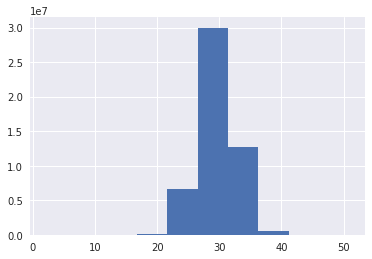

In [5]:
plt.hist(values.map(len))

In [40]:
def pad_smiles(smiles_string, smile_max_length):
     if len(smiles_string) < smile_max_length:
            return smiles_string + " " * (smile_max_length - len(smiles_string))

In [72]:
padded_smiles =  [pad_smiles(i, smile_max_length) for i in values if pad_smiles(i, smile_max_length)]

In [8]:
shuffle(padded_smiles)

In [41]:
def create_char_list(char_set, smile_series):
    for smile in smile_series:
        char_set.update(set(smile))
    return char_set

In [10]:
char_set = set()
char_set = create_char_list(char_set, padded_smiles)

In [11]:
print(len(char_set))
char_set

31


{' ',
 '#',
 '(',
 ')',
 '+',
 '-',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '=',
 'B',
 'C',
 'F',
 'H',
 'I',
 'N',
 'O',
 'S',
 '[',
 ']',
 'c',
 'l',
 'n',
 'o',
 'r',
 's'}

In [36]:
properties = ['density', 'cpt', 'viscosity', 'thermal_conductivity',
              'melting_point']
props = properties
devmodel = salty.aggregate_data(props, merge='Union')
devmodel.Data['smiles_string'] = devmodel.Data['smiles-cation']
cations = devmodel.Data['smiles_string'].drop_duplicates()
cations = cations.reset_index(drop=True)
print(cations.shape)

(276,)


In [73]:
padded_smiles_2 =  [pad_smiles(i, smile_max_length) for i in cations if pad_smiles(i, smile_max_length)]

In [21]:
char_set_2 = set()
char_set_2 = create_char_list(char_set_2, padded_smiles_2)

In [24]:
char_set.update(set(char_set_2))

In [25]:
char_set

{' ',
 '#',
 '(',
 ')',
 '+',
 '-',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '=',
 'B',
 'C',
 'F',
 'H',
 'I',
 'N',
 'O',
 'P',
 'S',
 '[',
 '\\',
 ']',
 'c',
 'l',
 'n',
 'o',
 'r',
 's'}

In [57]:
char_list

['C',
 'N',
 '5',
 'l',
 'O',
 's',
 '7',
 'r',
 '(',
 '[',
 '=',
 'P',
 'o',
 ']',
 '#',
 '6',
 '3',
 ' ',
 'I',
 'c',
 '4',
 '+',
 '-',
 'n',
 'H',
 '8',
 '\\',
 '1',
 'B',
 '2',
 ')',
 'F',
 'S']

In [26]:
char_list = list(char_set)
chars_in_dict = len(char_list)
char_to_index = dict((c, i) for i, c in enumerate(char_list))
index_to_char = dict((i, c) for i, c in enumerate(char_list))

In [328]:
import json
json = json.dumps(char_to_index)
f = open("1mil_GDB17.json","w")
f.write(json)
f.close()

In [69]:
# if loading previous model
smile_max_length = 51
import json
f = open("1mil_GDB17.json","r")
char_to_index = json.loads(f.read())
char_set = set(char_to_index.keys())
char_list = list(char_to_index.keys())
index_to_char = dict((i, c) for i, c in enumerate(char_list))
chars_in_dict = len(char_list)

In [48]:
set(char_to_index.keys())

{' ',
 '#',
 '(',
 ')',
 '+',
 '-',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '=',
 'B',
 'C',
 'F',
 'H',
 'I',
 'N',
 'O',
 'P',
 'S',
 '[',
 '\\',
 ']',
 'c',
 'l',
 'n',
 'o',
 'r',
 's'}

In [67]:
data_size = int(1e6*0.5)

In [70]:
X_train = np.zeros((data_size, smile_max_length, chars_in_dict), dtype=np.float32)

In [71]:
X_train.shape

(500000, 51, 33)

In [74]:
import random

In [121]:
random.choice(cations)

'CCC[n+]1ccccc1CC'

In [123]:
# for each i, randomly select whether to sample from GDB or cations (padded_smiles_2)
for i, smile in enumerate(padded_smiles[:data_size]):
    linearly_scaled_prob = random.random() < i/data_size
    if linearly_scaled_prob:
        smile = random.choice(cations)
    for j, char in enumerate(smile):
        X_train[i, j, char_to_index[char]] = 1

In [39]:
for i, smile in enumerate(padded_smiles[:data_size]):
    for j, char in enumerate(smile):
        X_train[i, j, char_to_index[char]] = 1

In [124]:
X_train, X_test = train_test_split(X_train, test_size=0.33, random_state=42)

In [125]:
X_train[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [126]:
X_train.shape

(335000, 51, 33)

In [ ]:
# build special X_train that contains 50% bootstrapped cation data

In [20]:
# need to build RNN to encode. some issues include what the 'embedded dimension' is (vector length of embedded sequence)

so some keras version stuff. 1.0 uses keras.losses to store its loss functions. 2.0 uses objectives. we'll just have to be consistent

In [14]:
from keras import backend as K
from keras.objectives import binary_crossentropy #objs or losses
from keras.models import Model
from keras.layers import Input, Dense, Lambda
from keras.layers.core import Dense, Activation, Flatten, RepeatVector
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import GRU
from keras.layers.convolutional import Convolution1D

Here I've adapted the exact architecture used in the [paper](https://github.com/maxhodak/keras-molecules/blob/master/molecules/model.py)

In [15]:
def Encoder(x, latent_rep_size, smile_max_length, epsilon_std = 0.01):
    h = Convolution1D(9, 9, activation = 'relu', name='conv_1')(x)
    h = Convolution1D(9, 9, activation = 'relu', name='conv_2')(h)
    h = Convolution1D(10, 11, activation = 'relu', name='conv_3')(h)
    h = Flatten(name = 'flatten_1')(h)
    h = Dense(435, activation = 'relu', name = 'dense_1')(h)

    def sampling(args):
        z_mean_, z_log_var_ = args
        batch_size = K.shape(z_mean_)[0]
        epsilon = K.random_normal(shape=(batch_size, latent_rep_size),
                                  mean=0., stddev = epsilon_std)
        return z_mean_ + K.exp(z_log_var_ / 2) * epsilon

    z_mean = Dense(latent_rep_size, name='z_mean', activation = 'linear')(h)
    z_log_var = Dense(latent_rep_size, name='z_log_var', activation = 'linear')(h)

    def vae_loss(x, x_decoded_mean):
        x = K.flatten(x)
        x_decoded_mean = K.flatten(x_decoded_mean)
        xent_loss = smile_max_length * binary_crossentropy(x, x_decoded_mean)
        kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - \
                                 K.exp(z_log_var), axis = -1)
        return xent_loss + kl_loss

    return (vae_loss, Lambda(sampling, output_shape=(latent_rep_size,),
                             name='lambda')([z_mean, z_log_var]))

def Decoder(z, latent_rep_size, smile_max_length, charset_length):
    h = Dense(latent_rep_size, name='latent_input', activation = 'relu')(z)
    h = RepeatVector(smile_max_length, name='repeat_vector')(h)
    h = GRU(501, return_sequences = True, name='gru_1')(h)
    h = GRU(501, return_sequences = True, name='gru_2')(h)
    h = GRU(501, return_sequences = True, name='gru_3')(h)
    return TimeDistributed(Dense(charset_length, activation='softmax'),
                           name='decoded_mean')(h)

In [21]:
x = Input(shape=(smile_max_length, len(char_set)))

In [22]:
_, z = Encoder(x, latent_rep_size=292, smile_max_length=smile_max_length)

In [23]:
encoder = Model(x, z)

encoded_input looks like a dummy layer here:

In [24]:
encoded_input = Input(shape=(292,))

In [25]:
decoder = Model(encoded_input, Decoder(encoded_input, latent_rep_size=292,
                                       smile_max_length=smile_max_length,
                 charset_length=len(char_set)))

create a separate autoencoder model that combines the encoder and decoder (I guess the former cells are for accessing those separate parts of the model)

In [26]:
x1 = Input(shape=(smile_max_length, len(char_set)), name='input_1')

In [27]:
vae_loss, z1 = Encoder(x1, latent_rep_size=292, smile_max_length=smile_max_length)

In [28]:
autoencoder = Model(x1, Decoder(z1, latent_rep_size=292,
                                       smile_max_length=smile_max_length,
                 charset_length=len(char_set)))

we compile and fit

In [29]:
autoencoder.compile(optimizer='Adam', loss=vae_loss, metrics =['accuracy'])

In [127]:
autoencoder.fit(X_train, X_train, shuffle = True, validation_data=(X_test, X_test))

Train on 335000 samples, validate on 165000 samples
Epoch 1/1
335000/335000 [==============================] - 5746s 17ms/step - loss: 0.9196 - acc: 0.6645 - val_loss: 0.8583 - val_acc: 0.7098


In [54]:
autoencoder.save("1Mil_GDB17.h5")

In [54]:
autoencoder.save("1Mil_GDB17_Cation_1.h5")

In [33]:
autoencoder.load_weights("1Mil_GDB17.h5")

In [34]:
def sample(a, temperature=1.0):
    # helper function to sample an index from a probability array
#     a = np.log(a) / temperature
#     a = np.exp(a) / np.sum(np.exp(a))
#     return np.argmax(np.random.multinomial(1, a, 1))
    # work around from https://github.com/llSourcell/How-to-Generate-Music-Demo/issues/4
    a = np.log(a) / temperature 
    dist = np.exp(a)/np.sum(np.exp(a)) 
    choices = range(len(a)) 
    return np.random.choice(choices, p=dist)

In [350]:
smi = values[29]
# smi = cations[5]
print(smi)

BrC1=C2C3CC3C=CCC#CC1=CSC2=N


In [351]:
test_smi = smi
test_smi = pad_smiles(test_smi, smile_max_length)
Z = np.zeros((1, smile_max_length, len(char_list)), dtype=np.bool)
for t, char in enumerate(test_smi):
    Z[0, t, char_to_index[char]] = 1

In [363]:
string = ""
for i in autoencoder.predict(Z):
    for j in i:
        index = sample(j, temperature=2)
        string += index_to_char[index]
print("\n callback guess: " + string)


 callback guess: B1C3=C2S2=N(C=COCCNC2=ONC1=CO                      


In [60]:
properties = ['density', 'cpt', 'viscosity', 'thermal_conductivity',
              'melting_point']
props = properties
devmodel = salty.aggregate_data(props, merge='Union')
devmodel.Data['smiles_string'] = devmodel.Data['smiles-cation']
cations = devmodel.Data['smiles_string'].drop_duplicates()
print(cations.shape)

(276,)


In [61]:
cations = cations.reset_index(drop=True)

In [376]:
test_smi = cations[100]
test_smi = pad_smiles(test_smi, smile_max_length)
Z = np.zeros((1, smile_max_length, len(char_list)), dtype=np.bool)
for t, char in enumerate(test_smi):
    Z[0, t, char_to_index[char]] = 1
test_smi

'OCCCCCC([n+]1ccn(c1)C)                             '

In [380]:
string = ""
for i in autoencoder.predict(Z):
    for j in i:
        index = sample(j)
        string += index_to_char[index]
print("\n callback guess: " + string)


 callback guess: OCCCCCC([n+]1ccnccc1s)l OI881N1 rS8)(nBNC[CCH  [ 3B


Alright. So now I'm going to loop through our 276 cations, sample 100x from the decoder based on these representations, and see how many sanitize with the RDKit

/home/wesleybeckner/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/wesleybeckner/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
/home/wesleybeckner/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


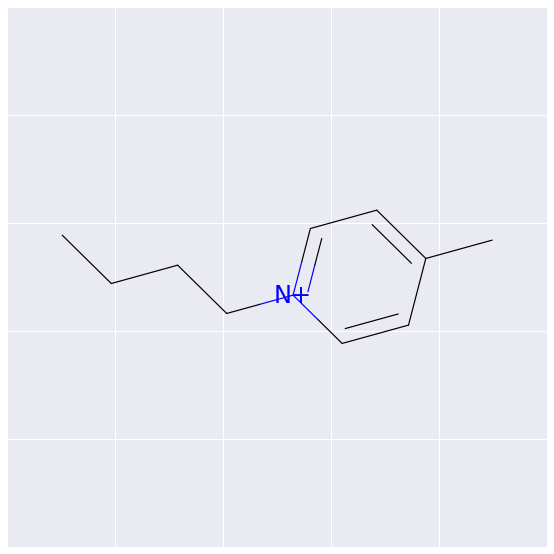

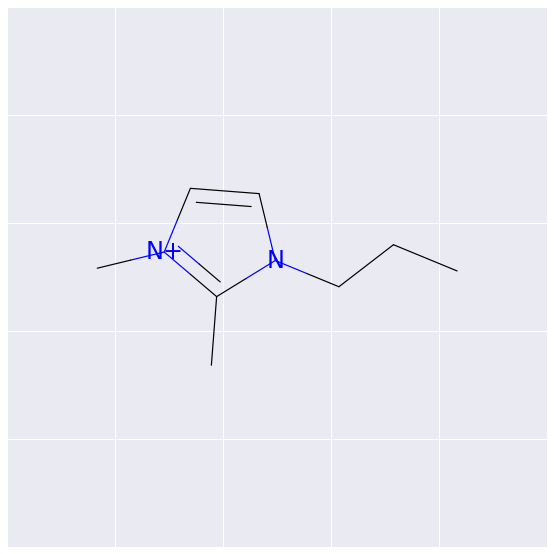

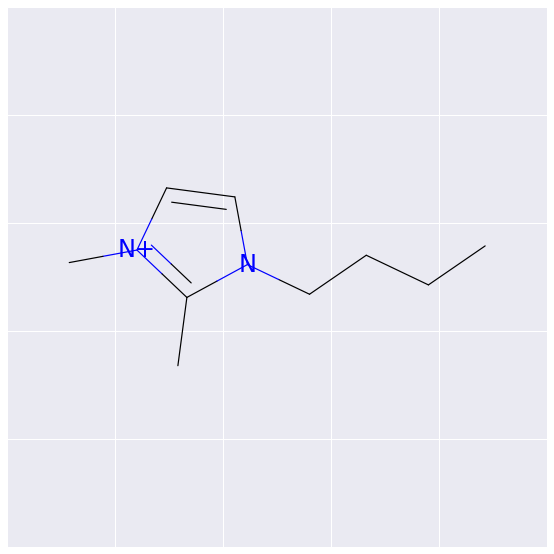

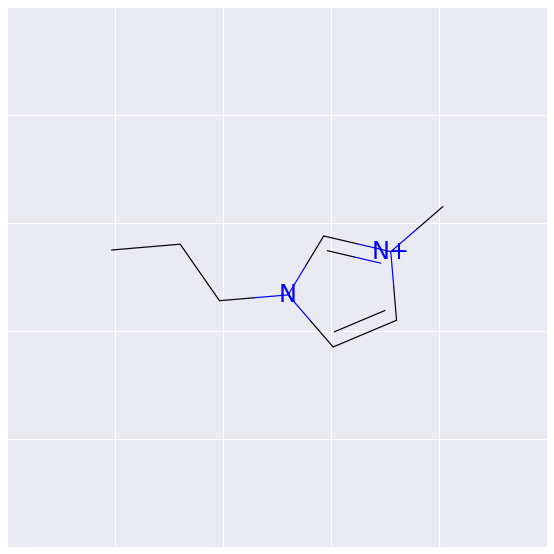

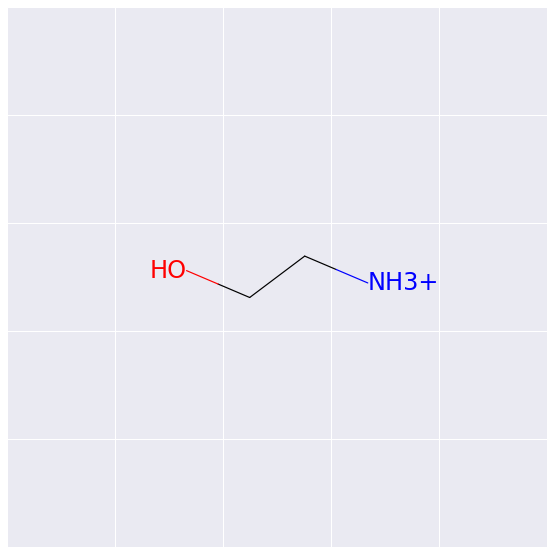

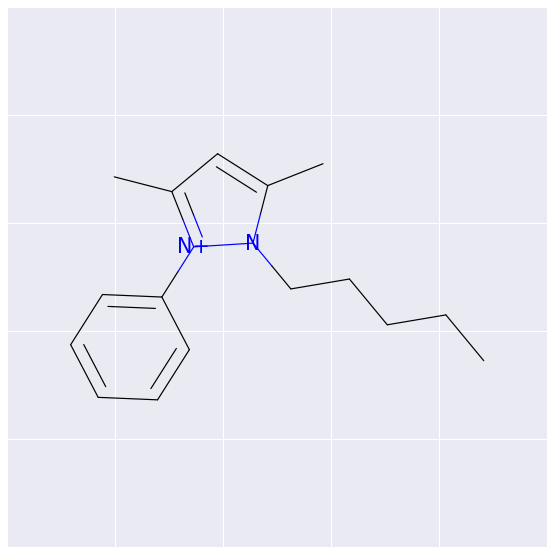

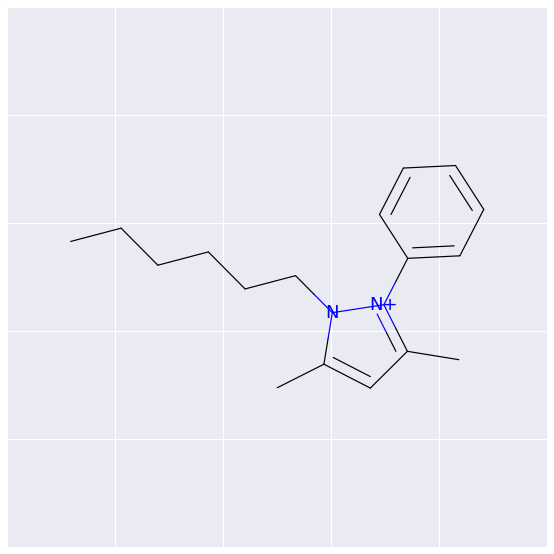

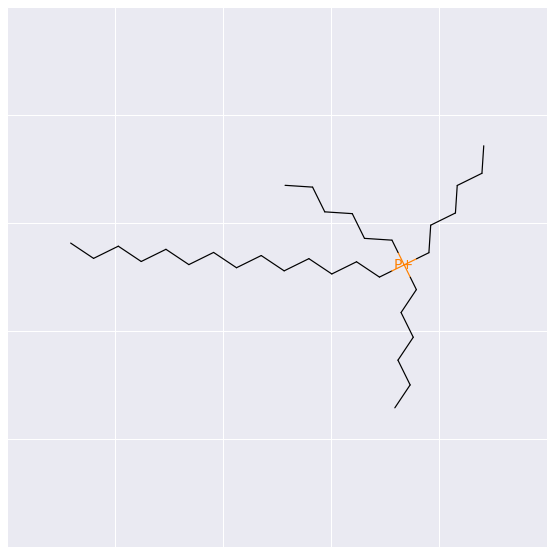

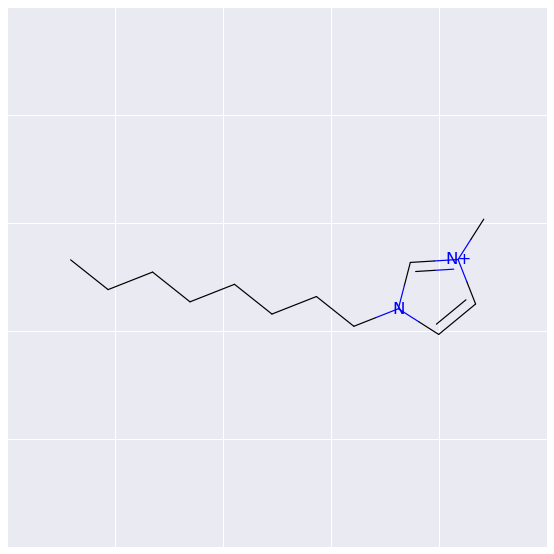

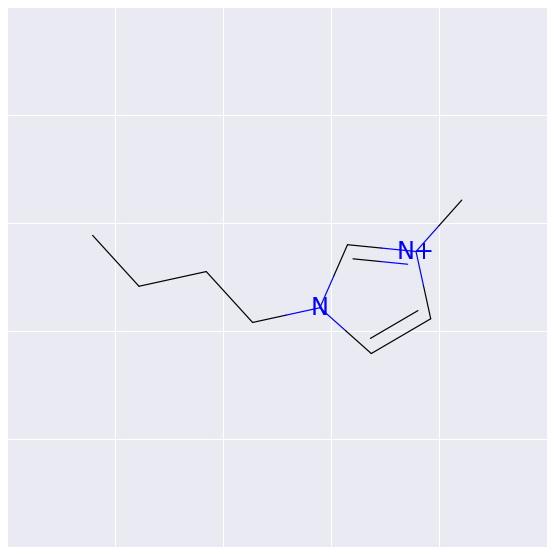

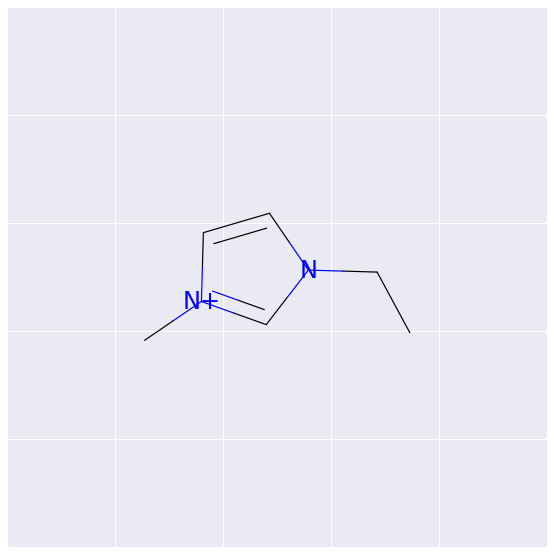

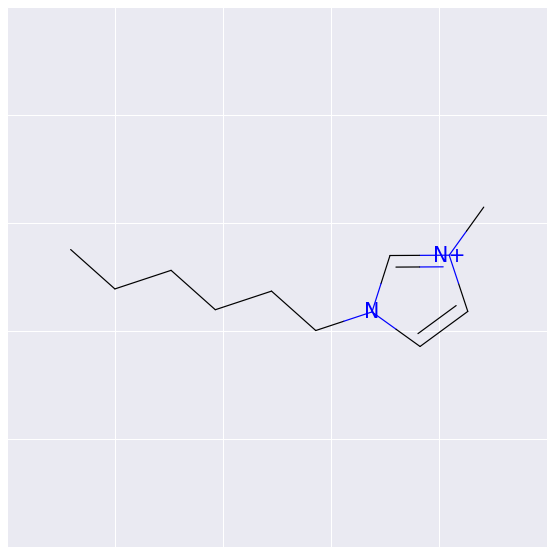

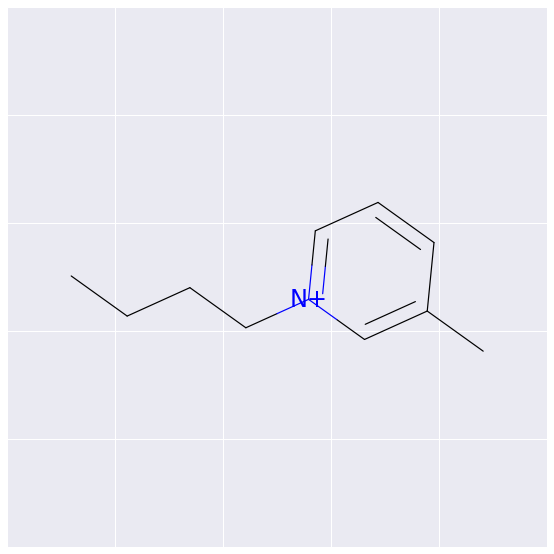

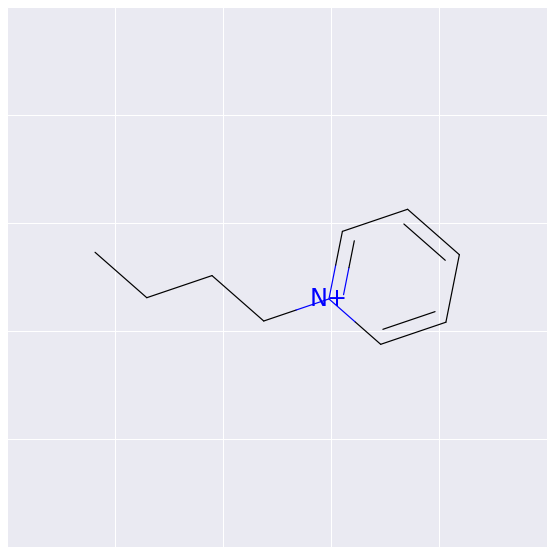

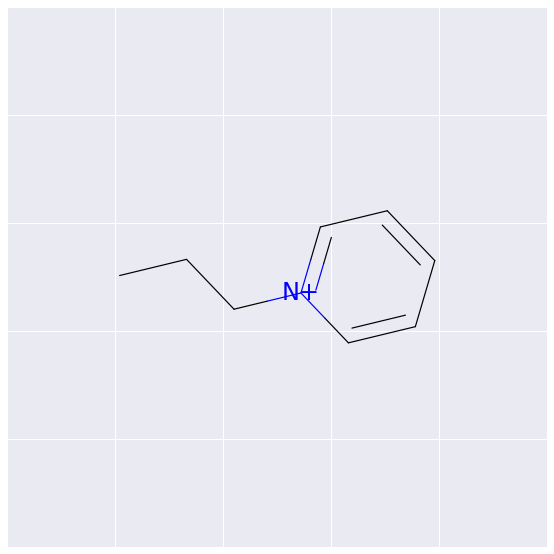

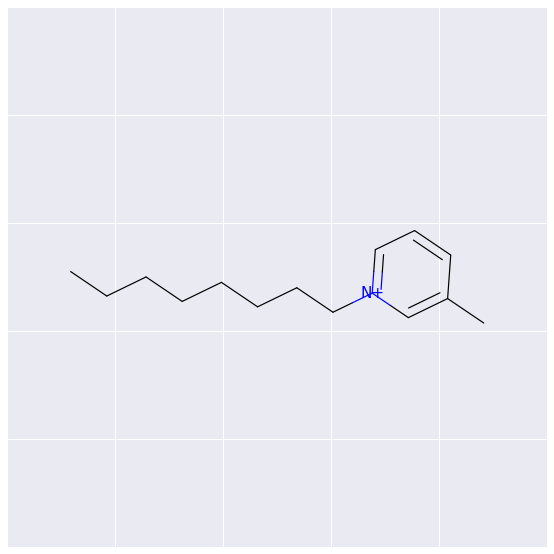

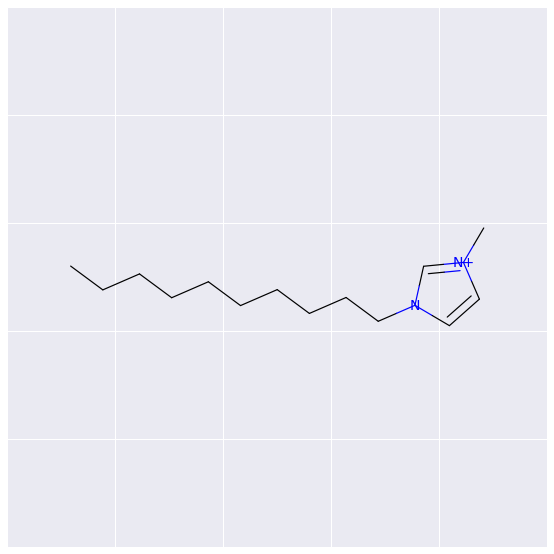

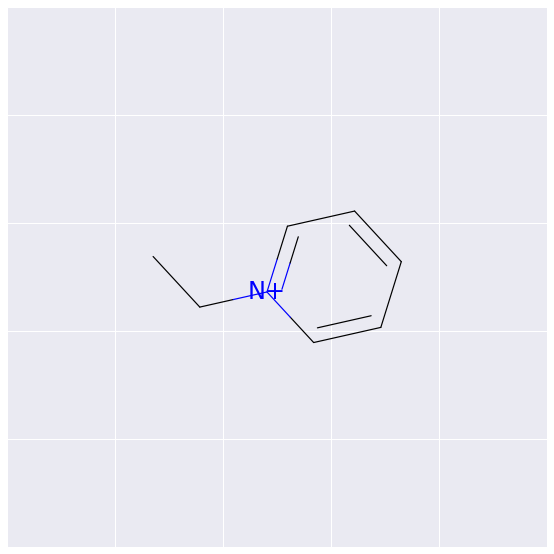

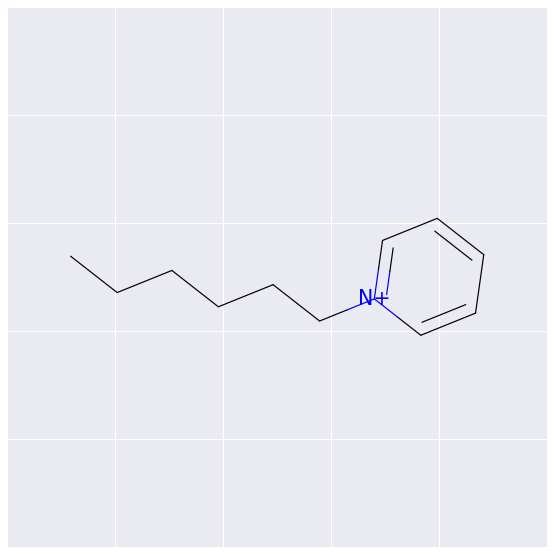

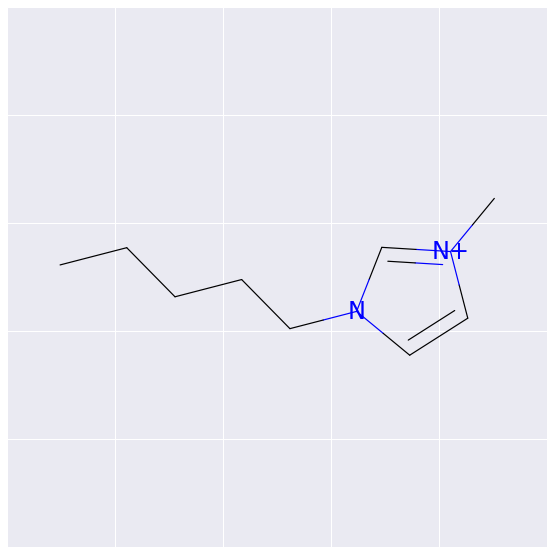

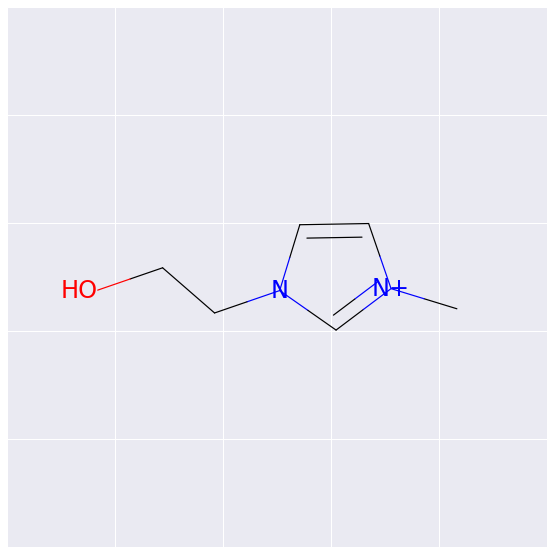

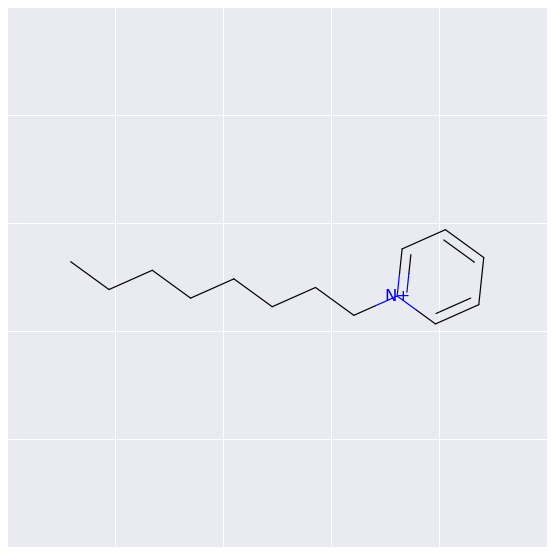

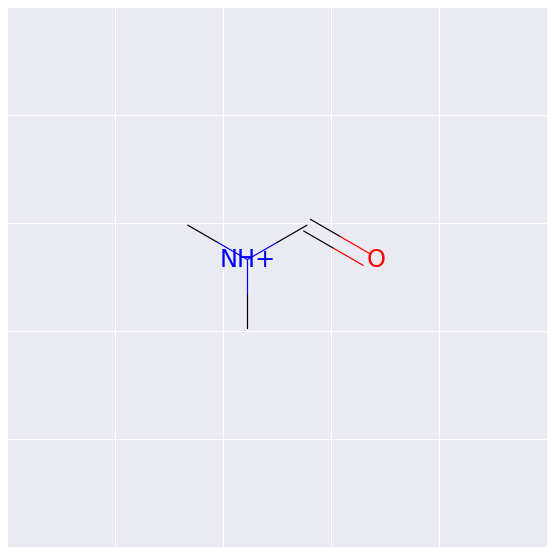

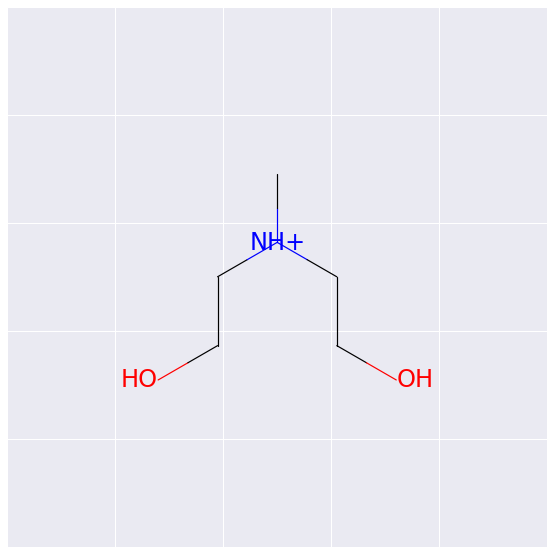

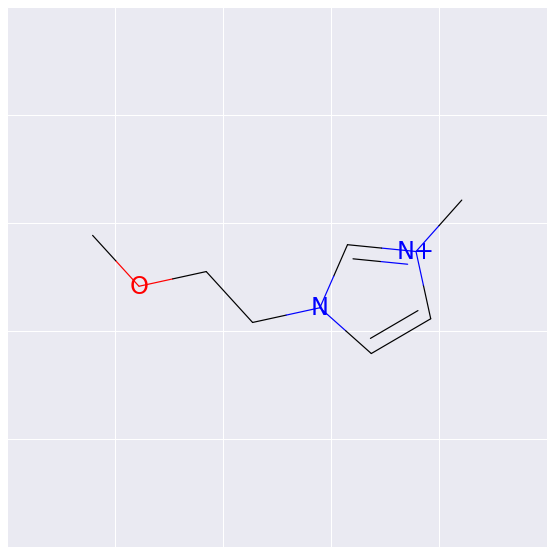

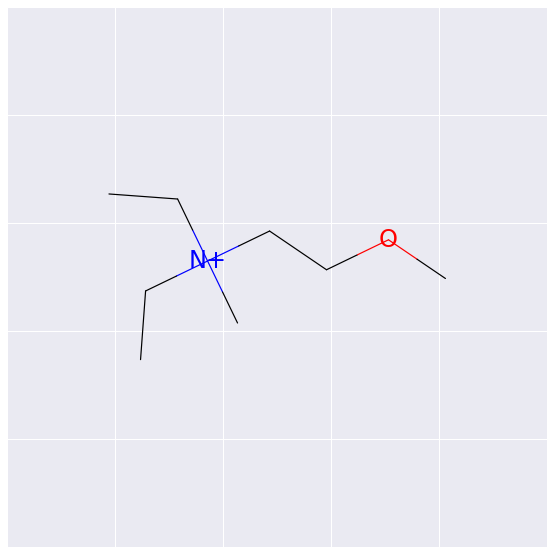

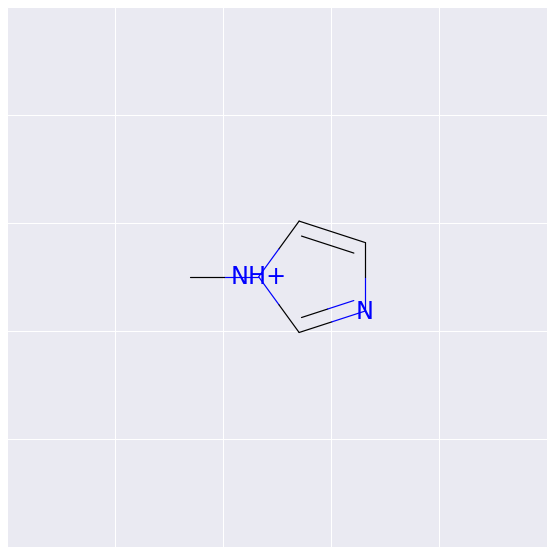

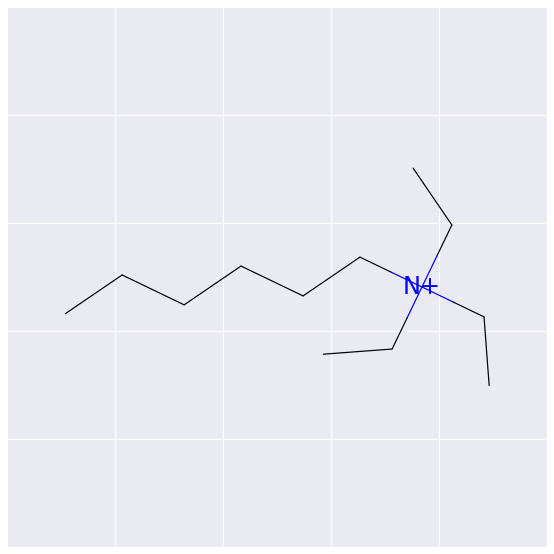

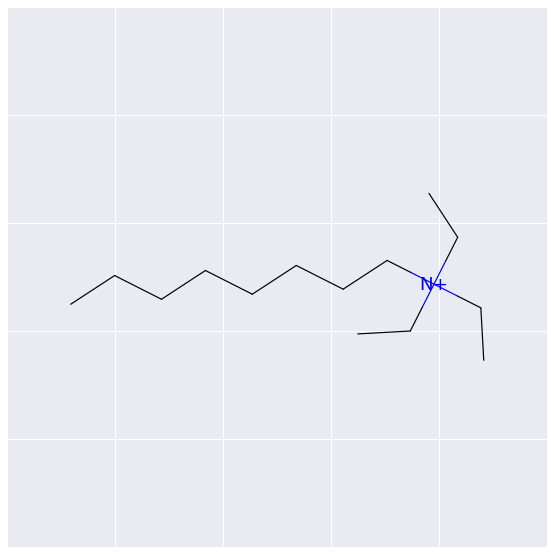

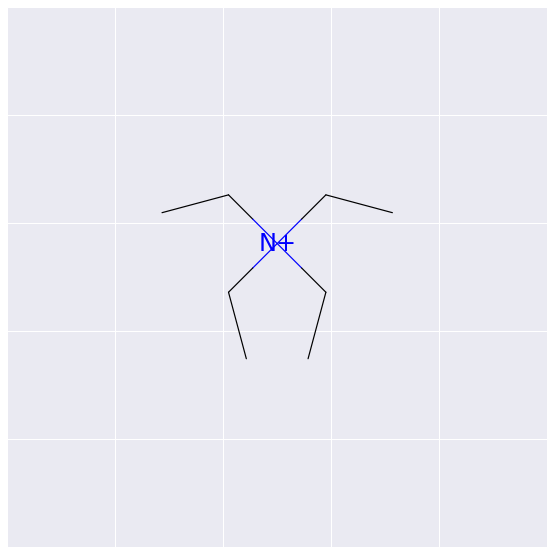

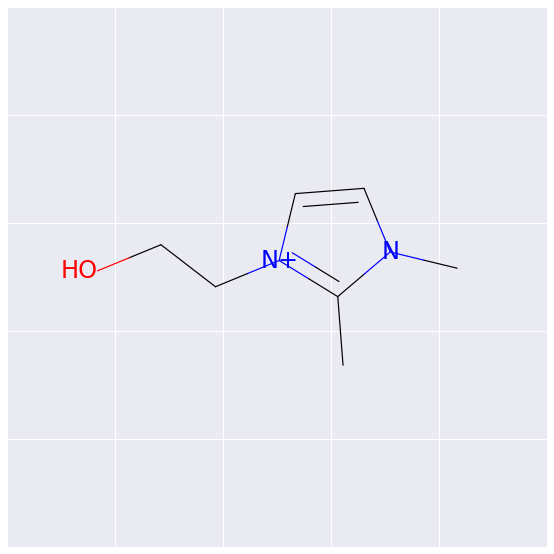

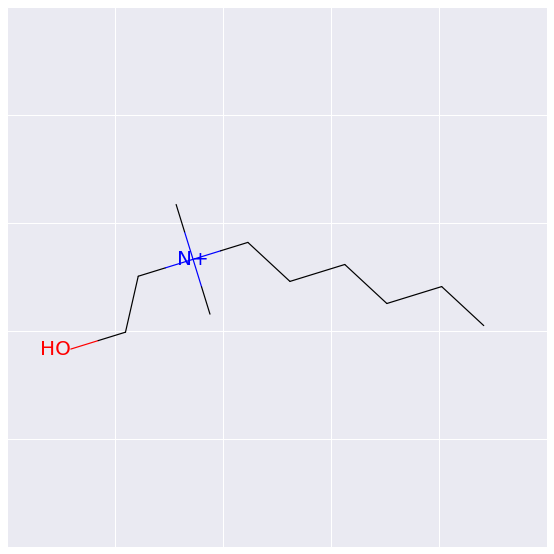

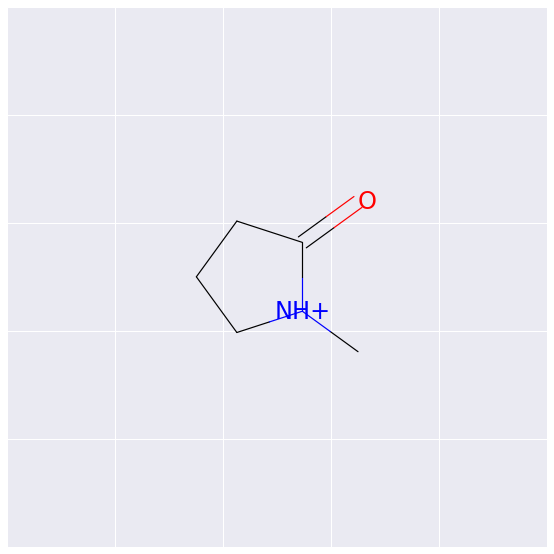

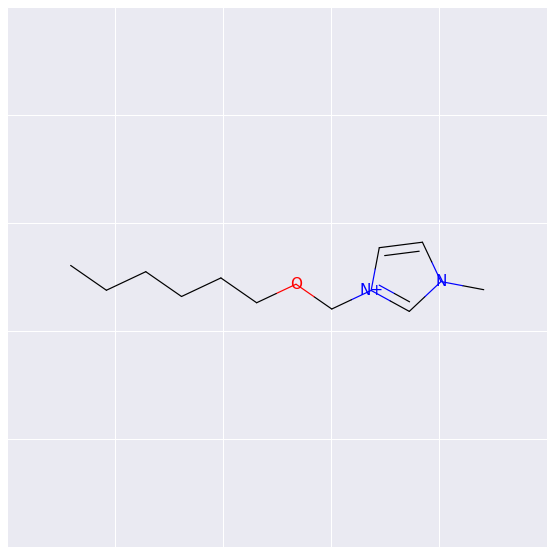

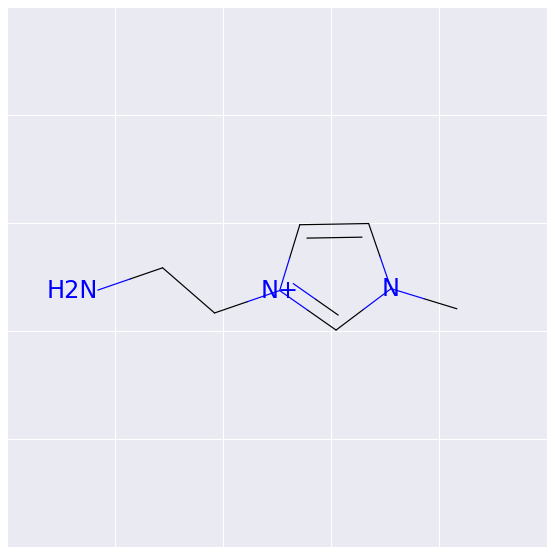

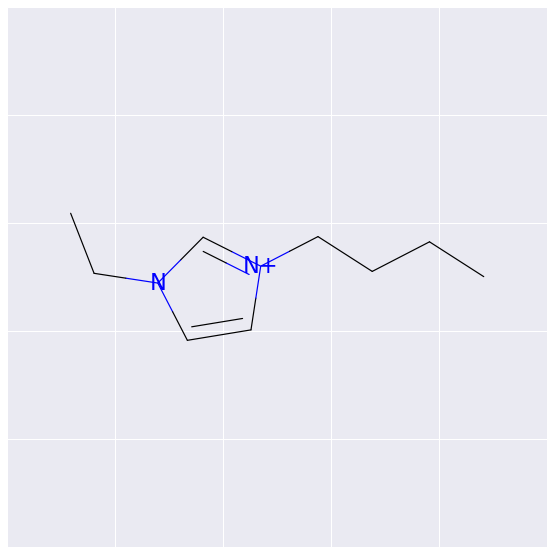

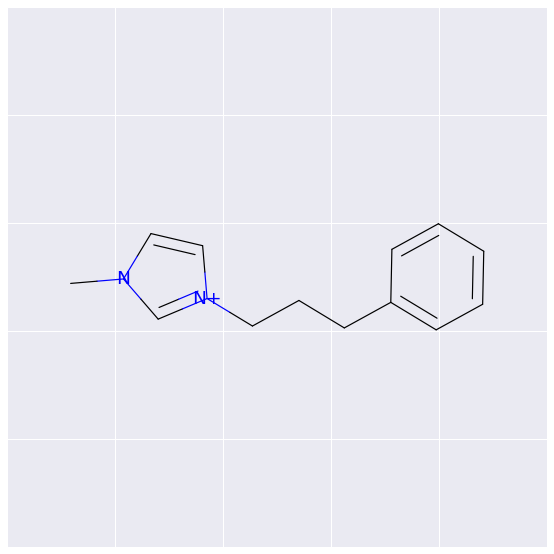

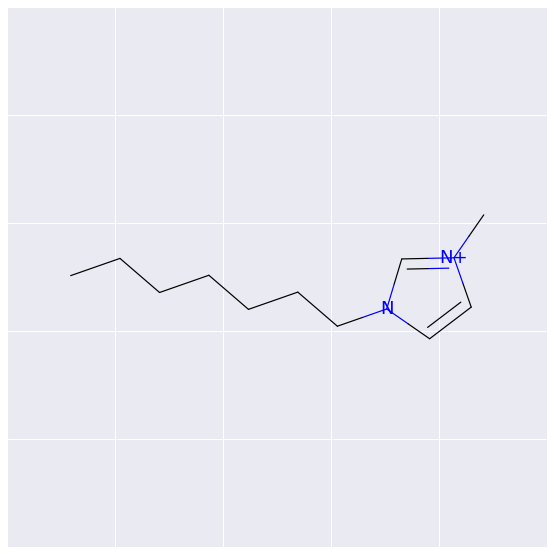

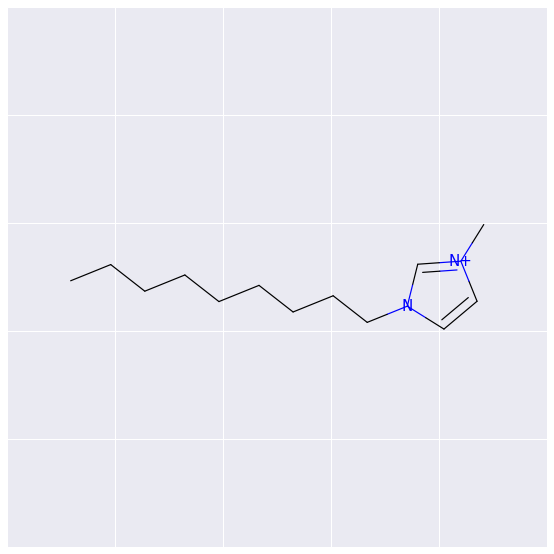

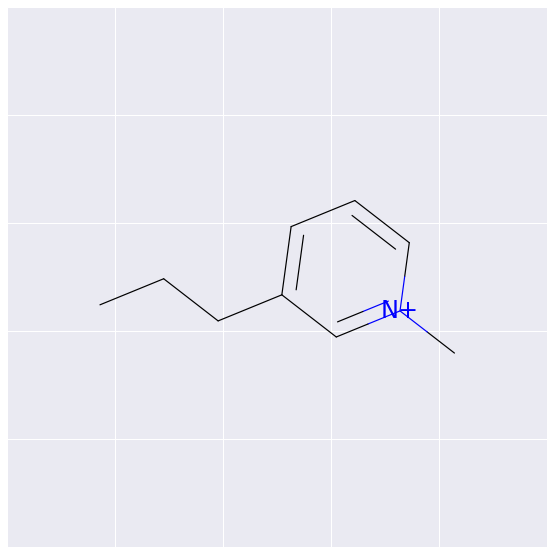

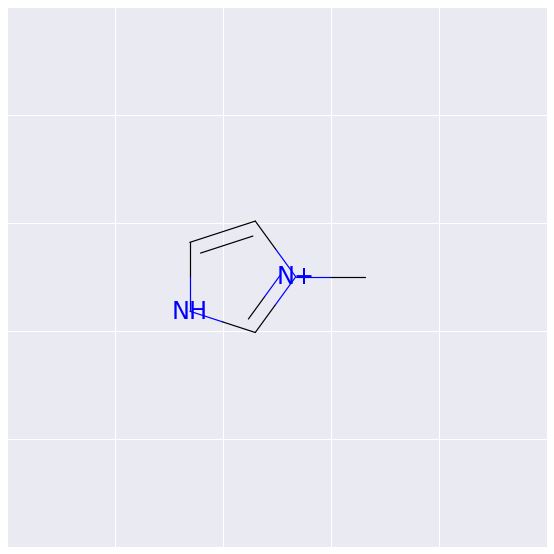

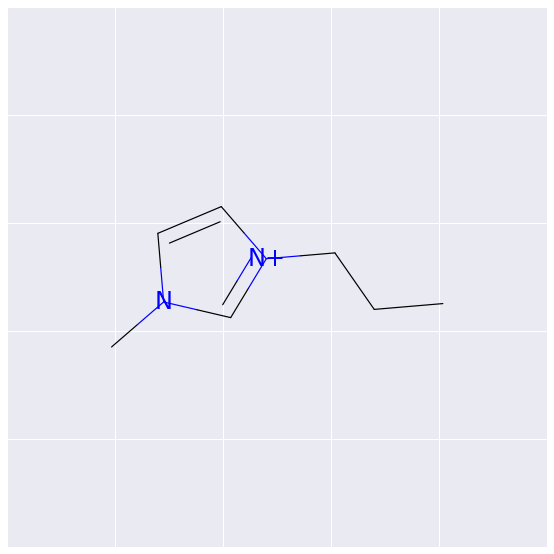

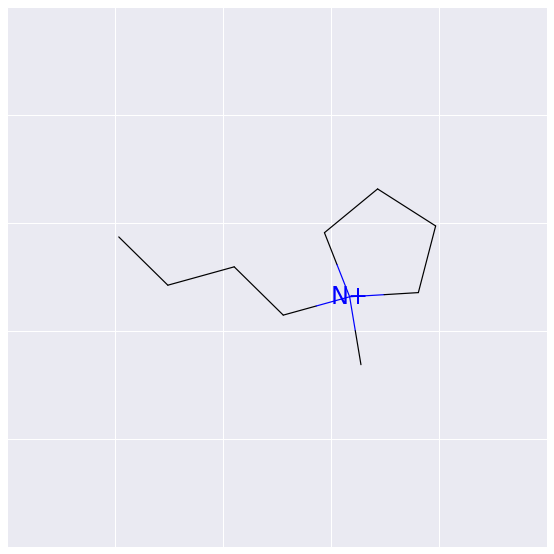

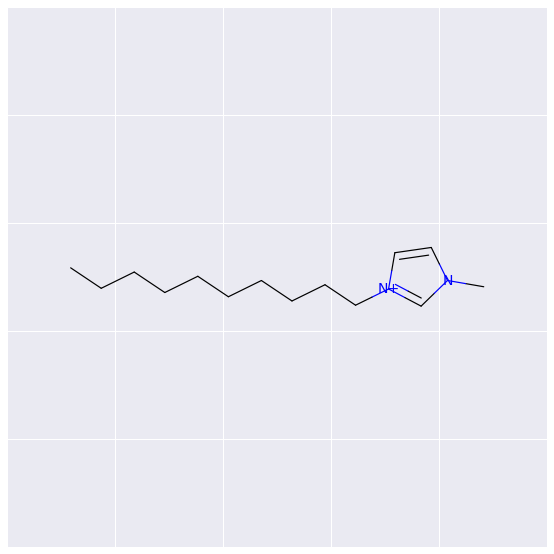

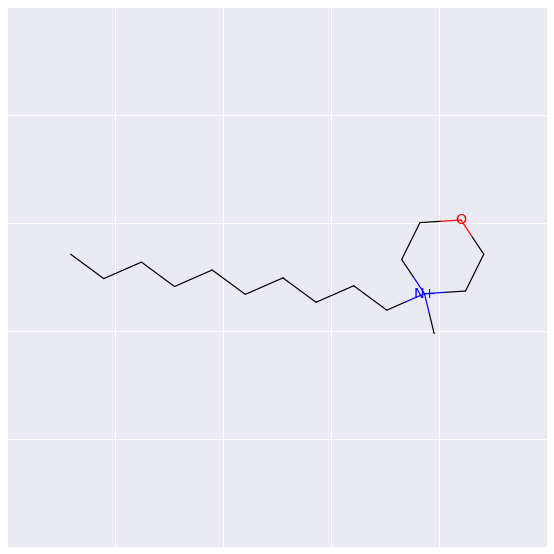

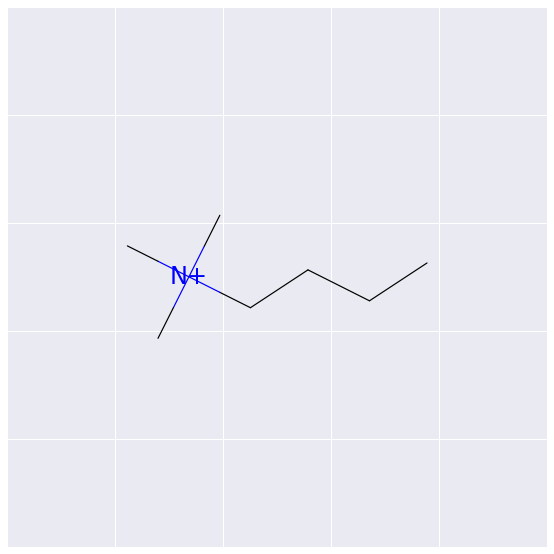

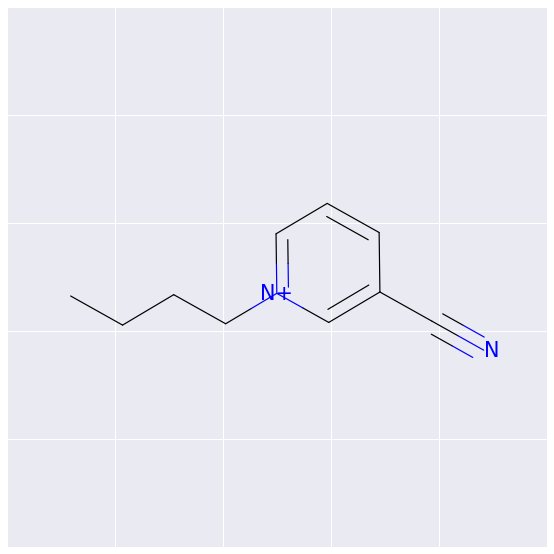

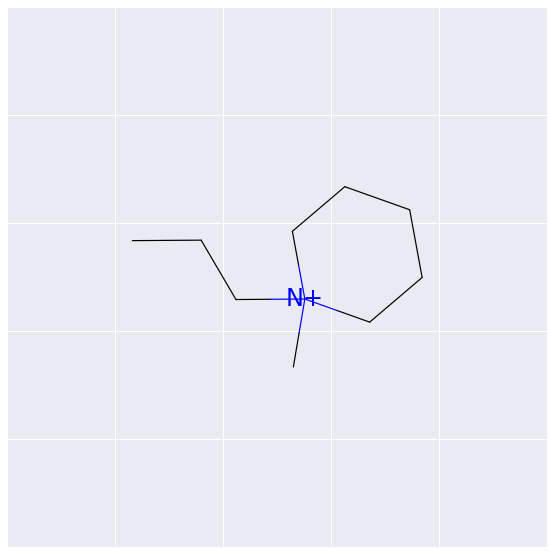

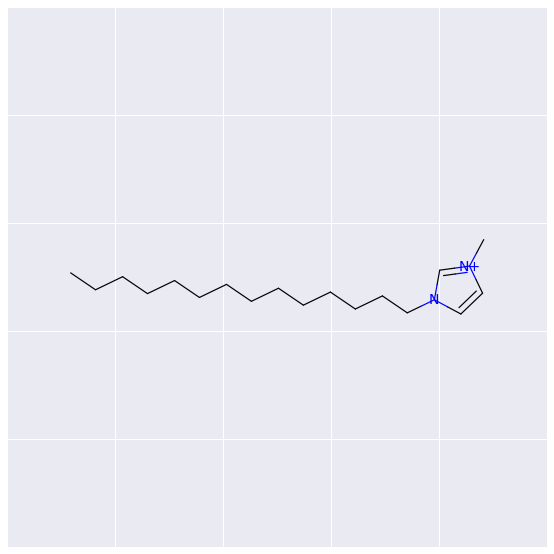

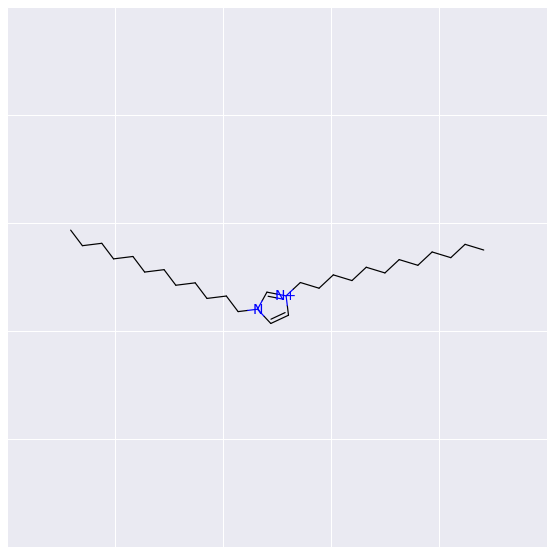

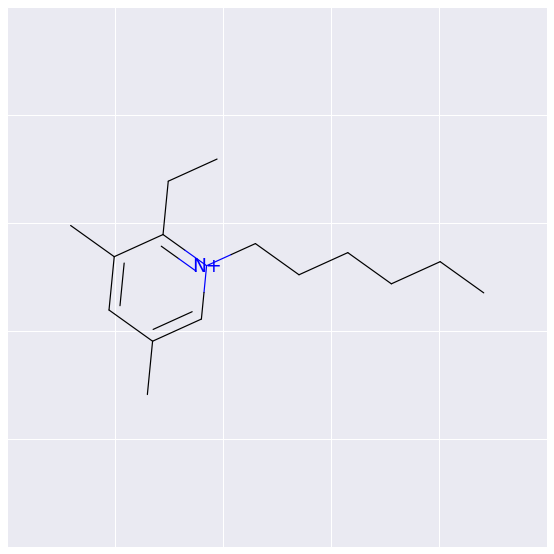

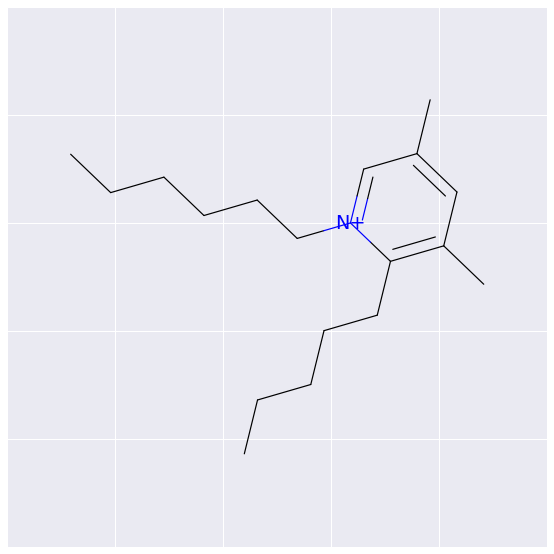

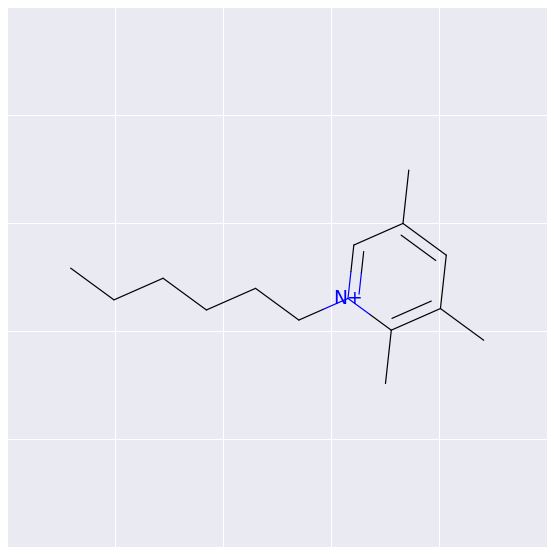

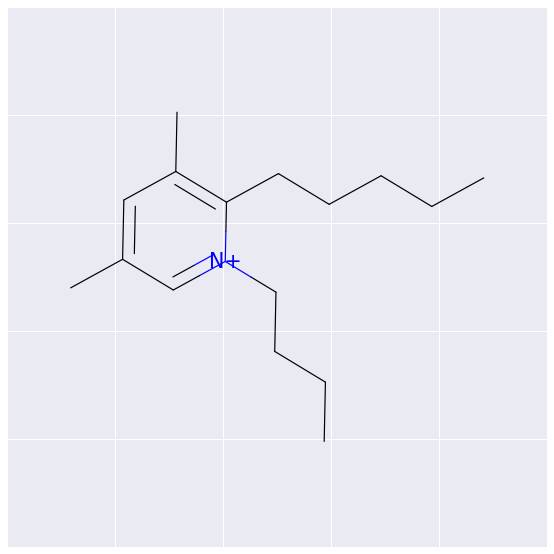

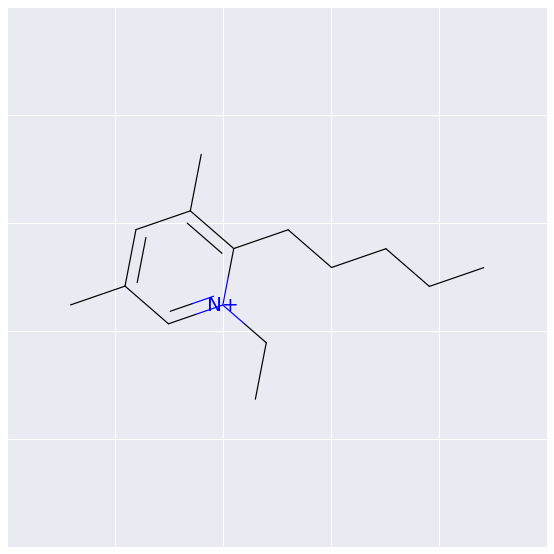

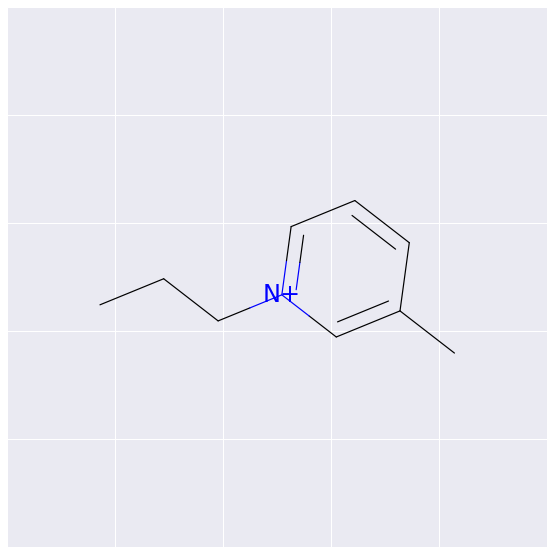

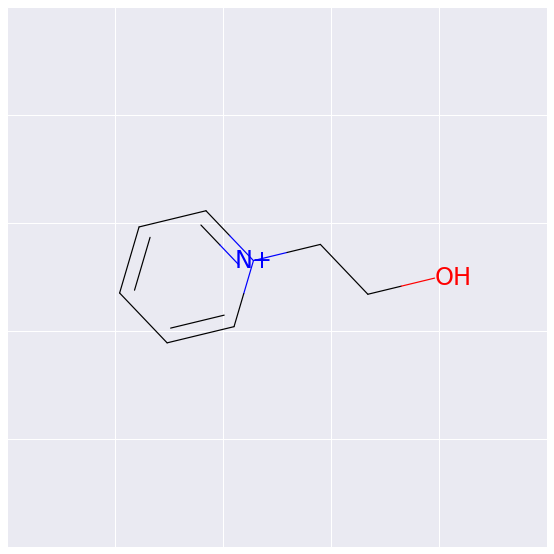

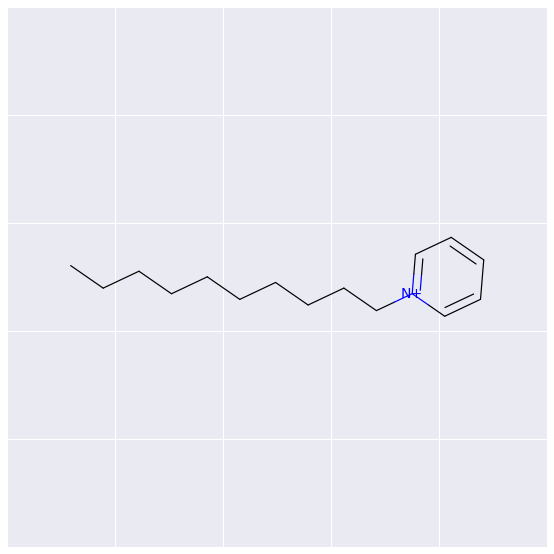

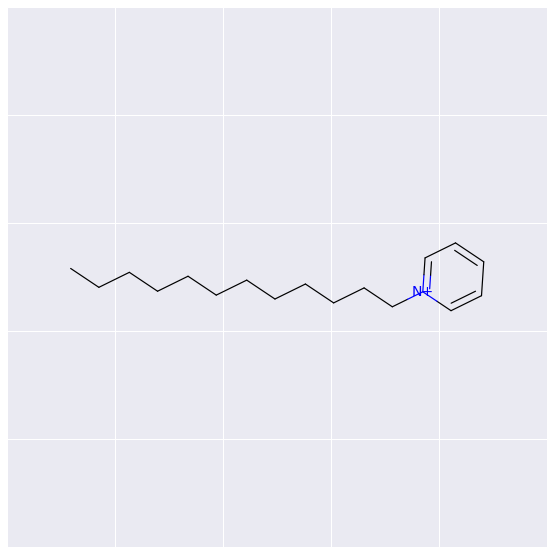

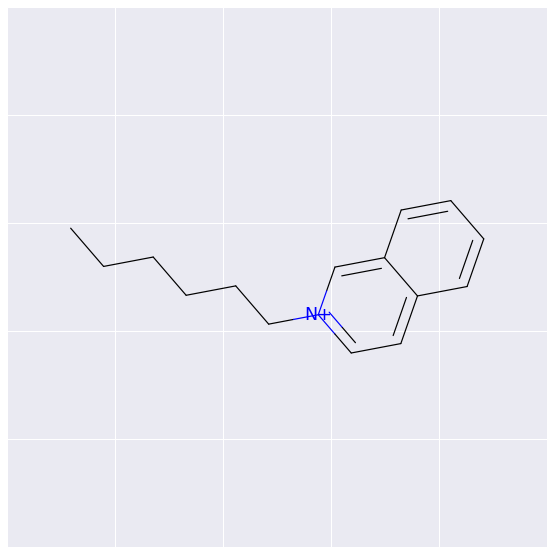

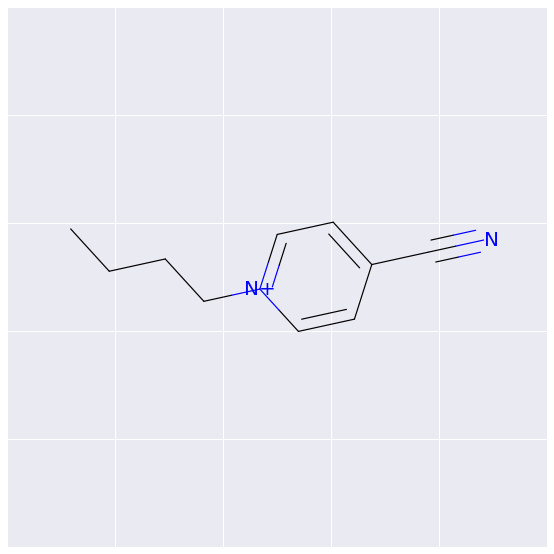

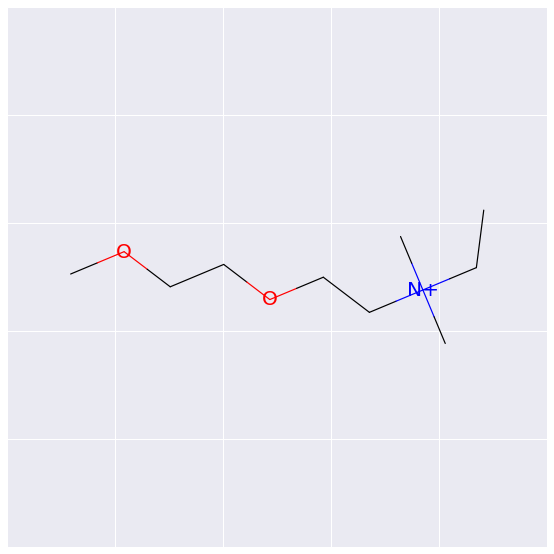

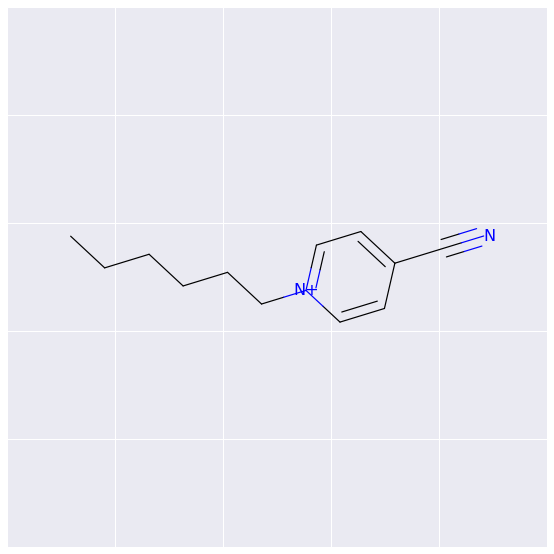

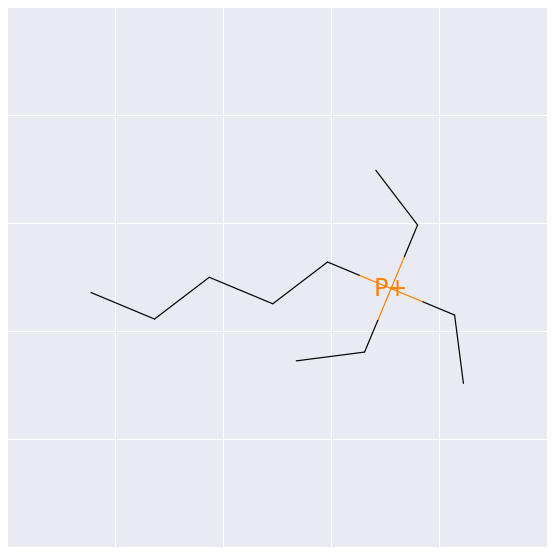

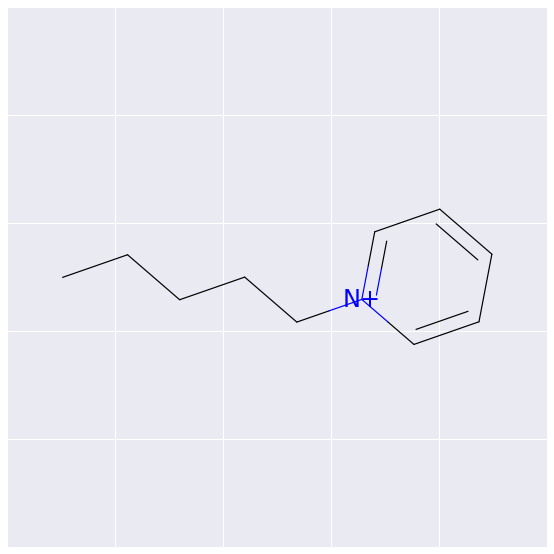

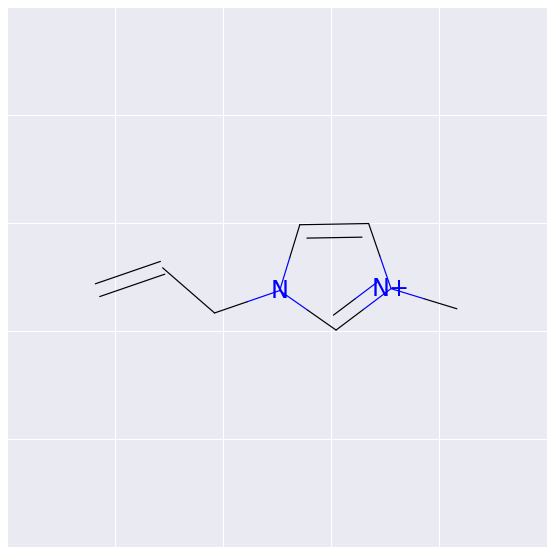

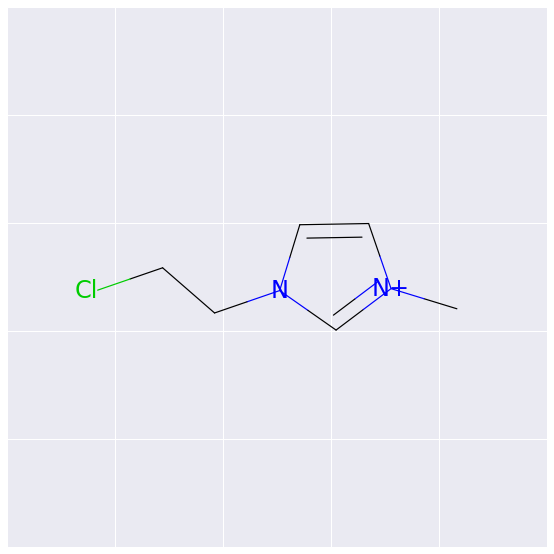

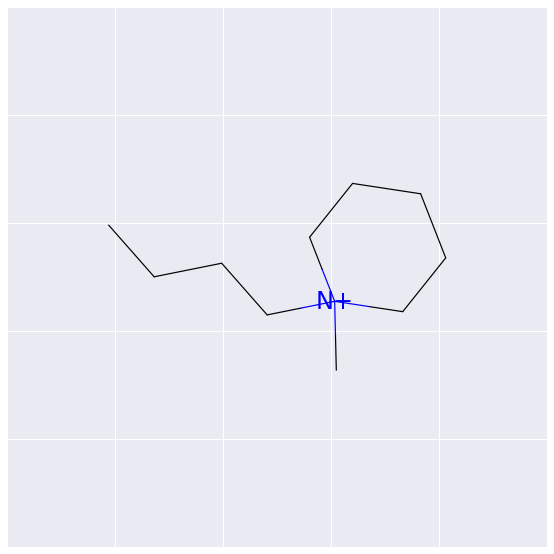

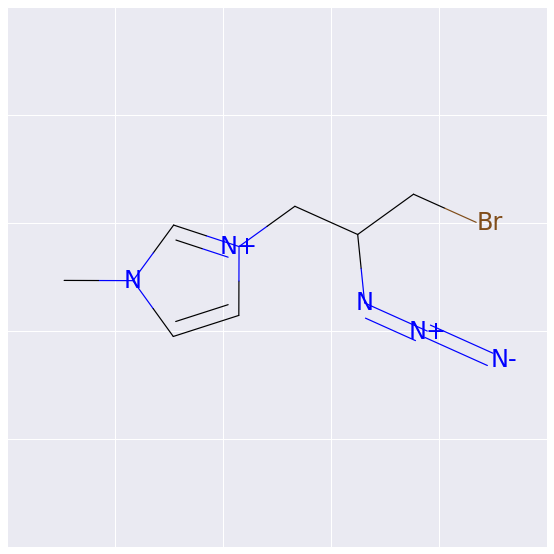

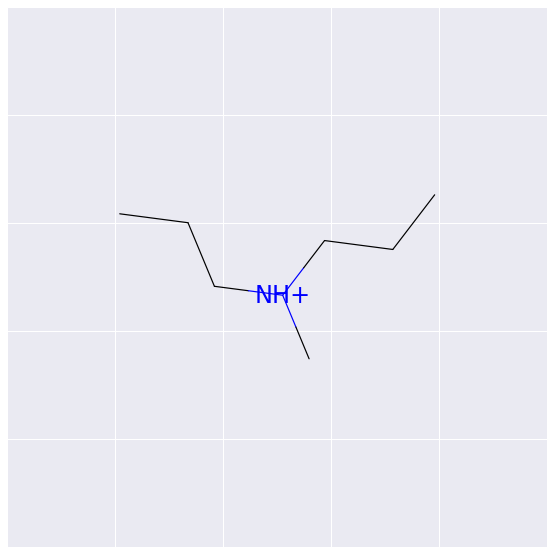

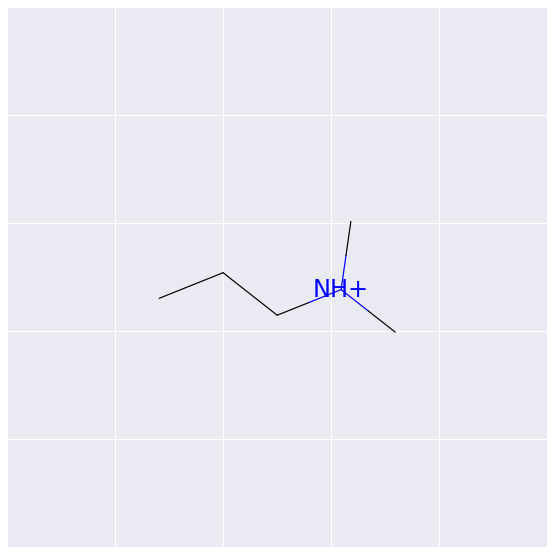

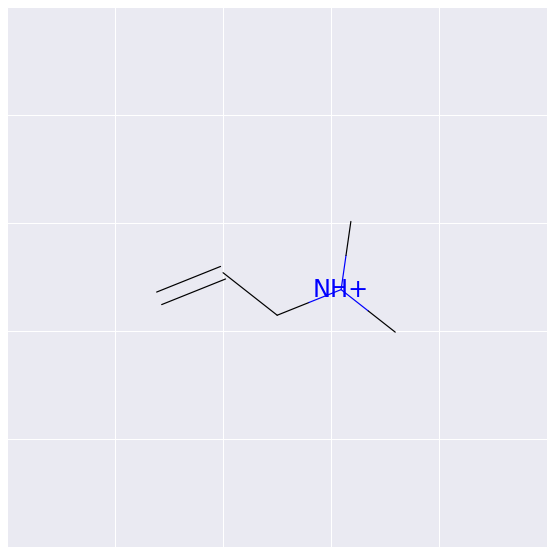

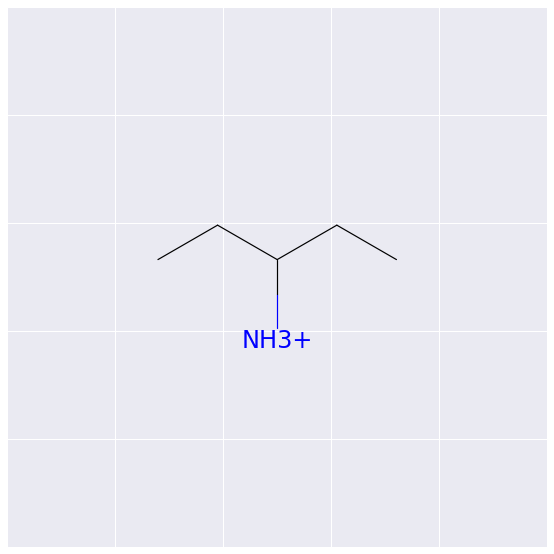

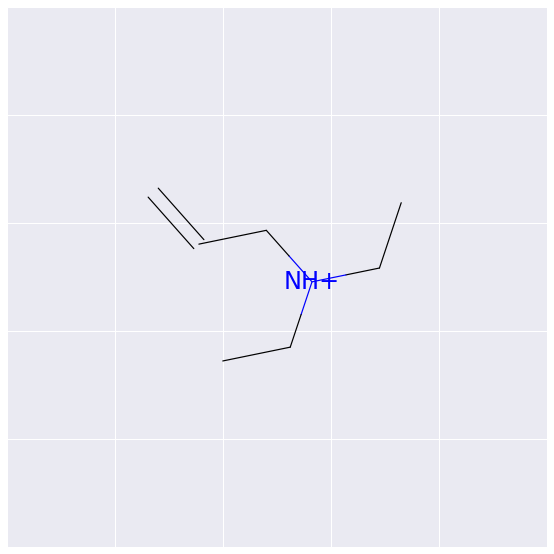

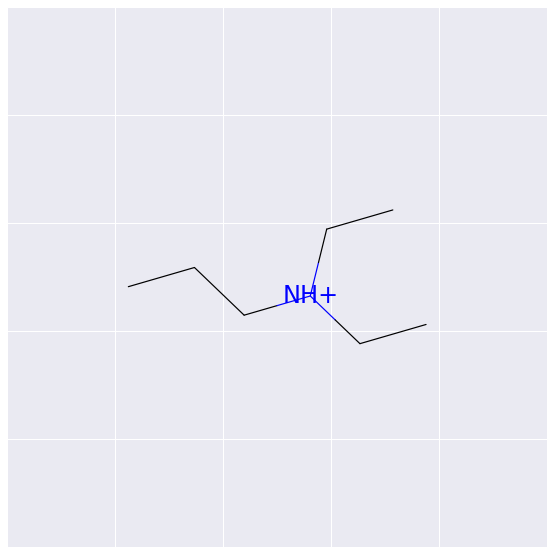

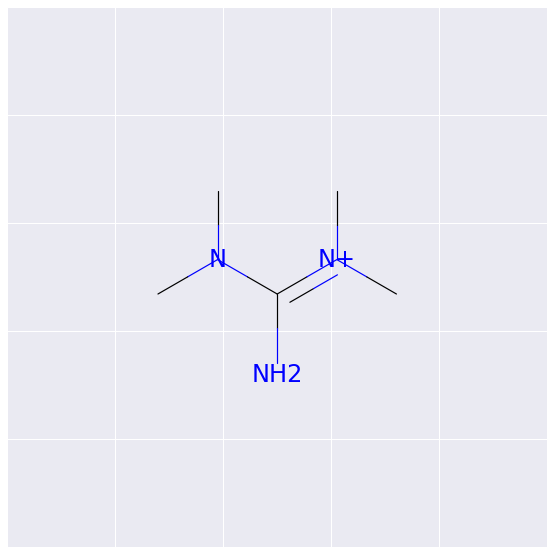

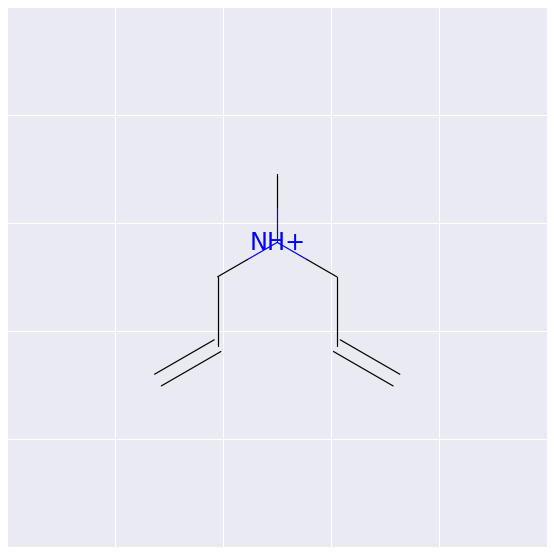

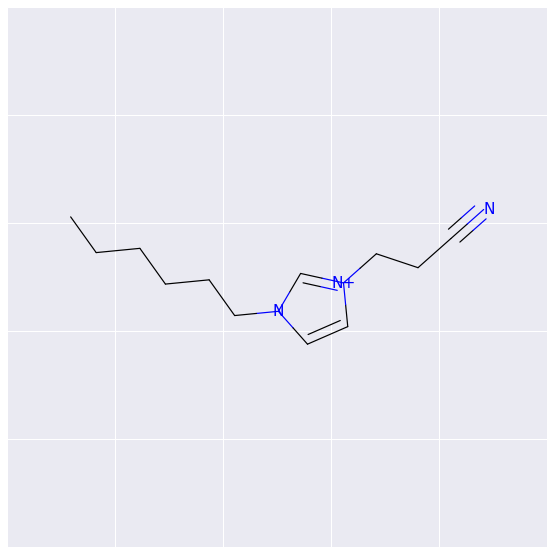

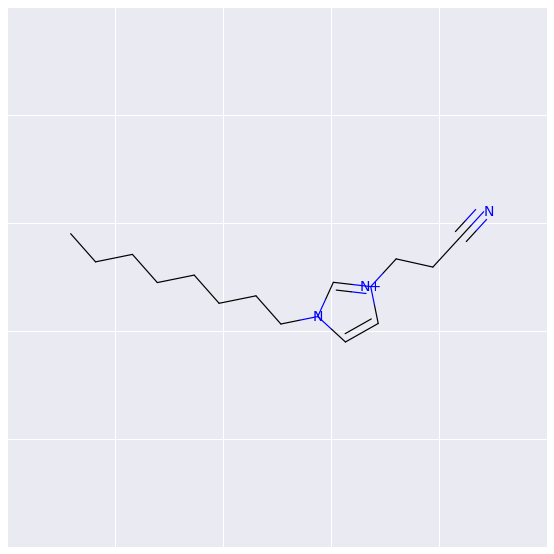

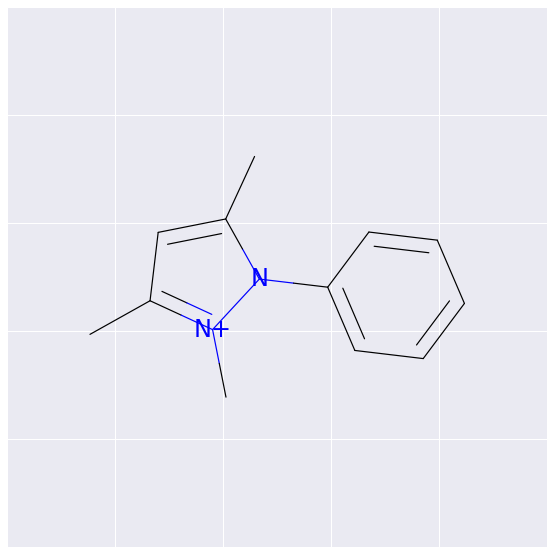

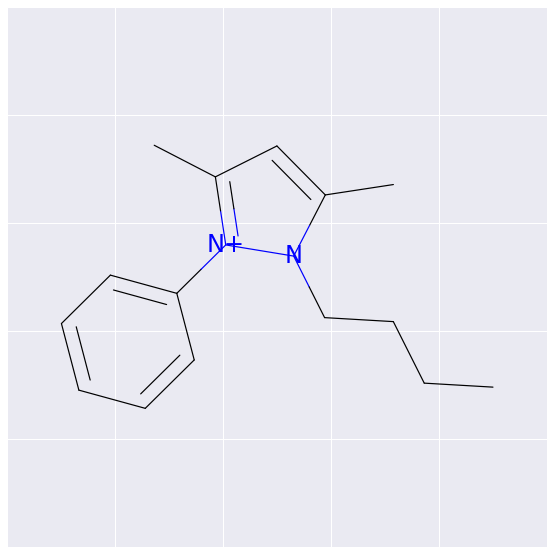

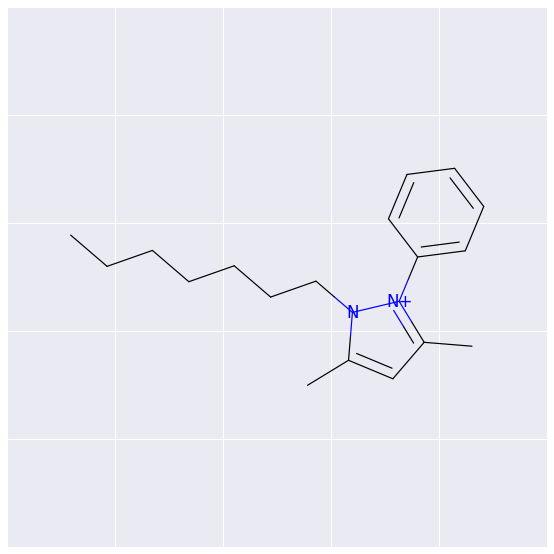

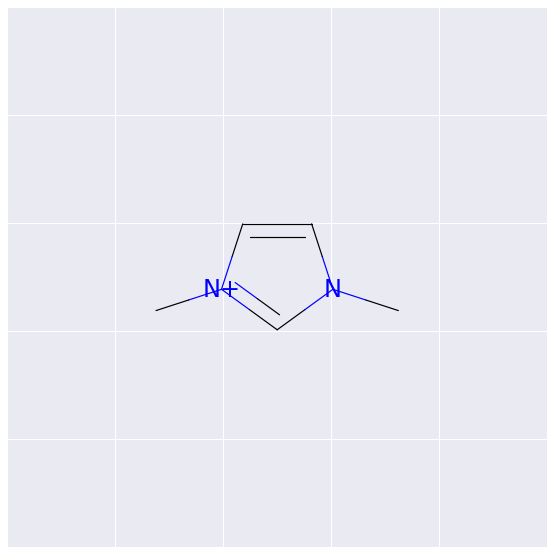

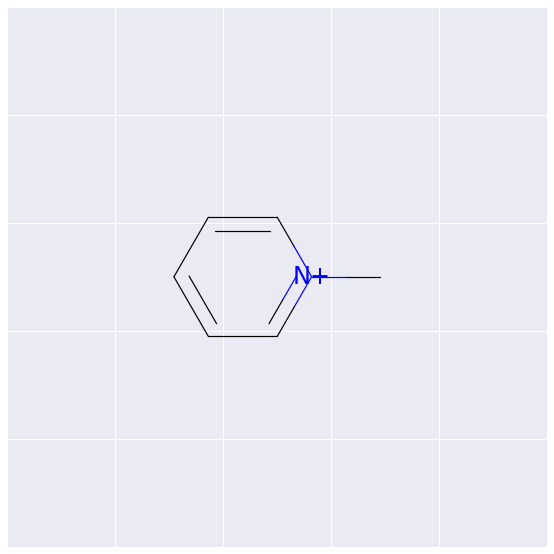

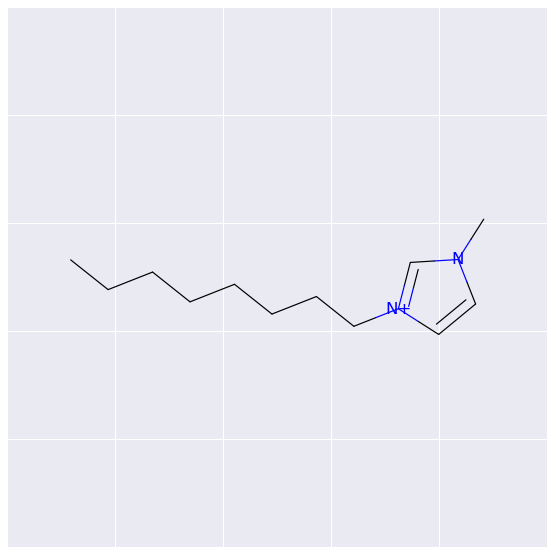

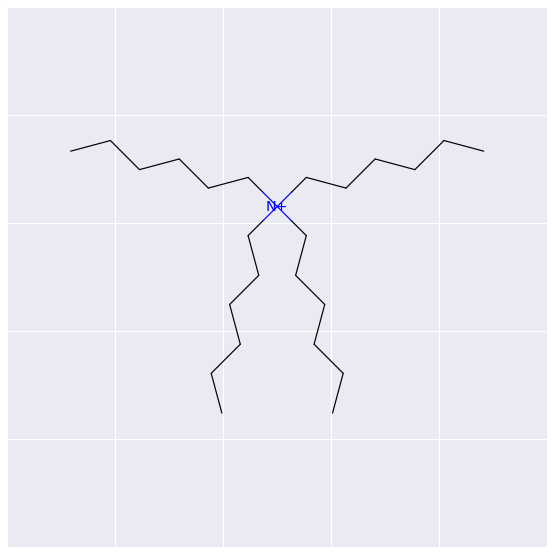

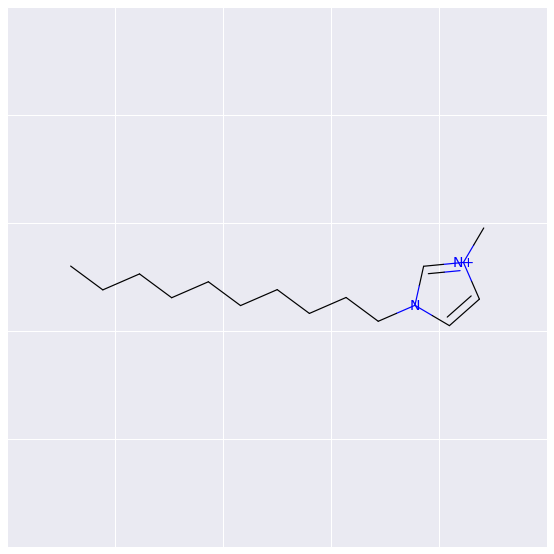

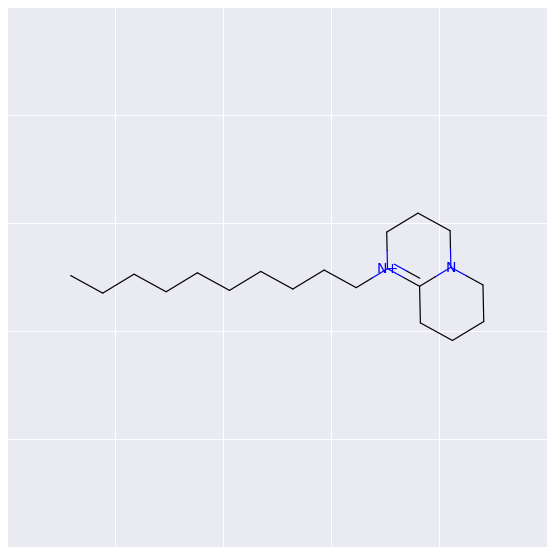

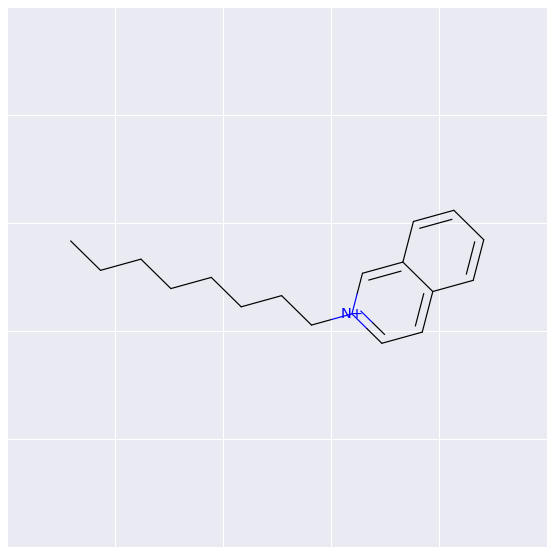

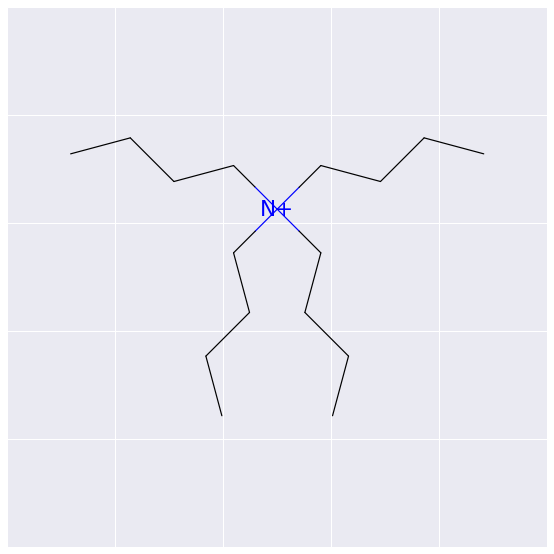

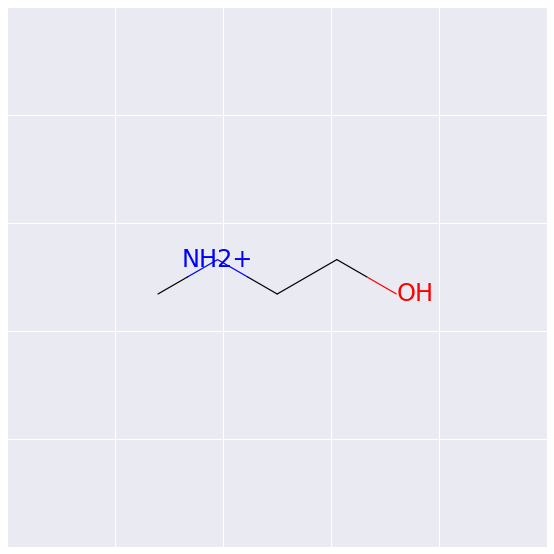

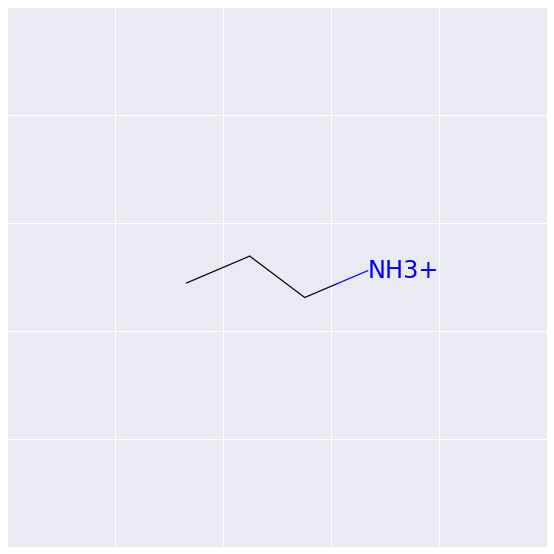

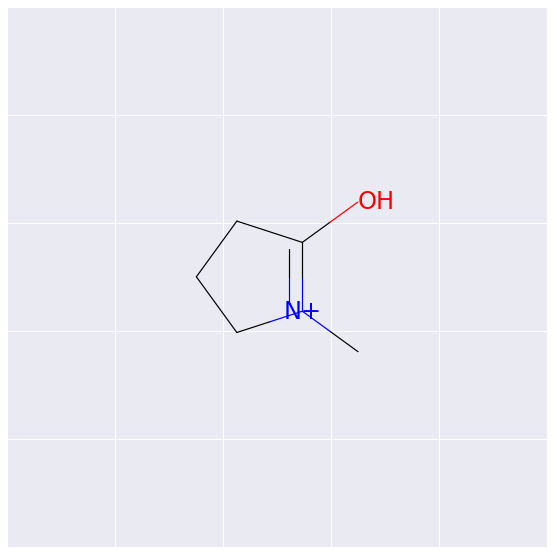

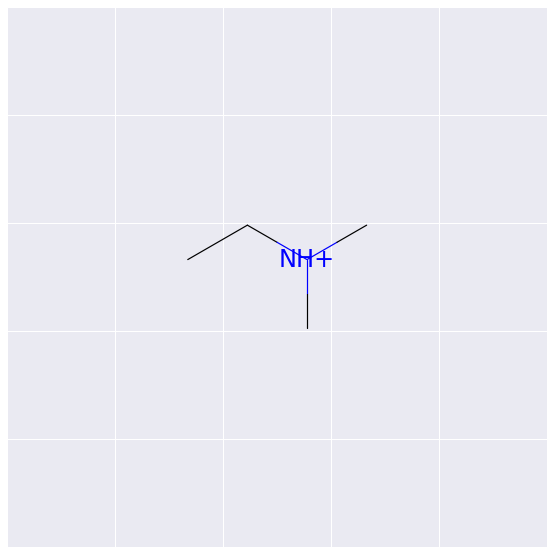

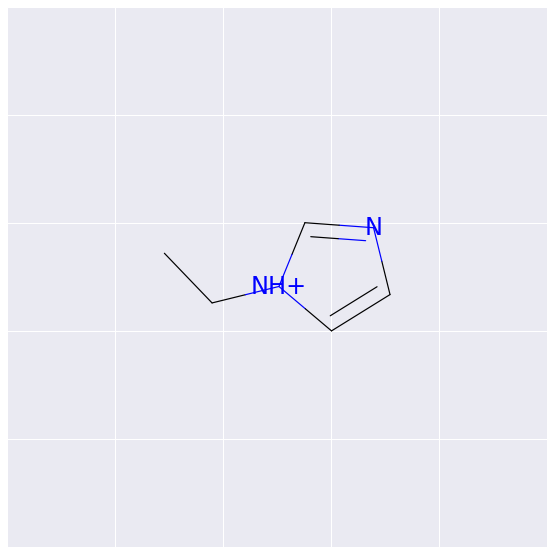

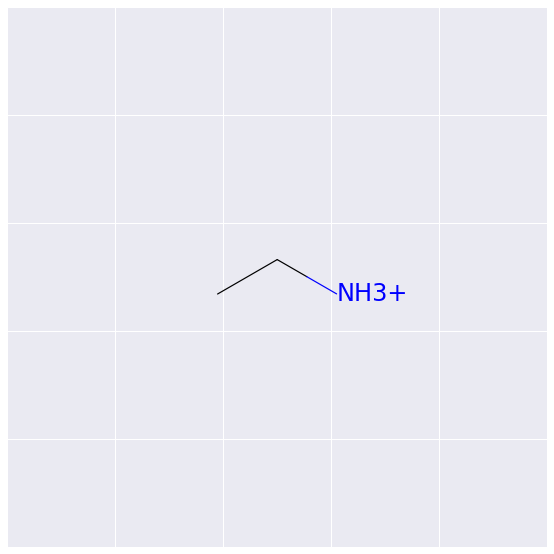

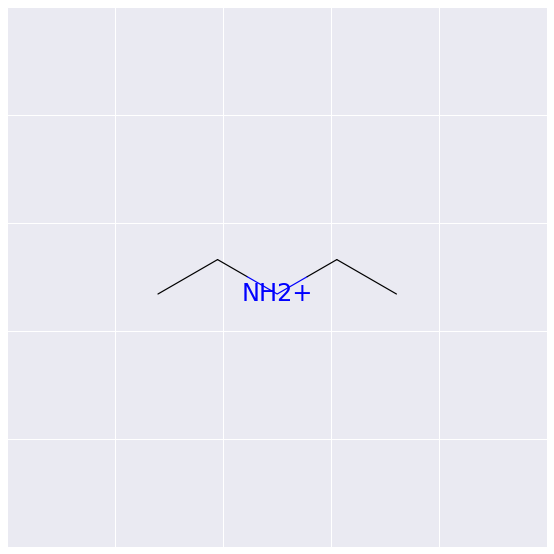

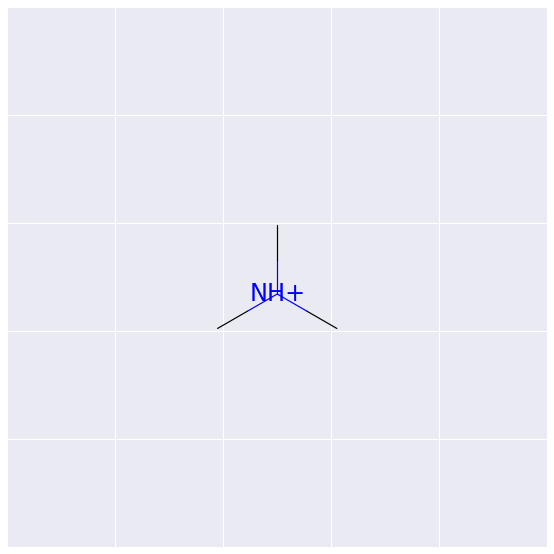

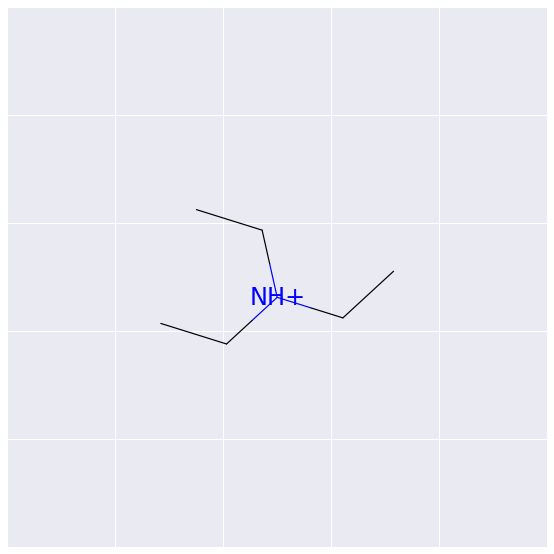

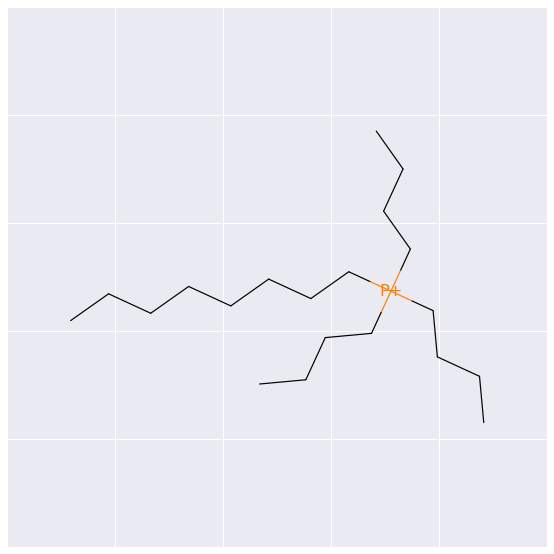

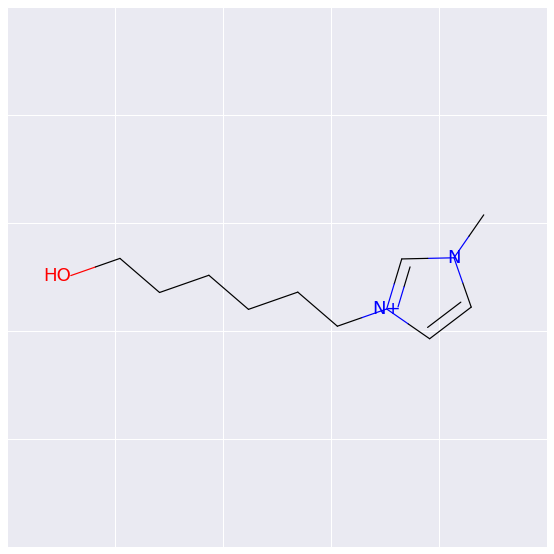

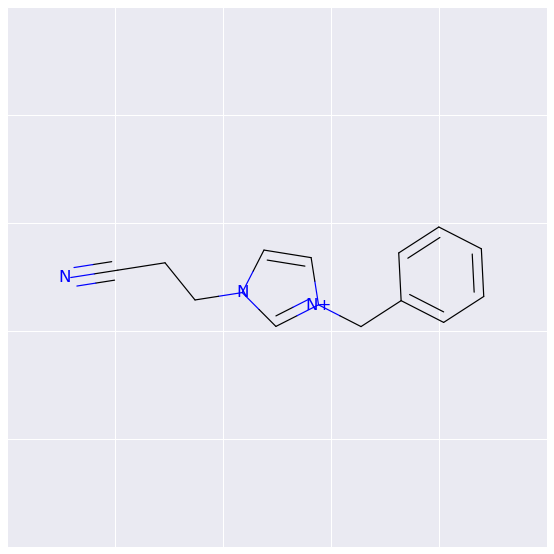

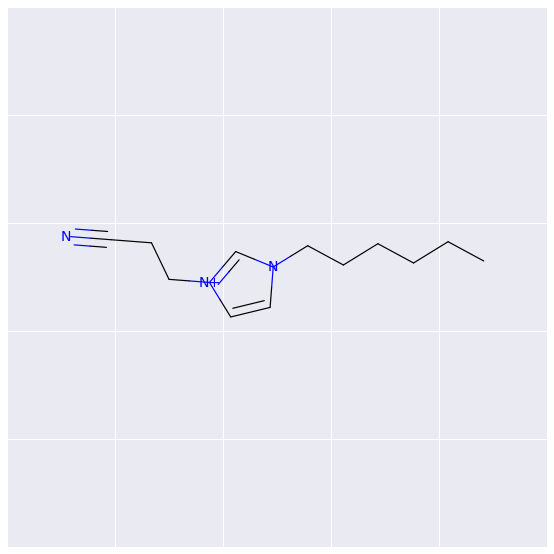

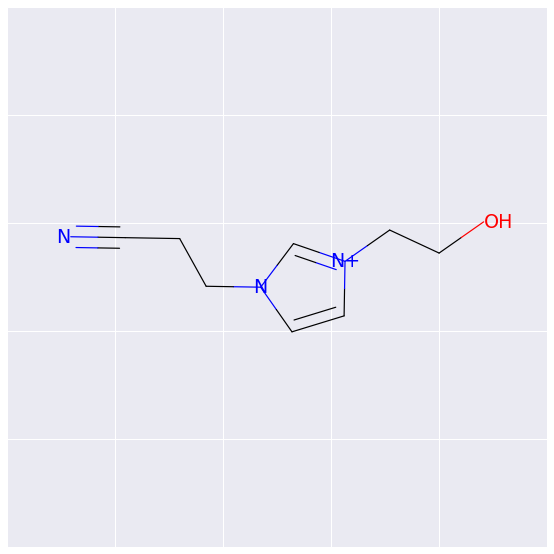

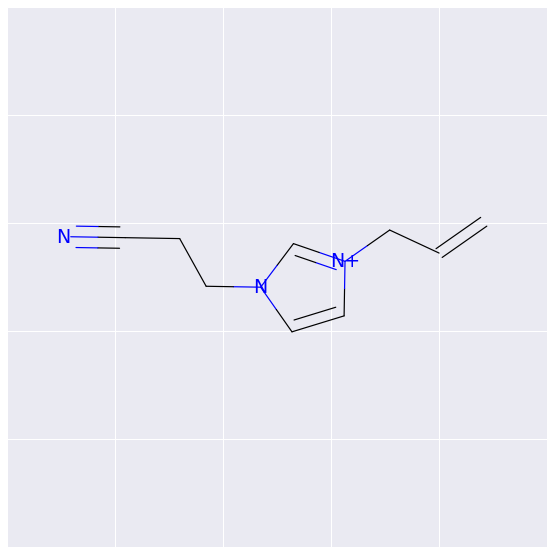

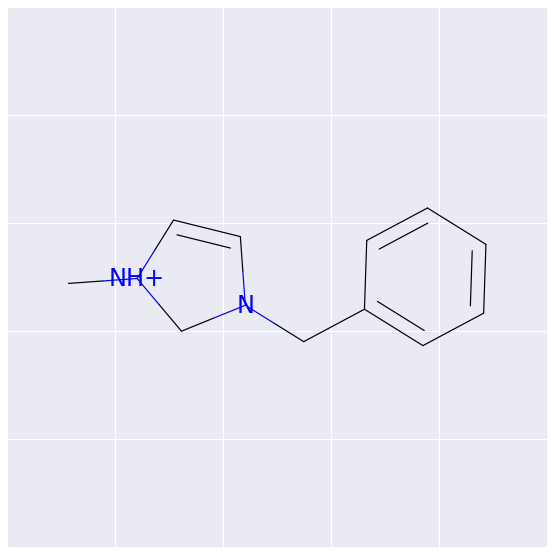

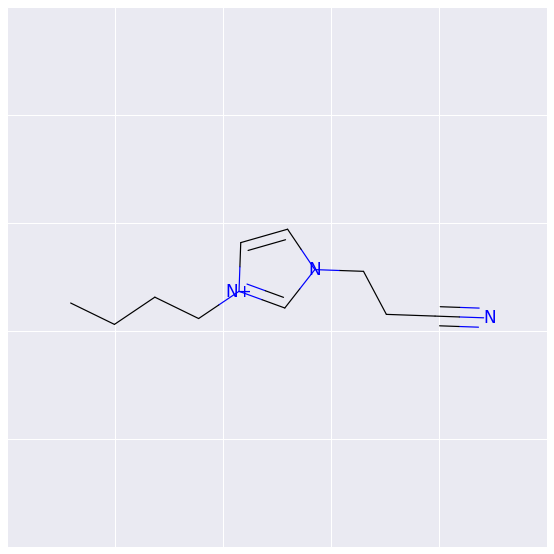

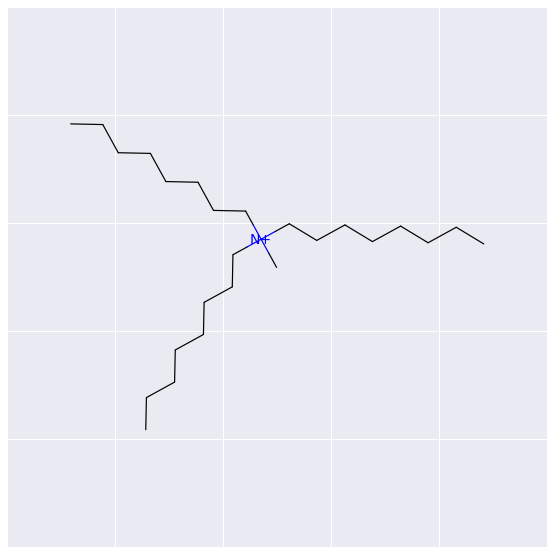

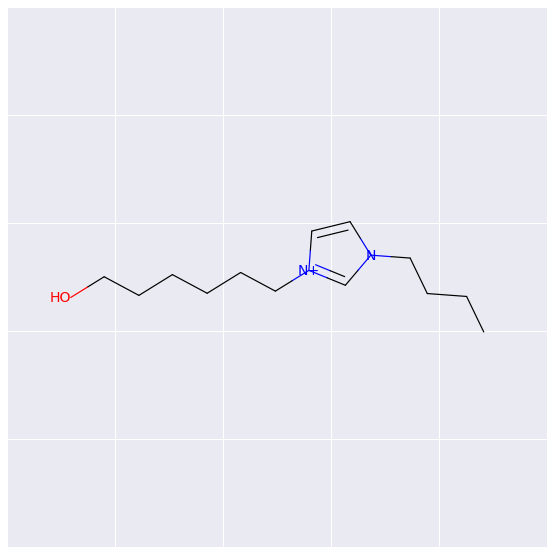

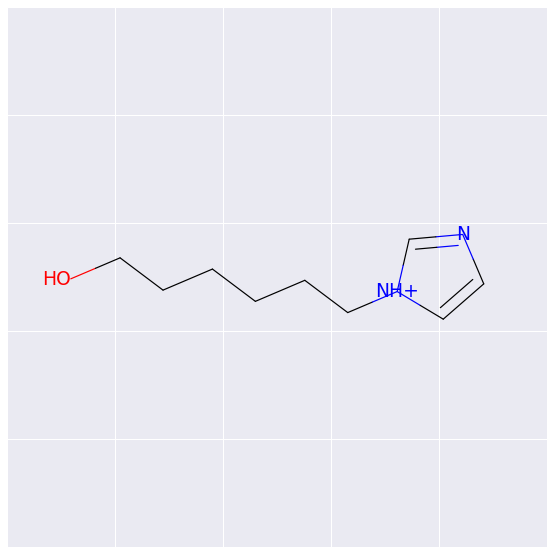

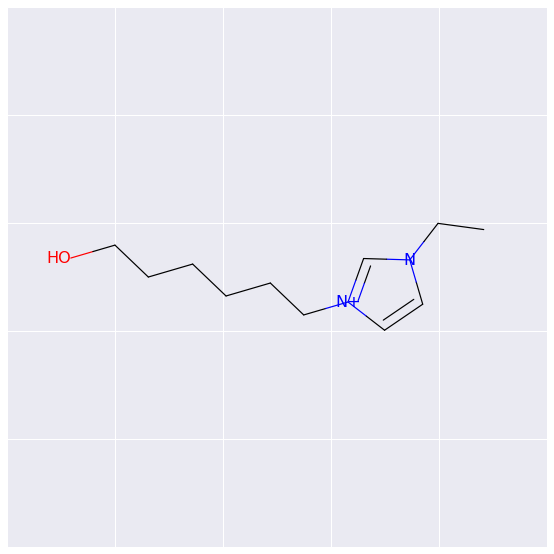

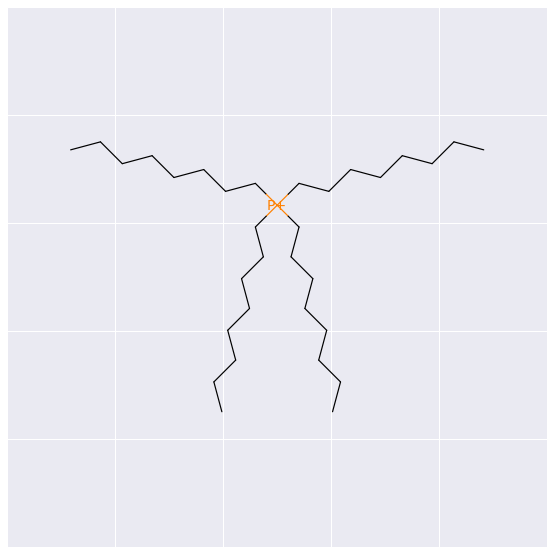

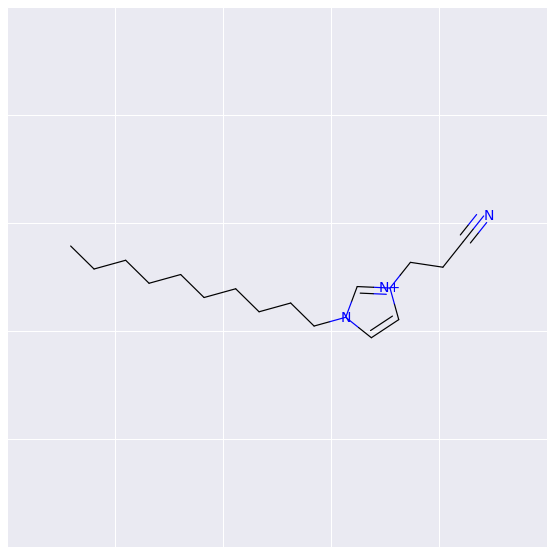

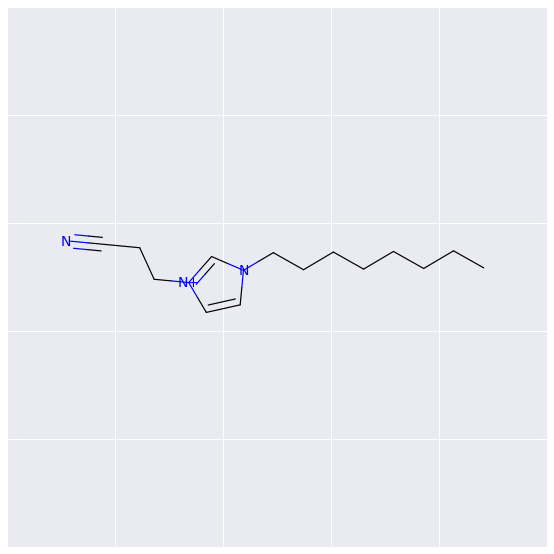

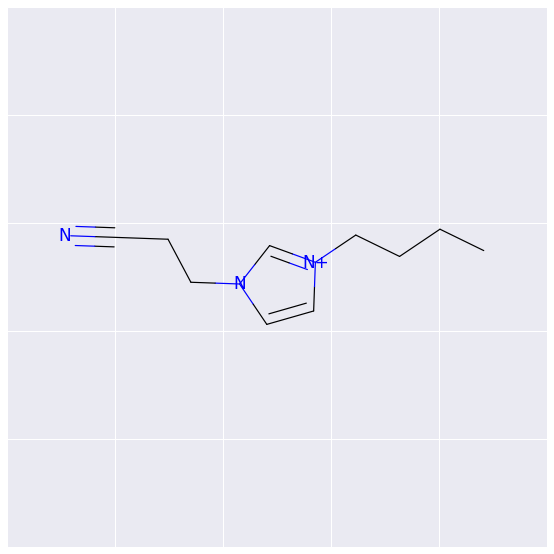

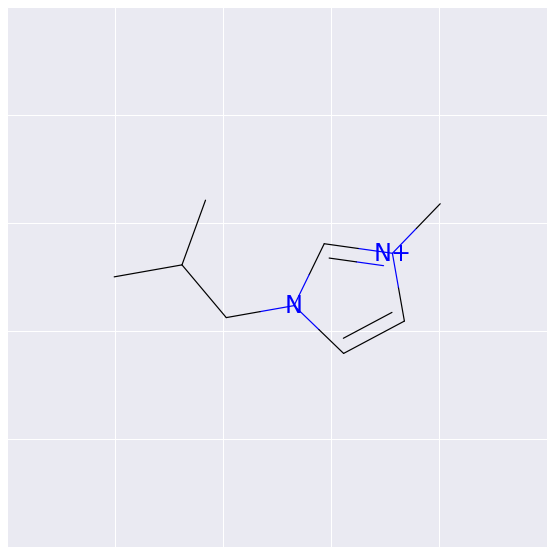

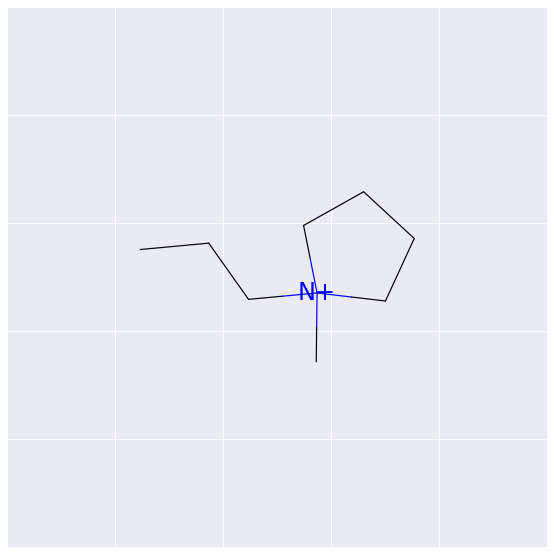

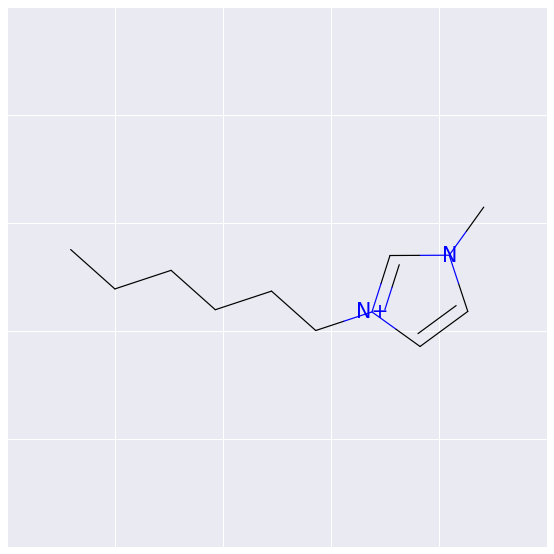

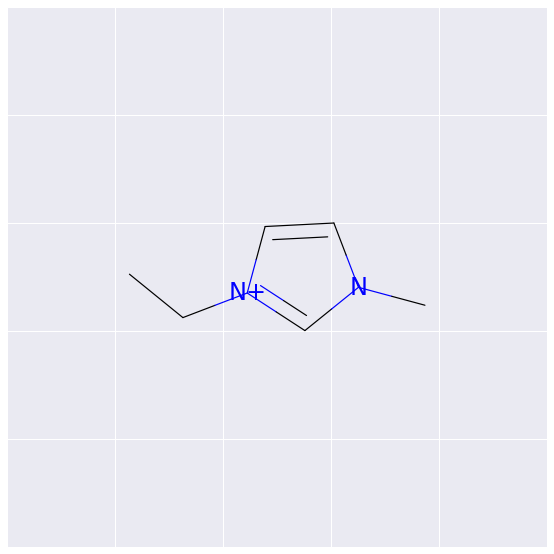

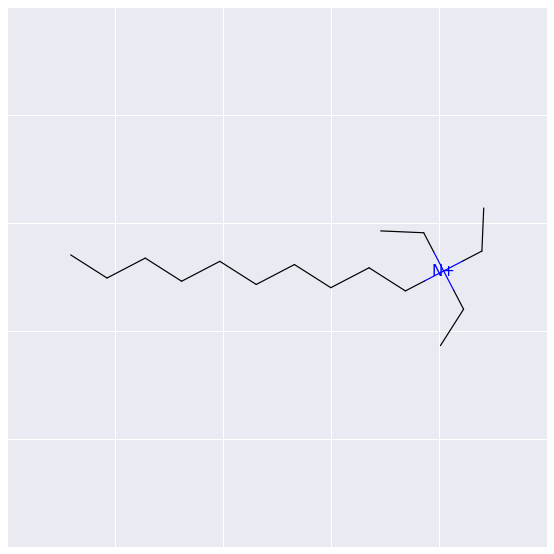

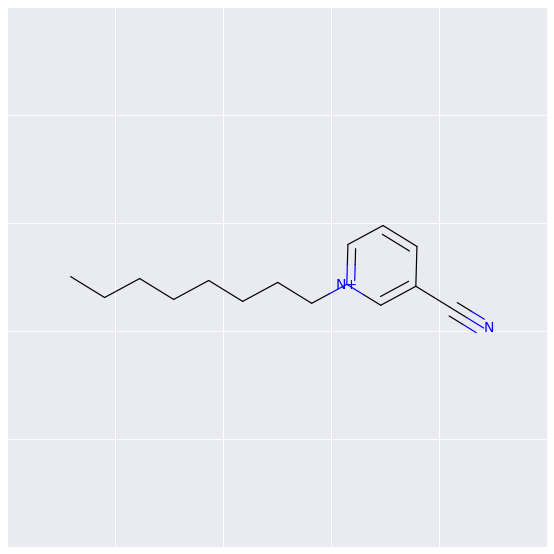

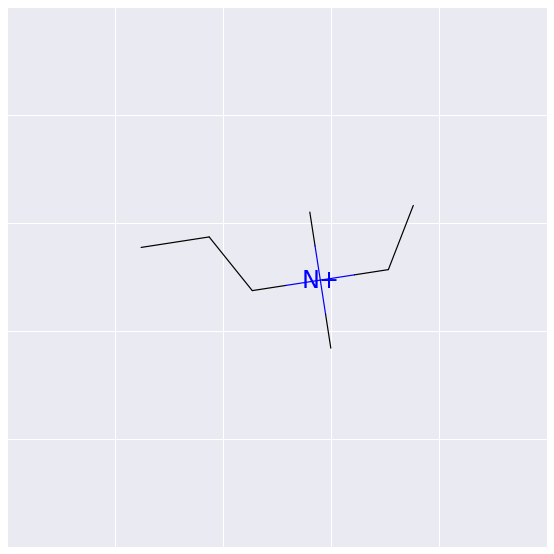

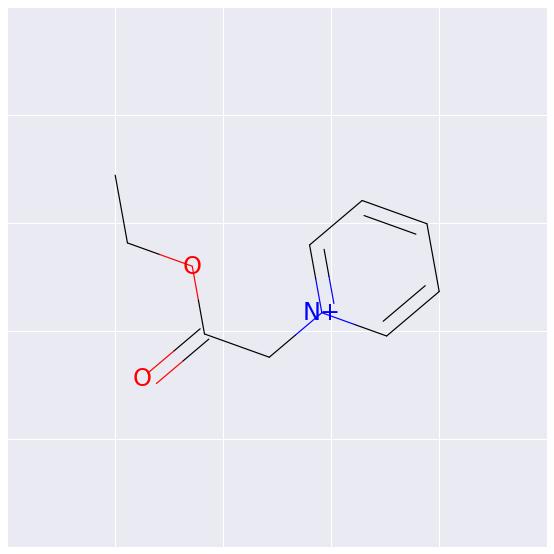

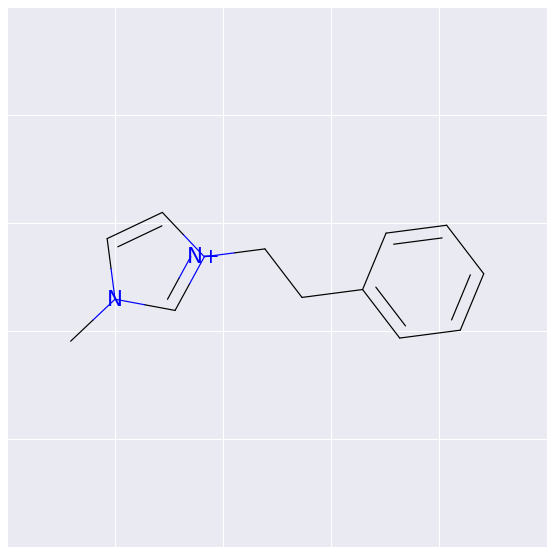

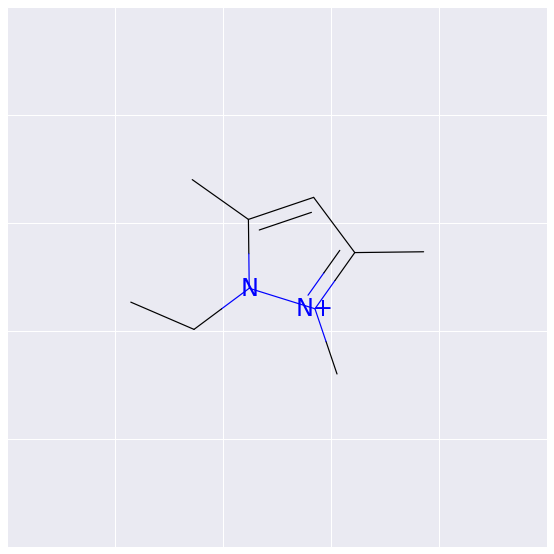

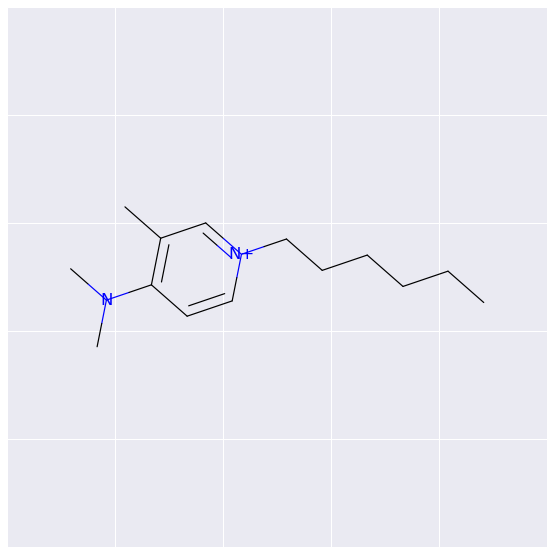

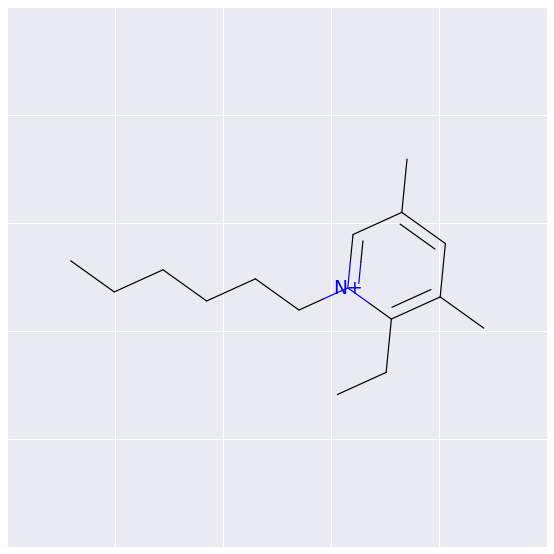

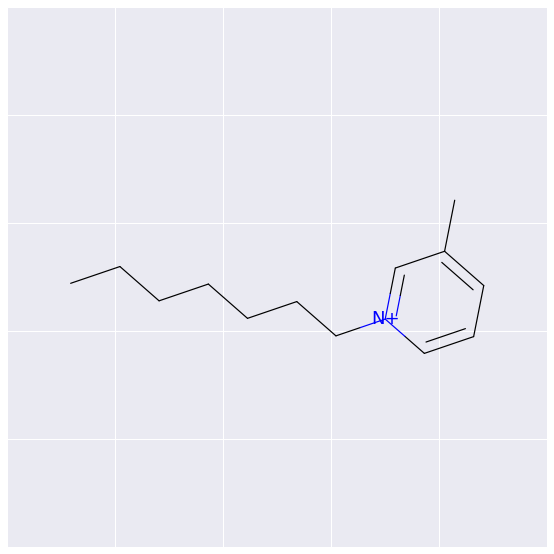

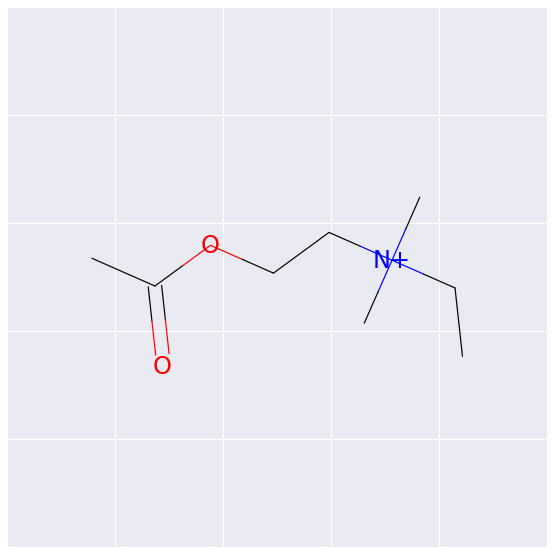

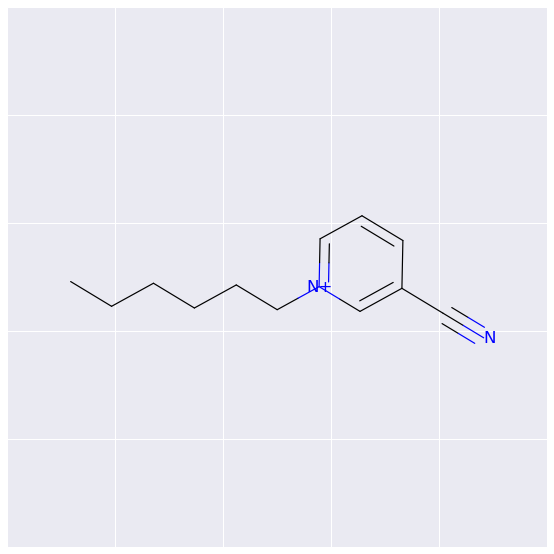

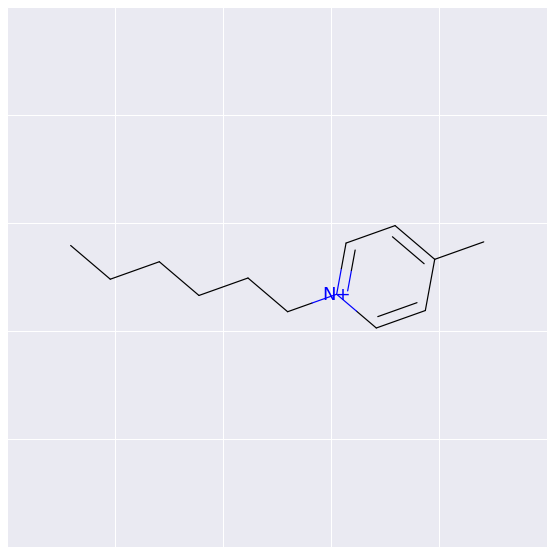

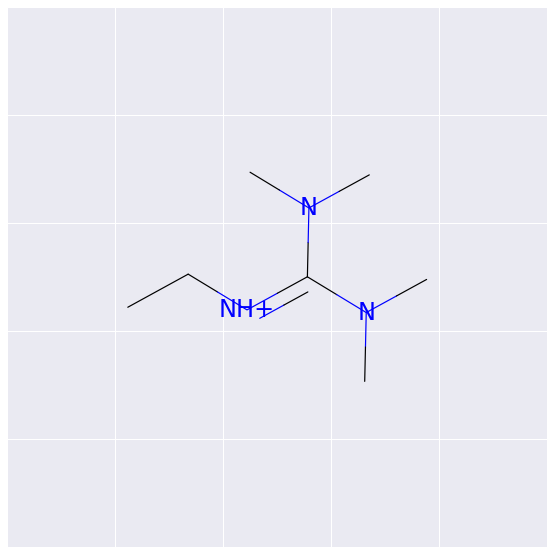

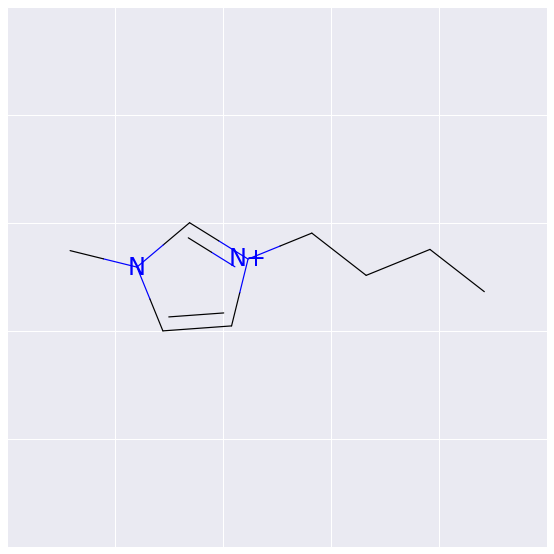

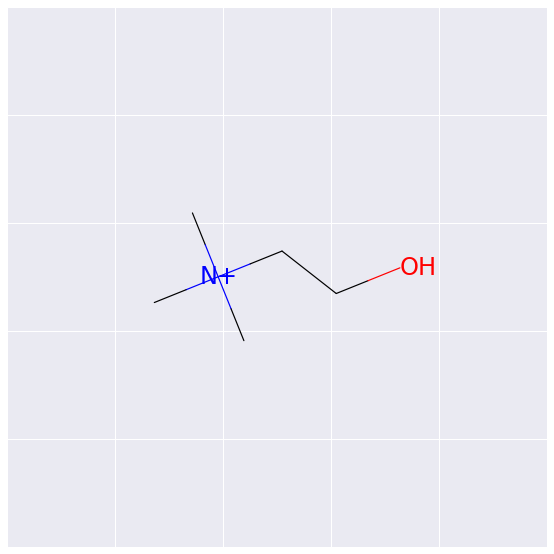

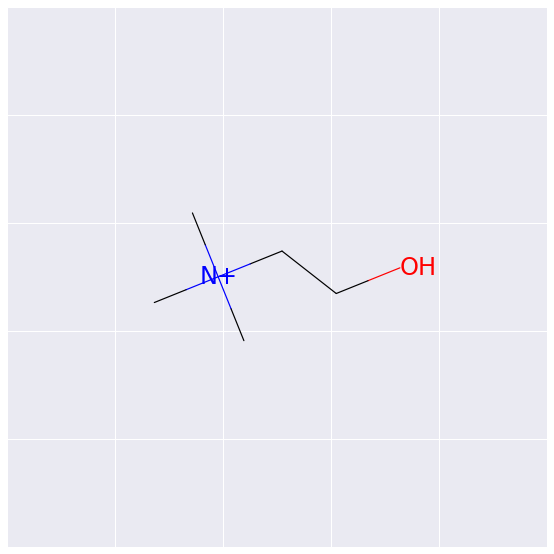

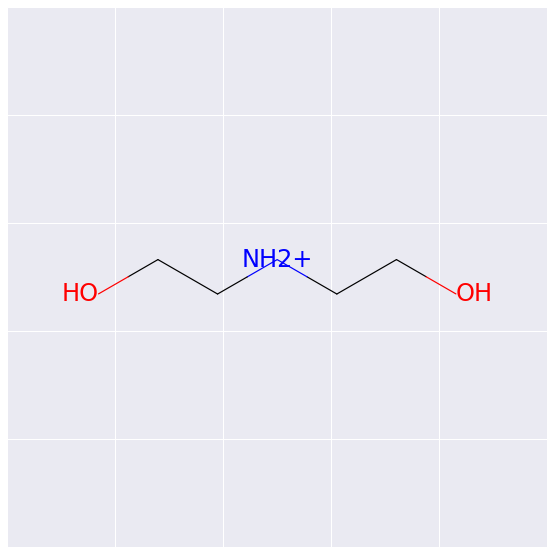

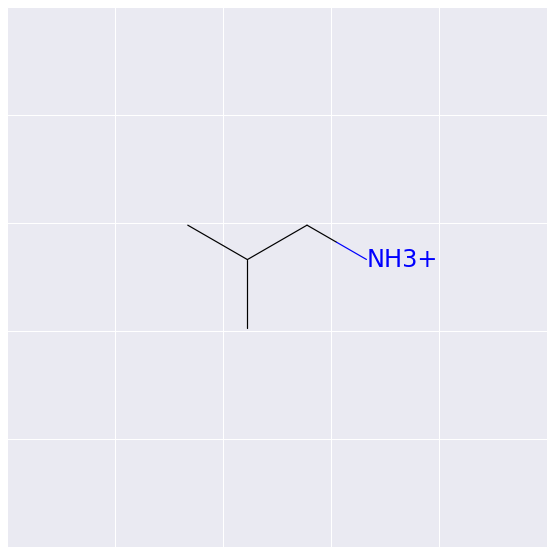

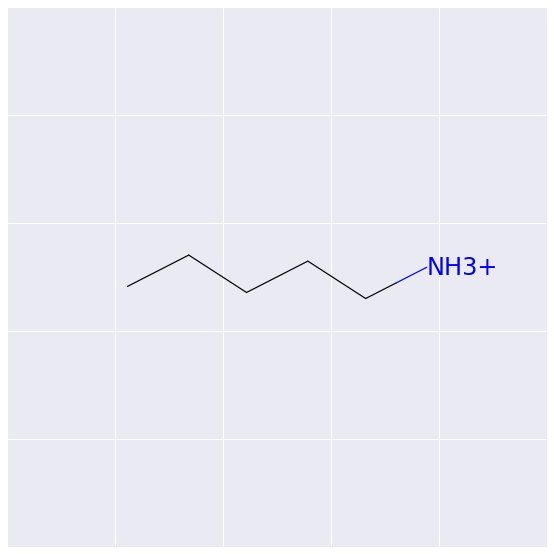

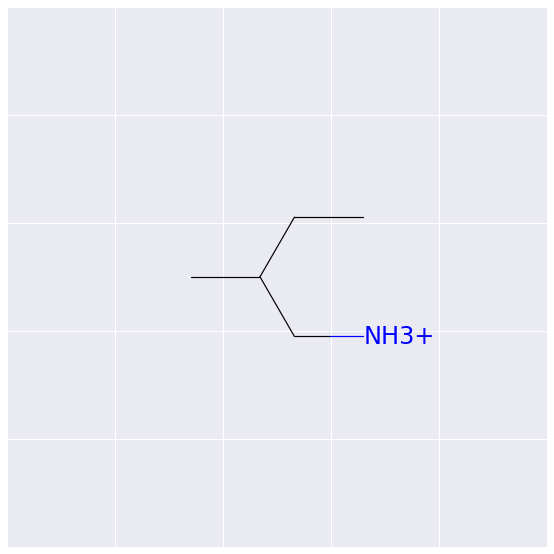

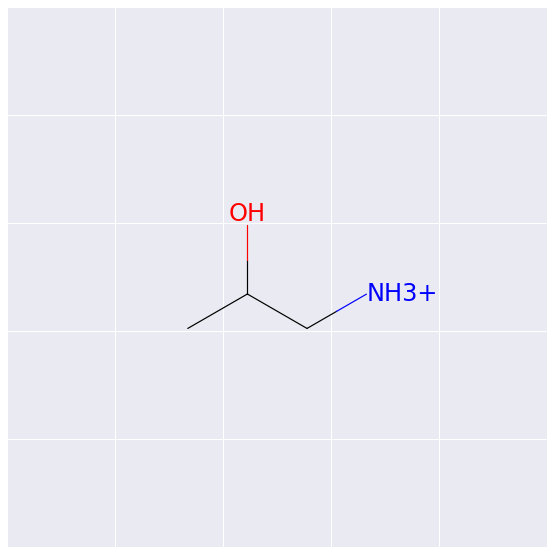

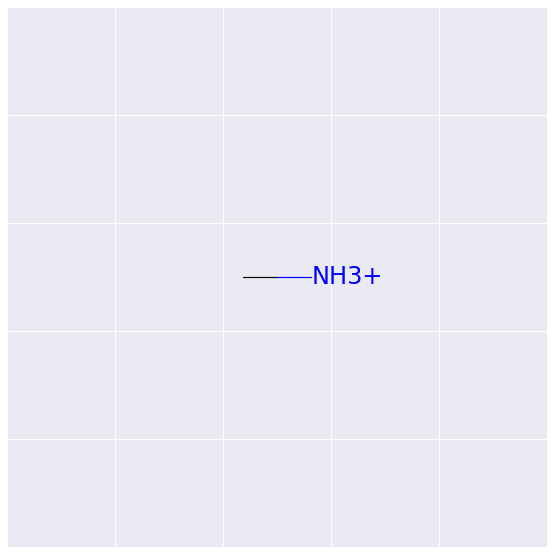

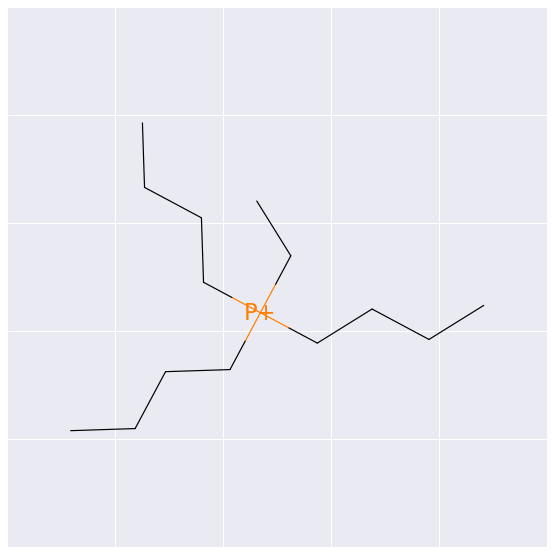

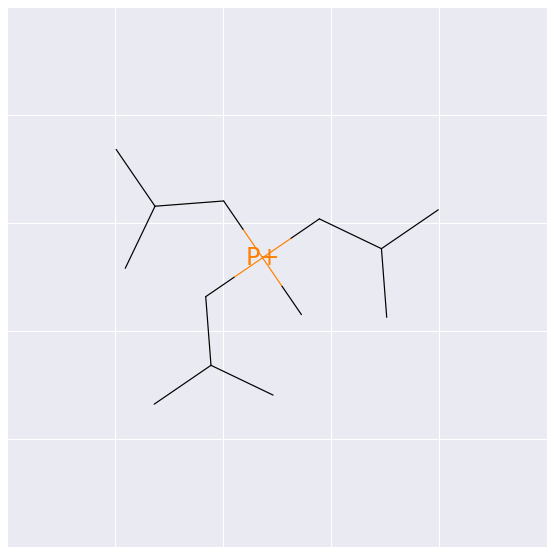

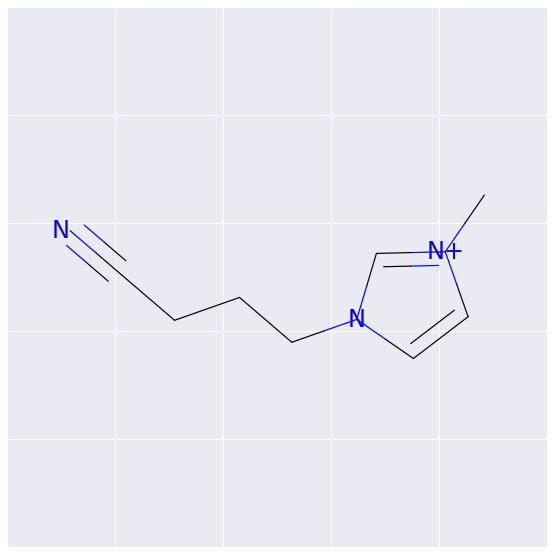

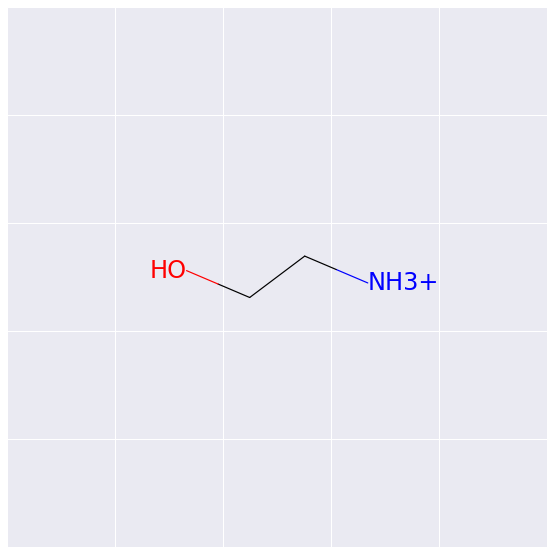

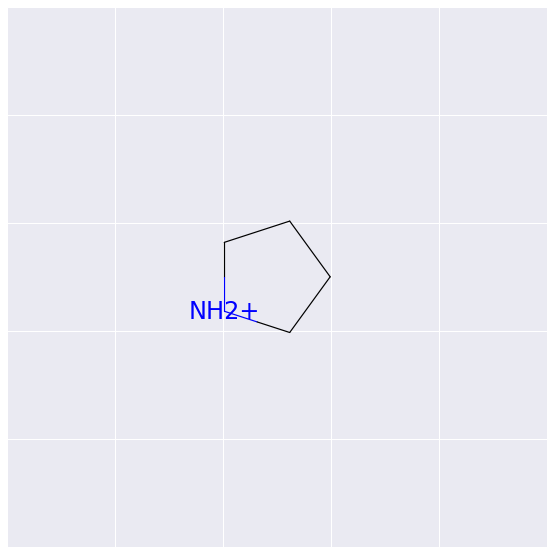

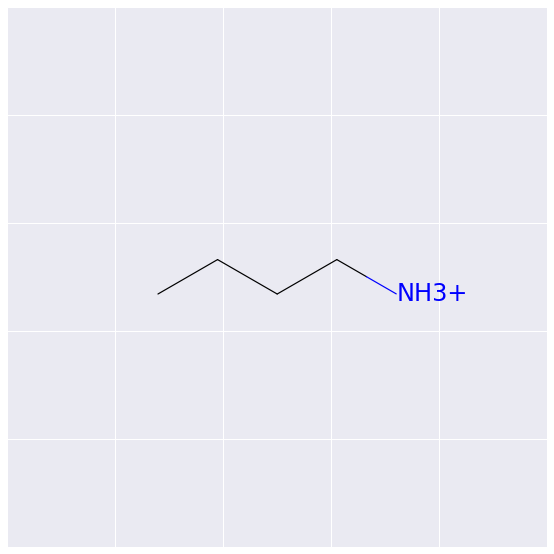

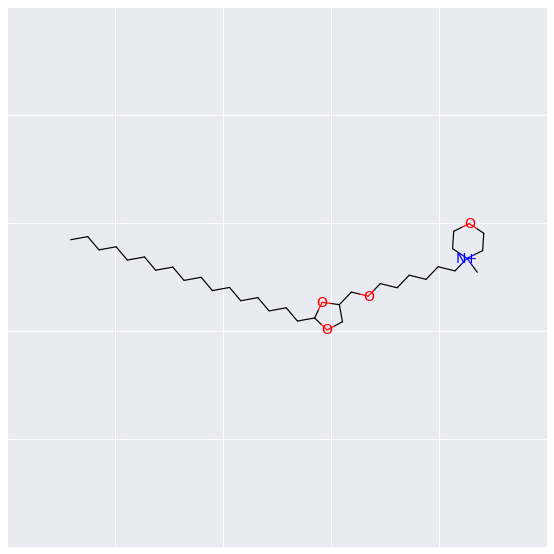

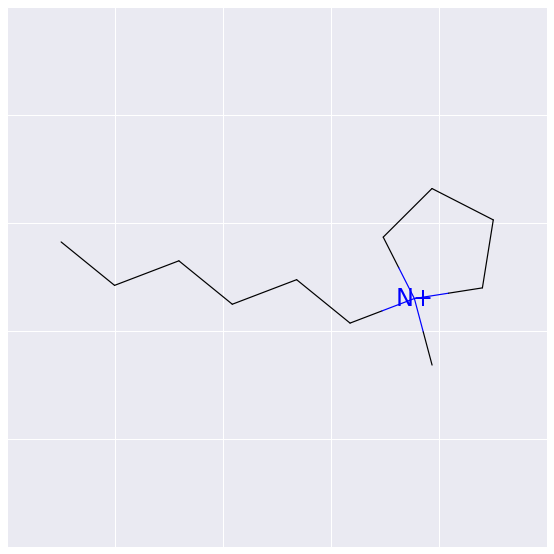

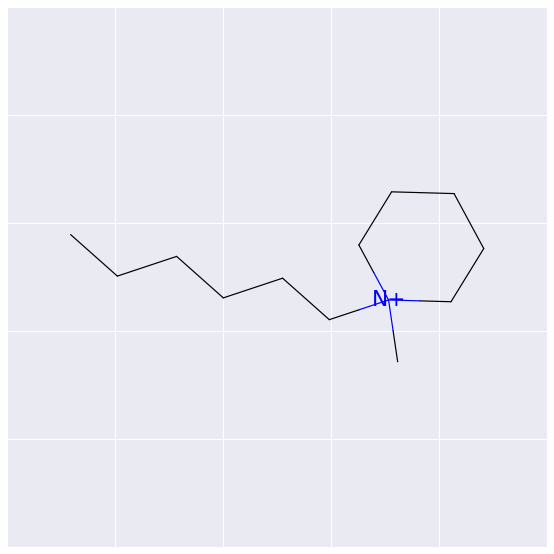

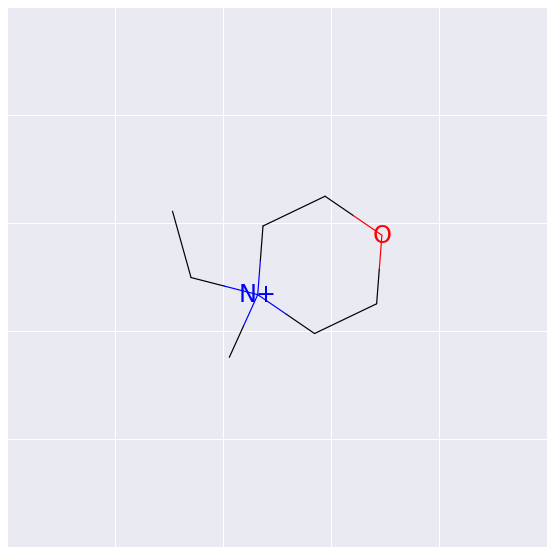

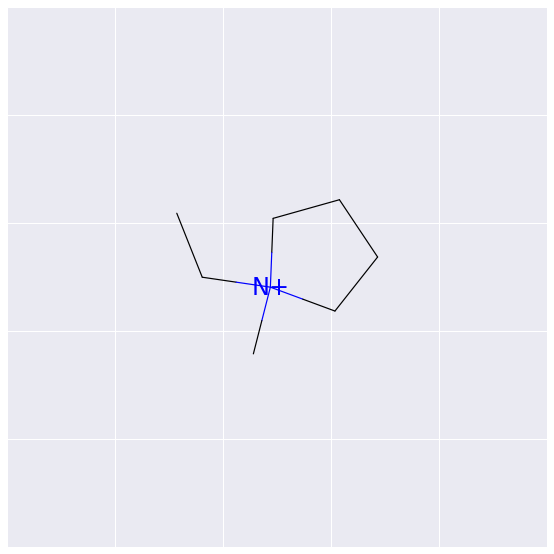

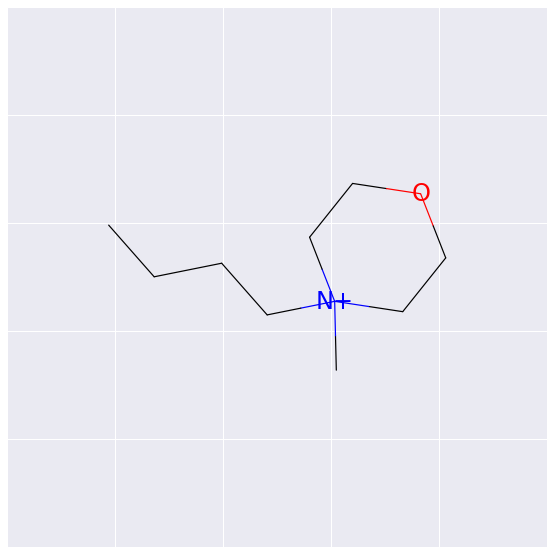

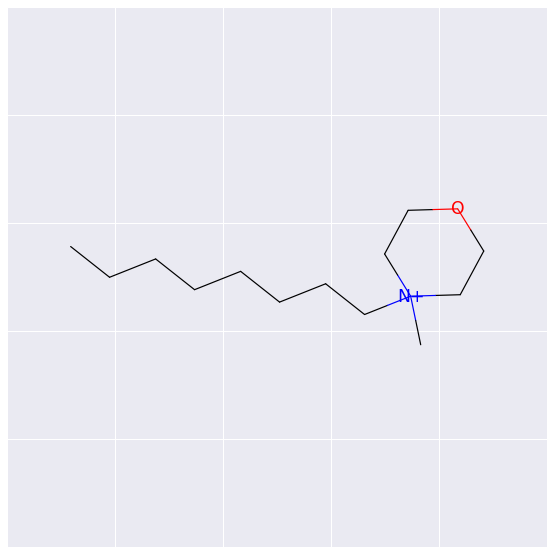

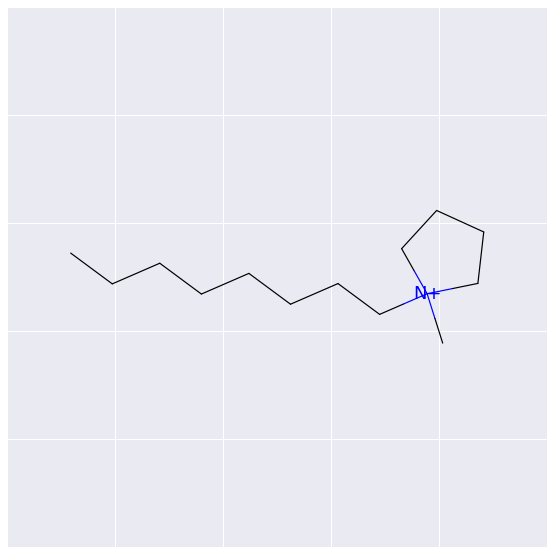

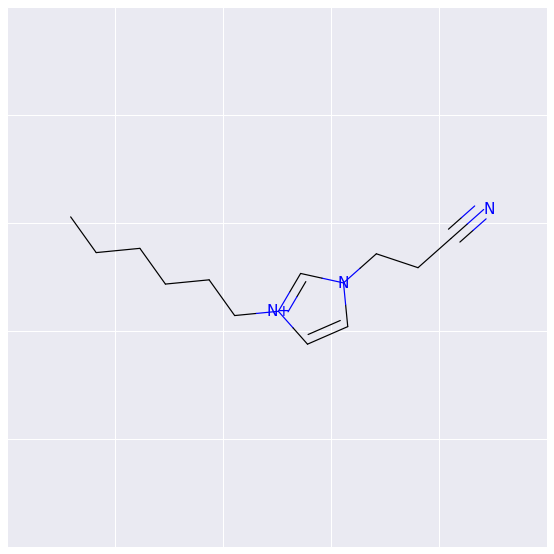

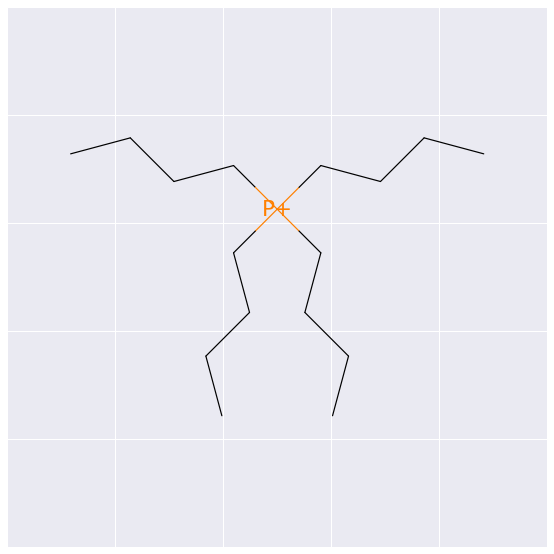

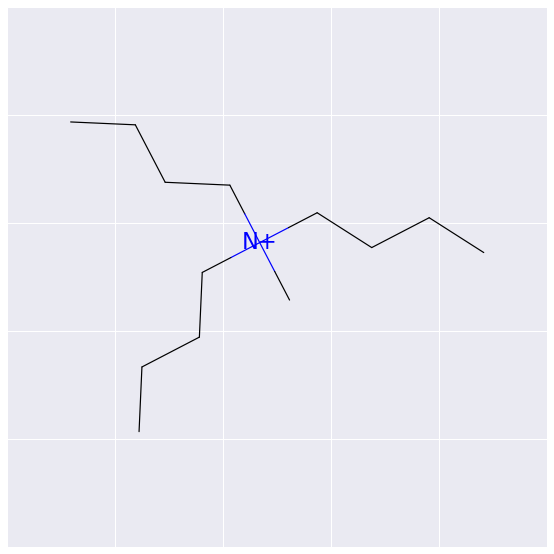

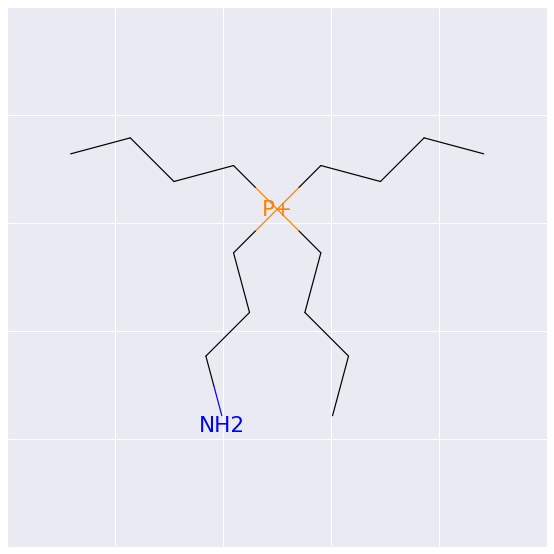

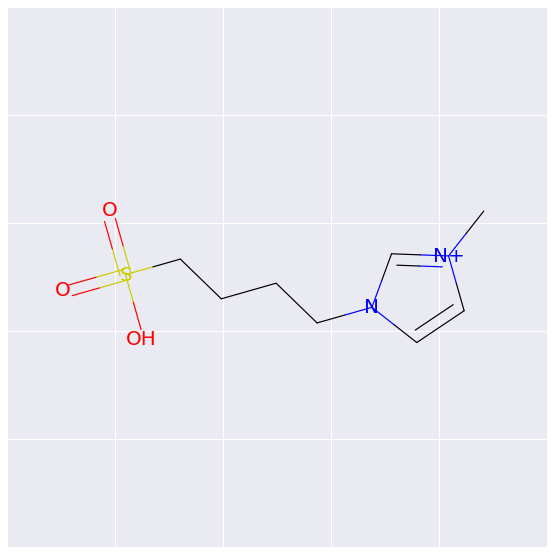

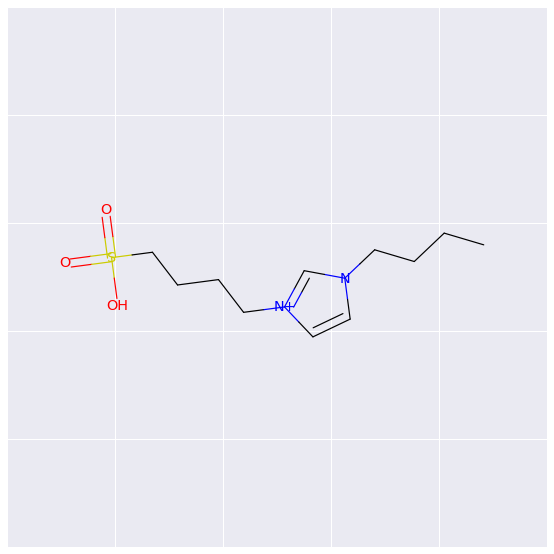

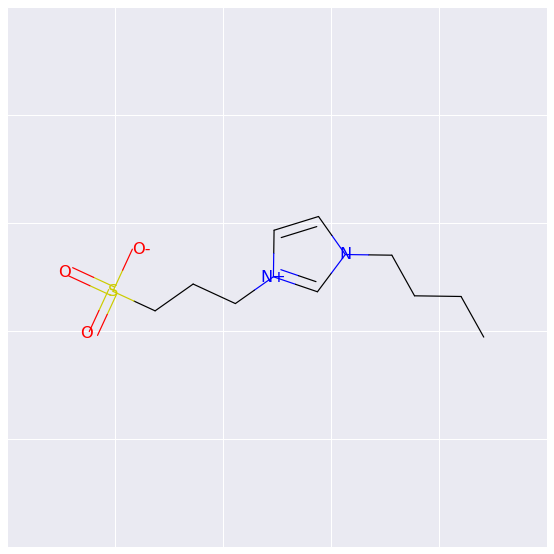

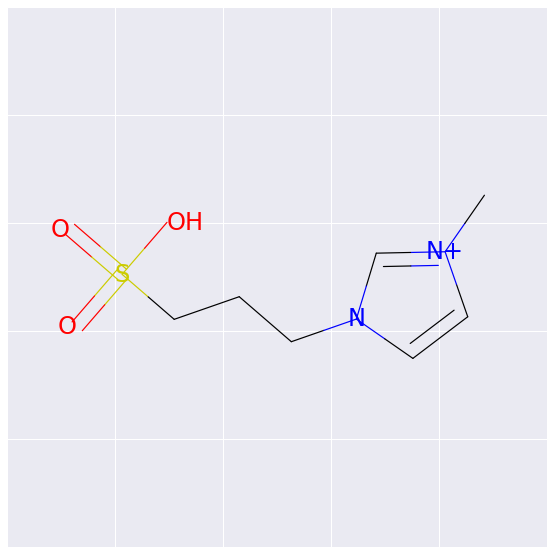

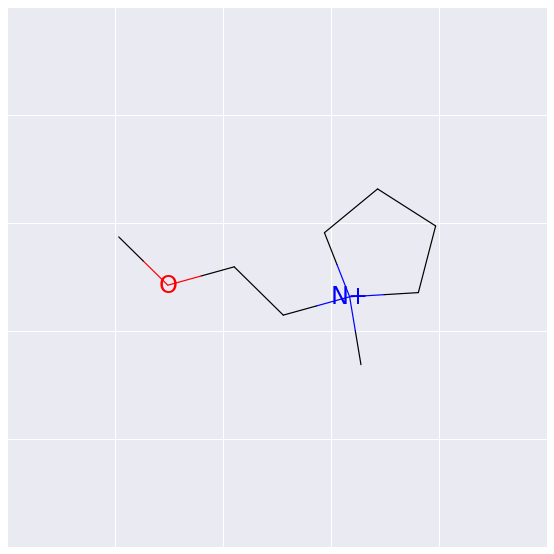

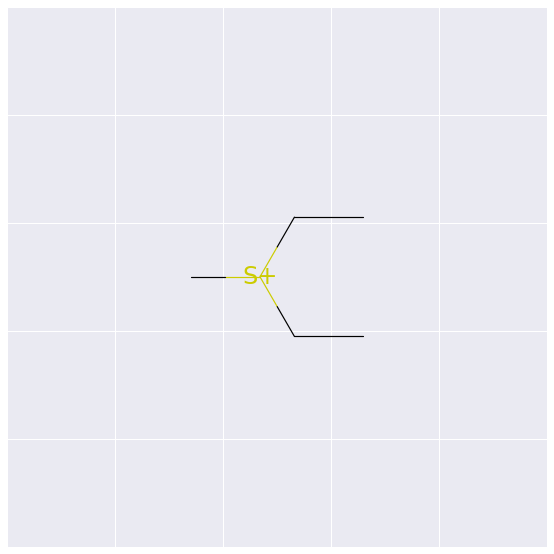

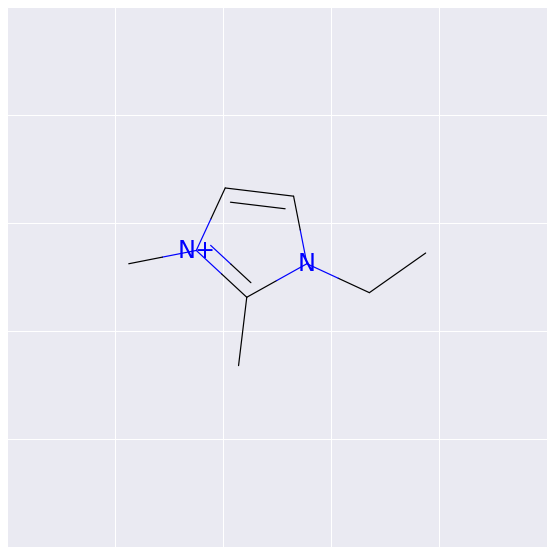

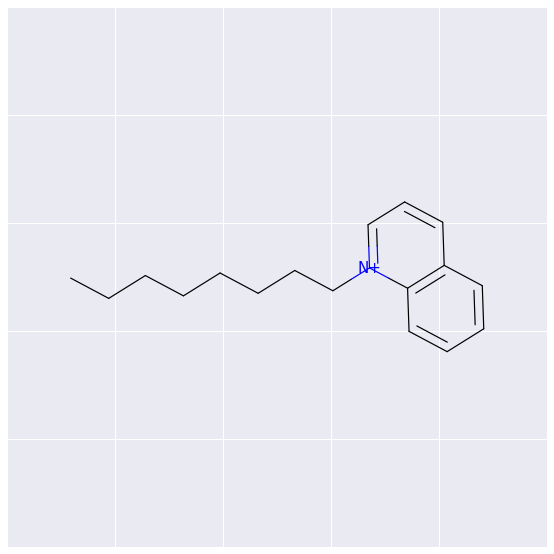

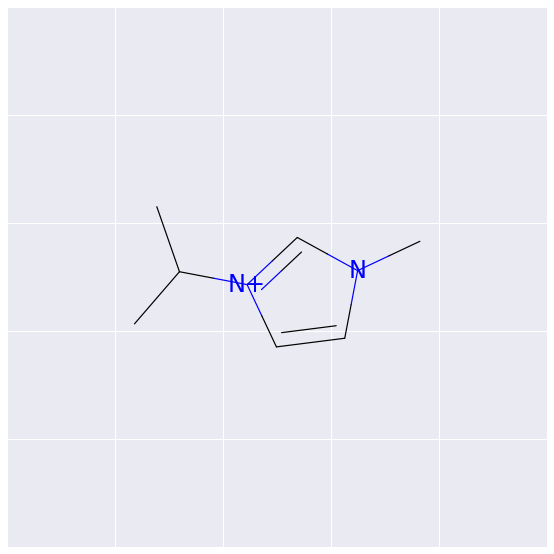

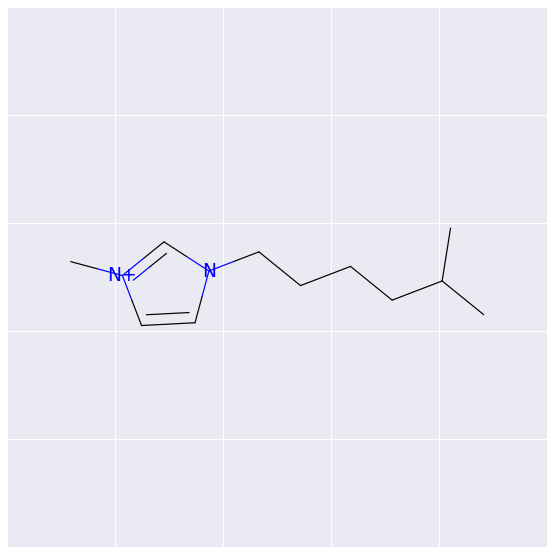

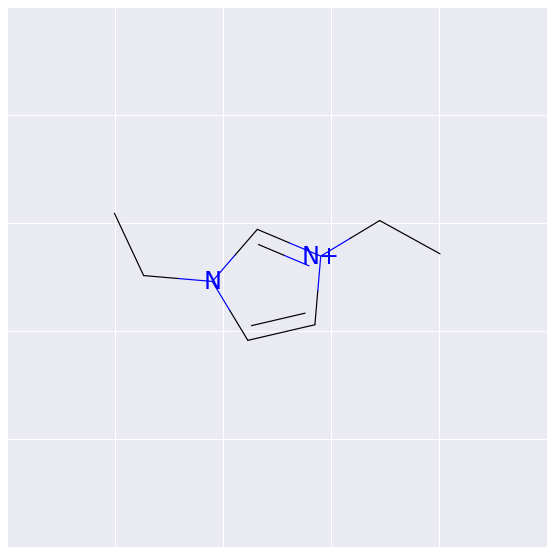

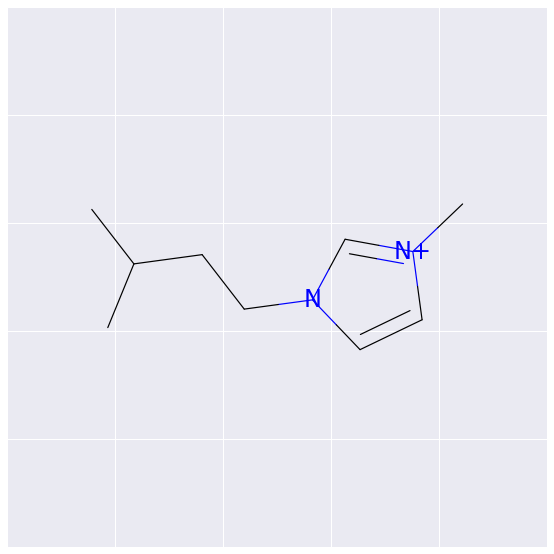

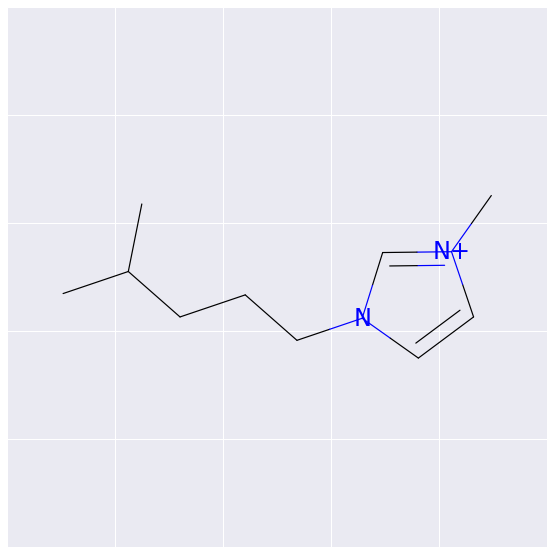

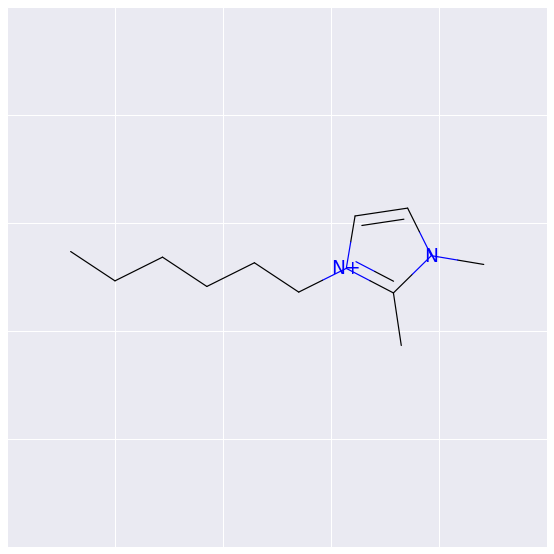

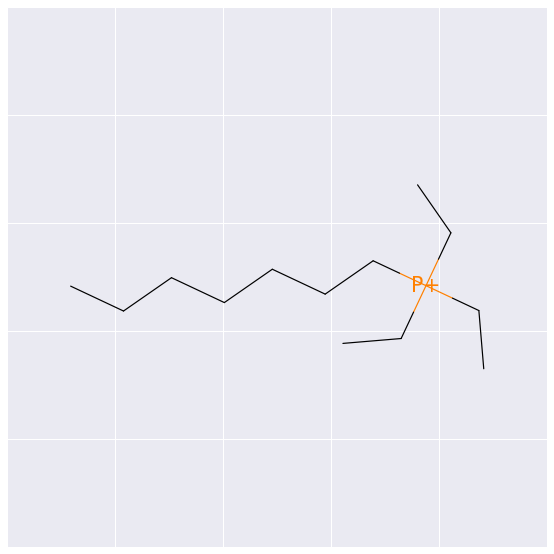

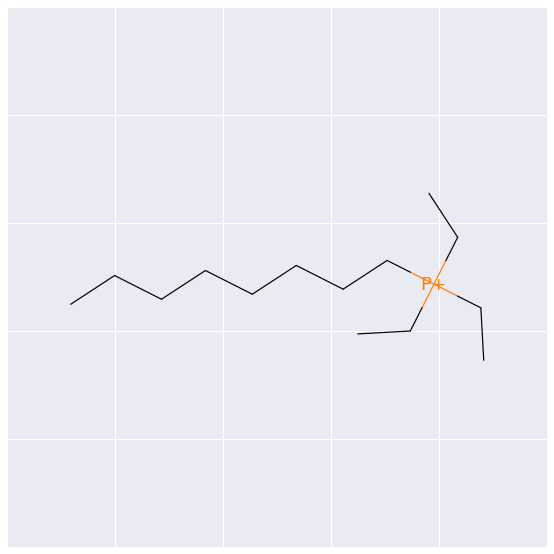

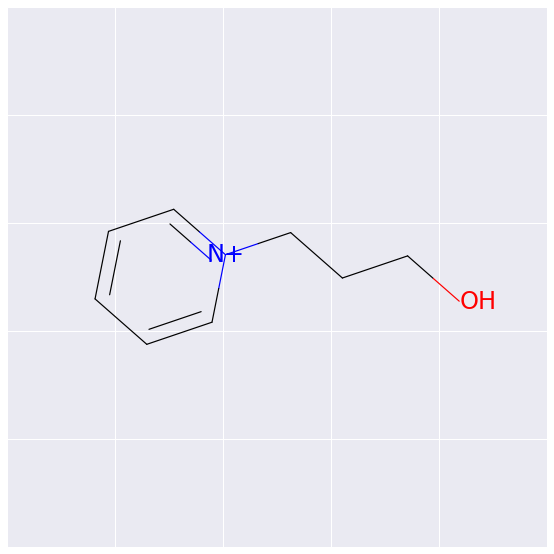

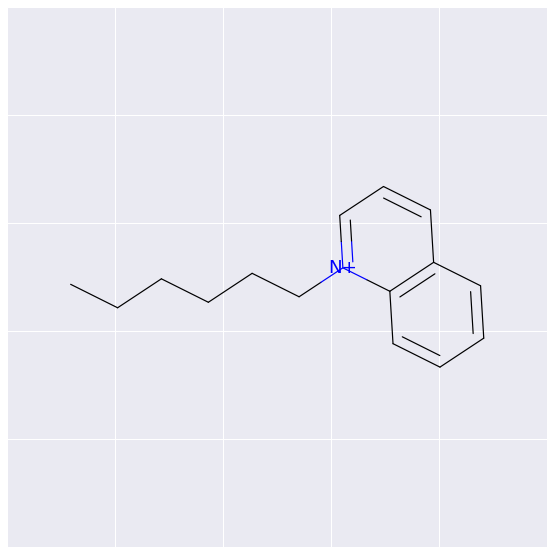

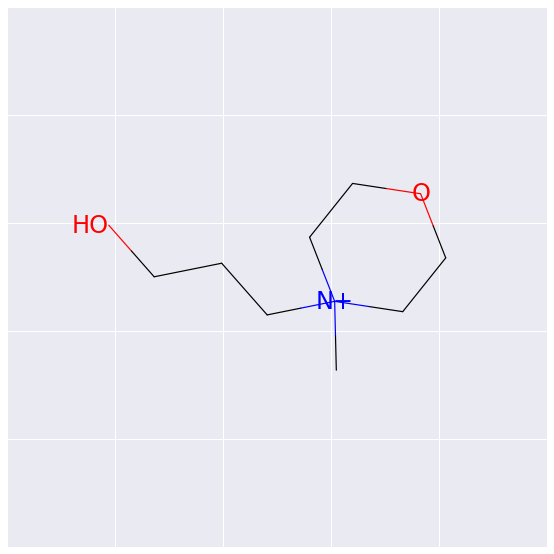

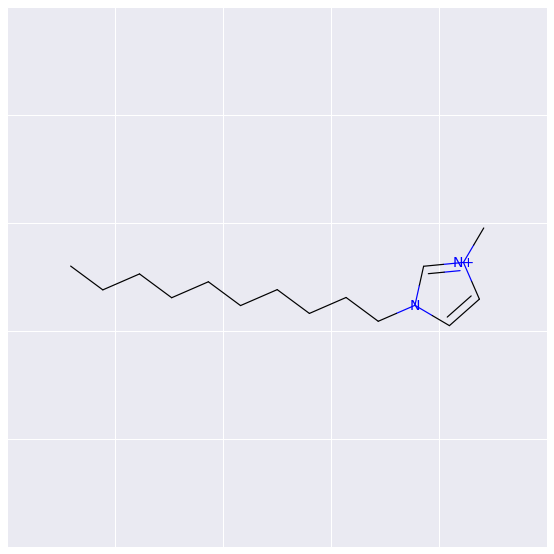

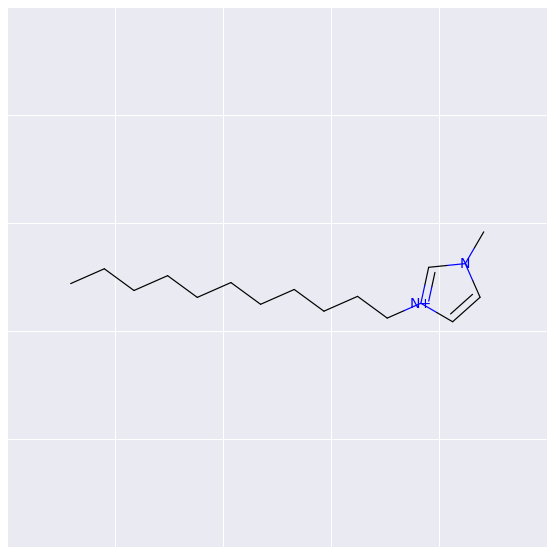

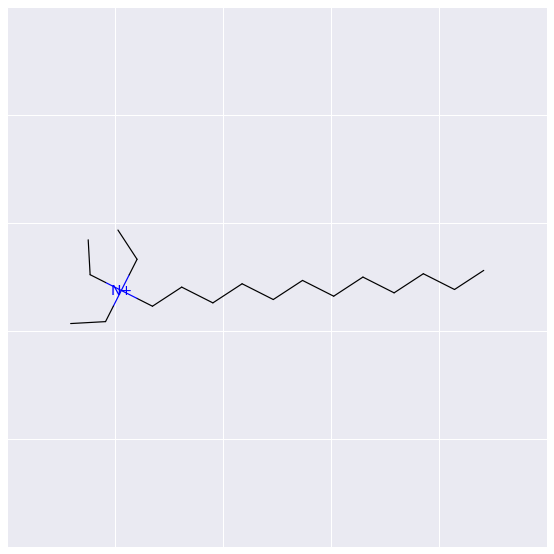

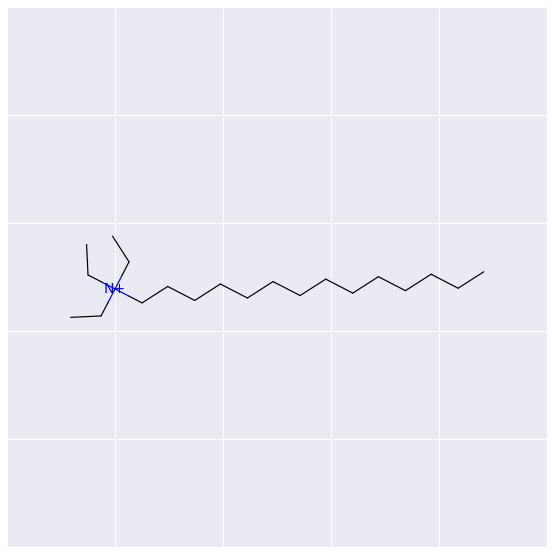

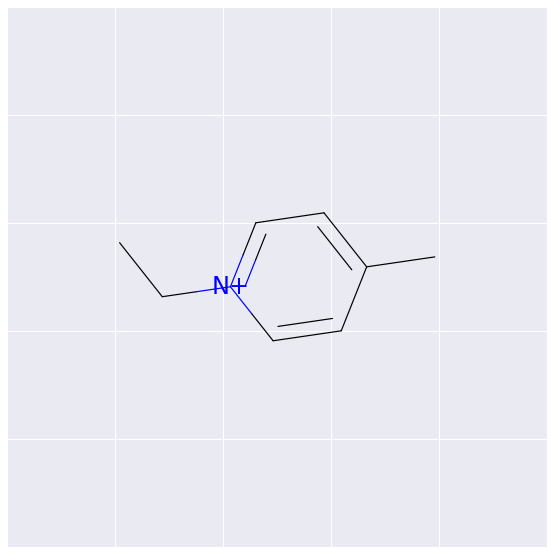

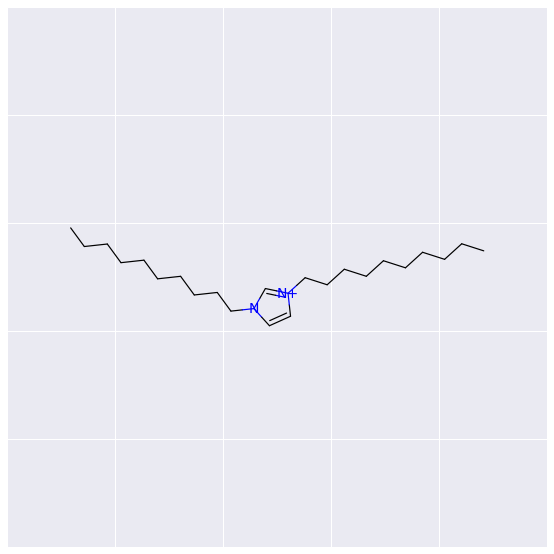

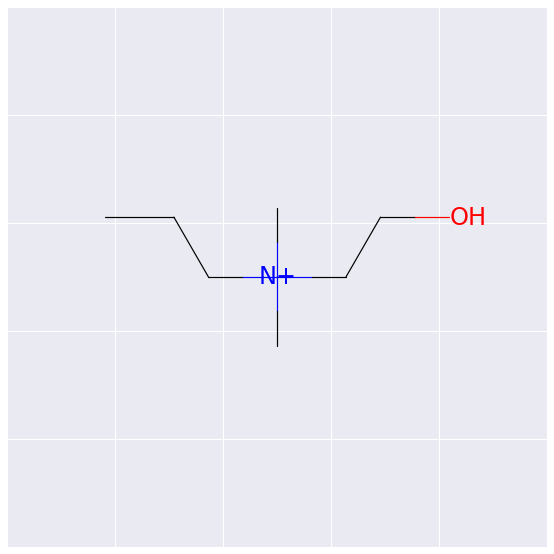

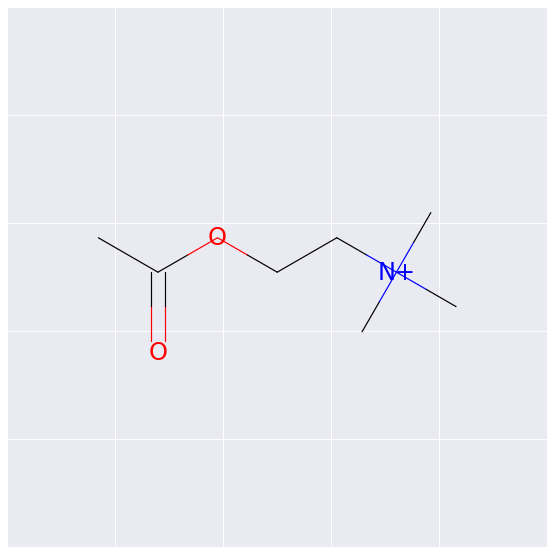

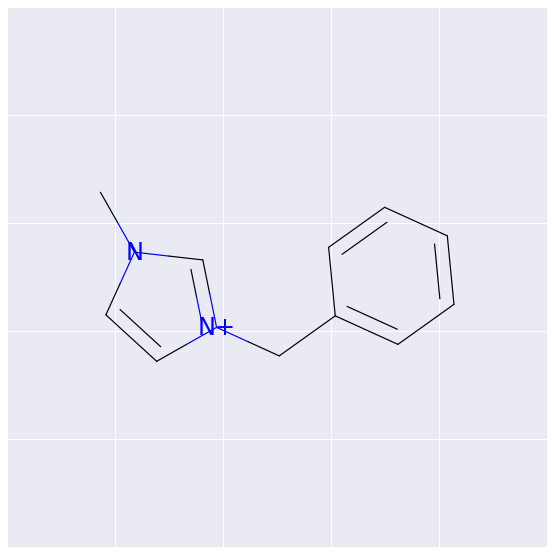

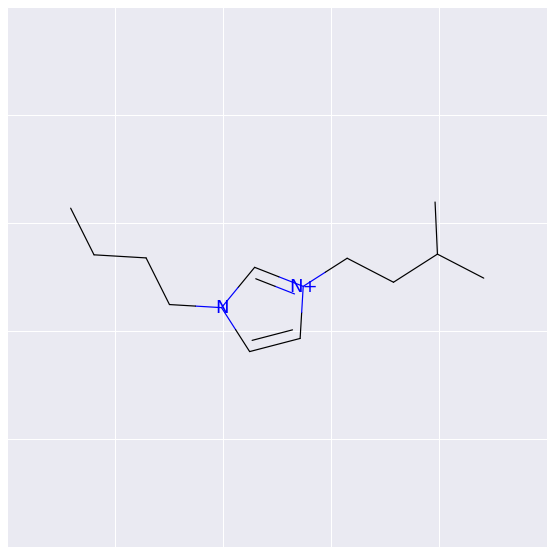

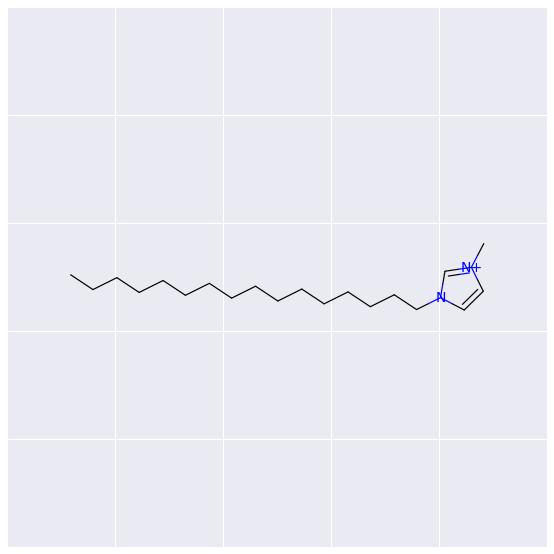

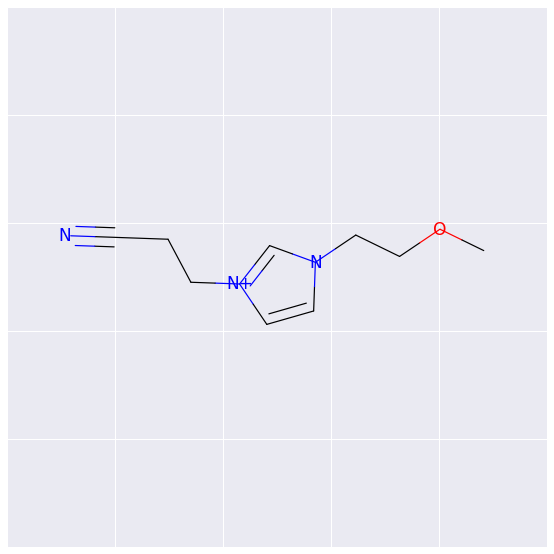

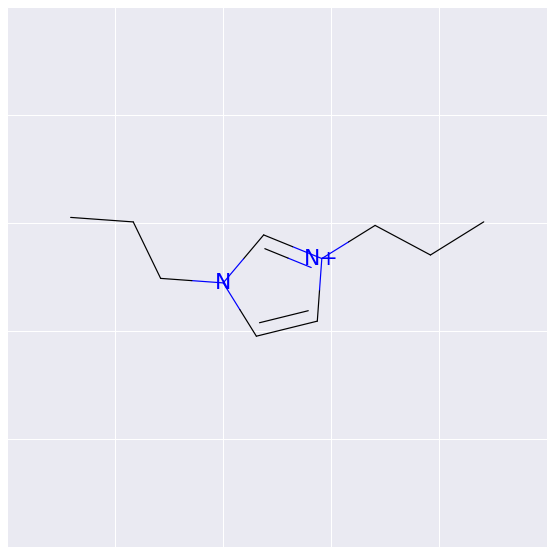

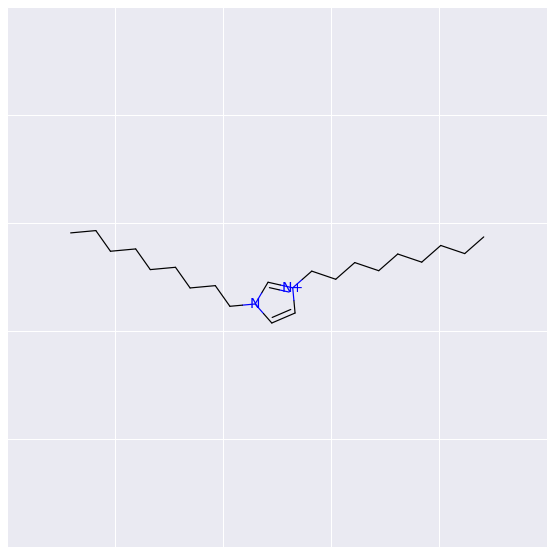

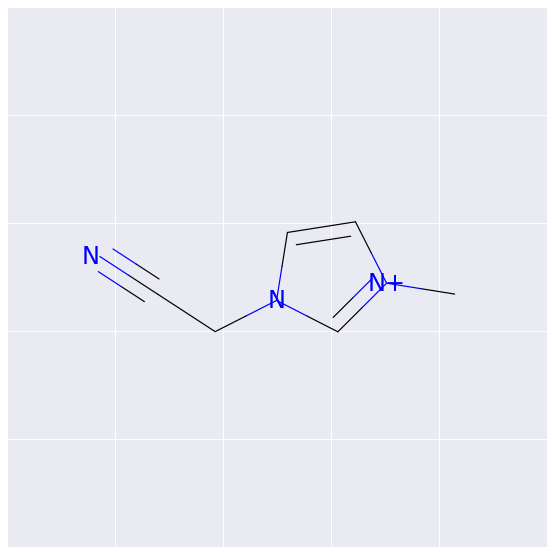

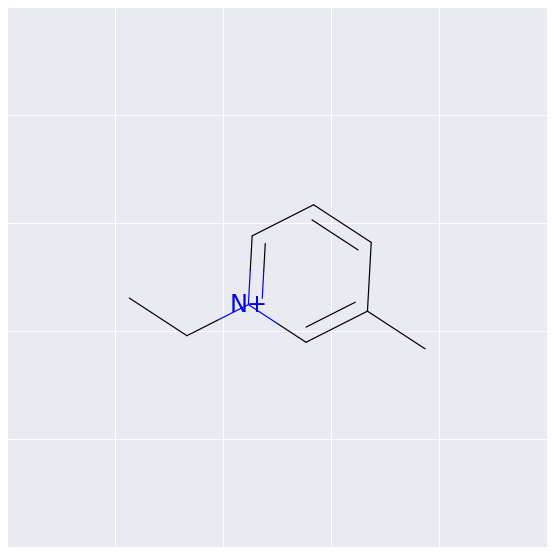

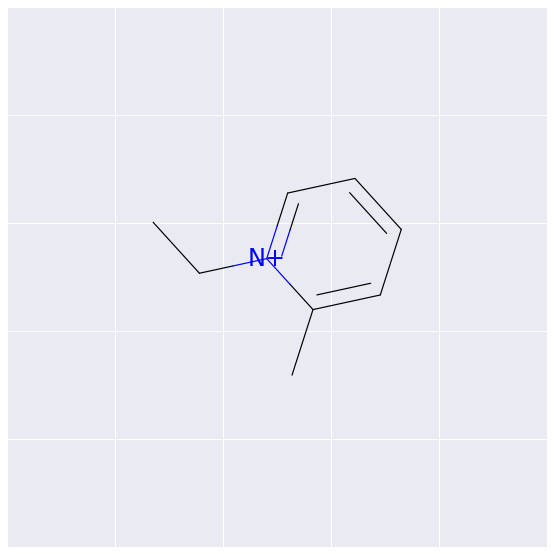

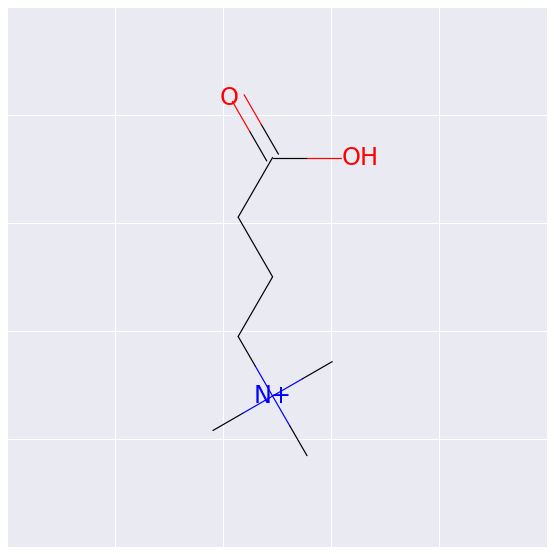

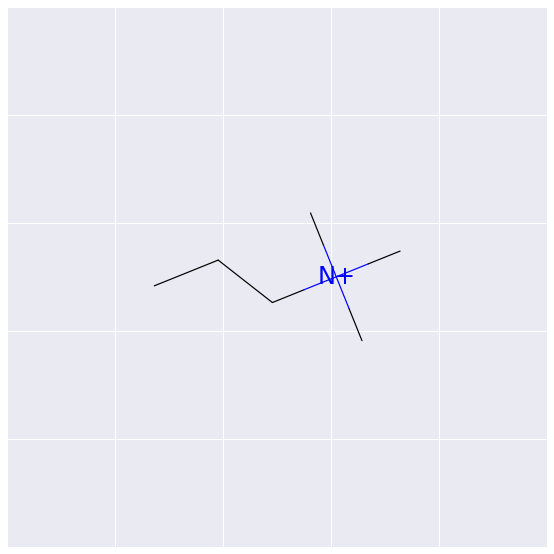

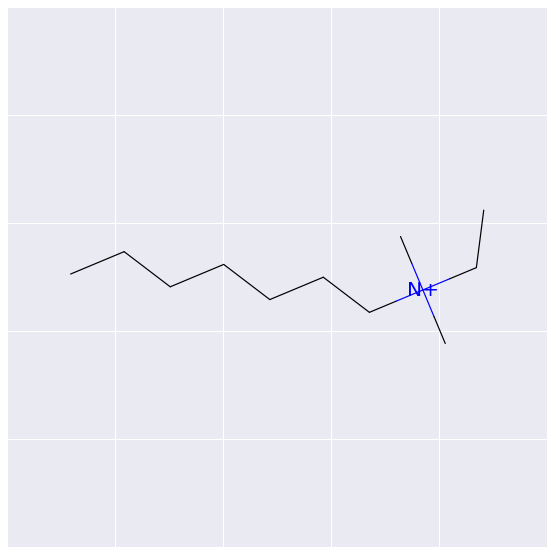

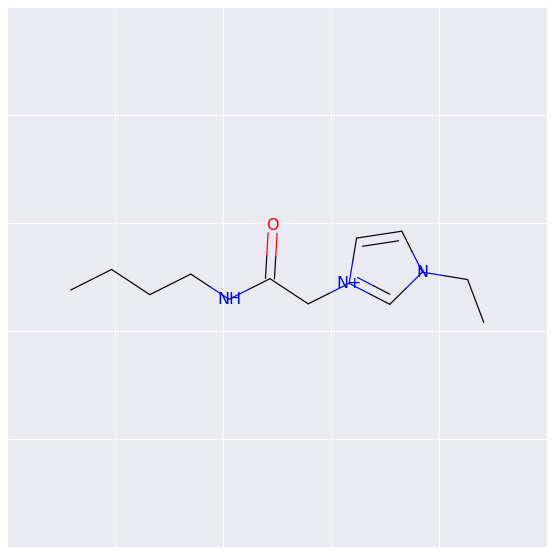

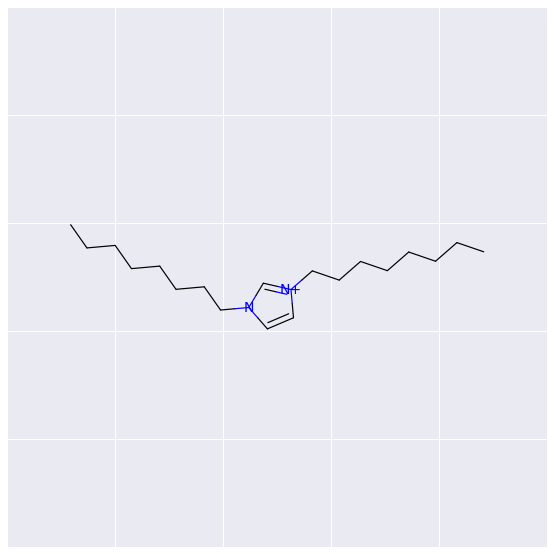

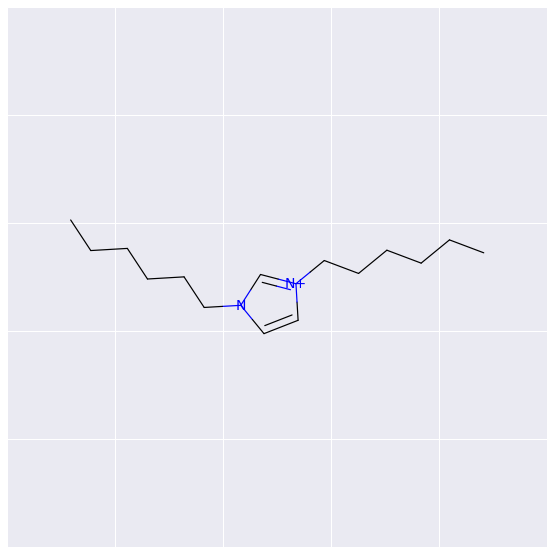

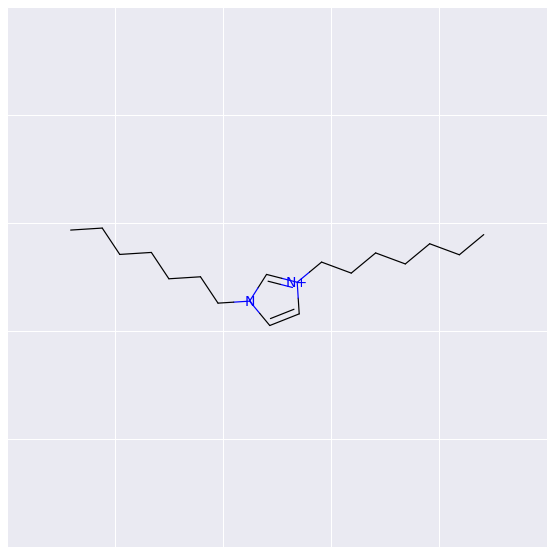

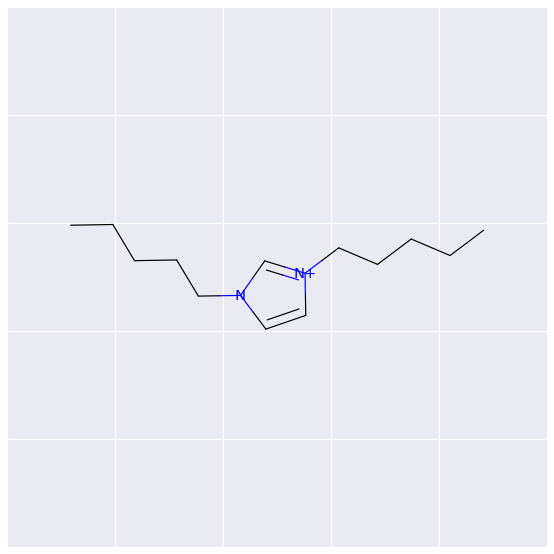

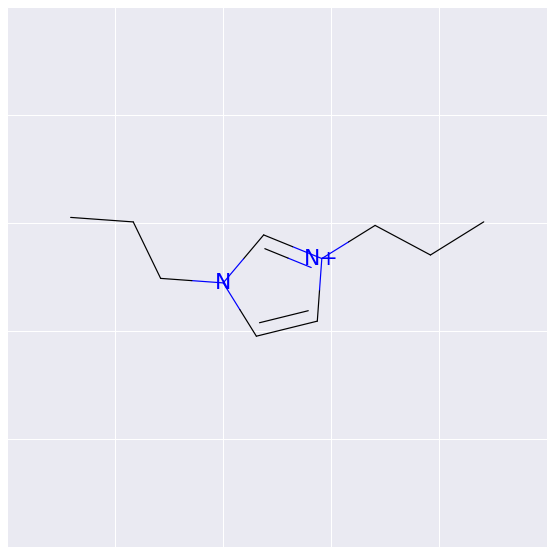

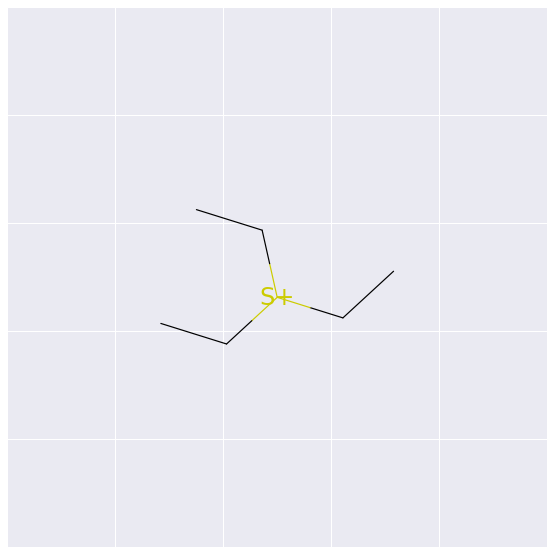

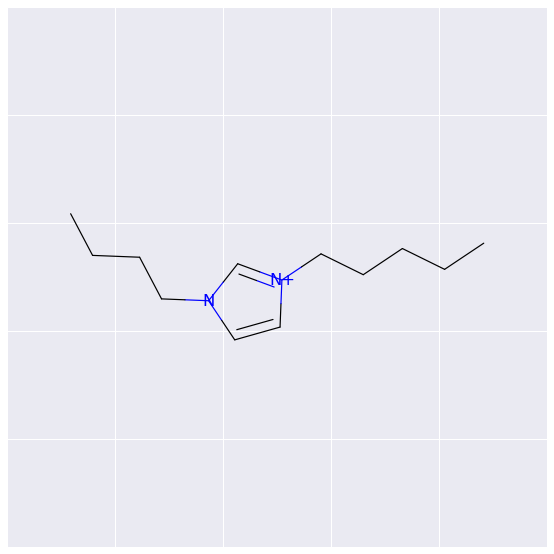

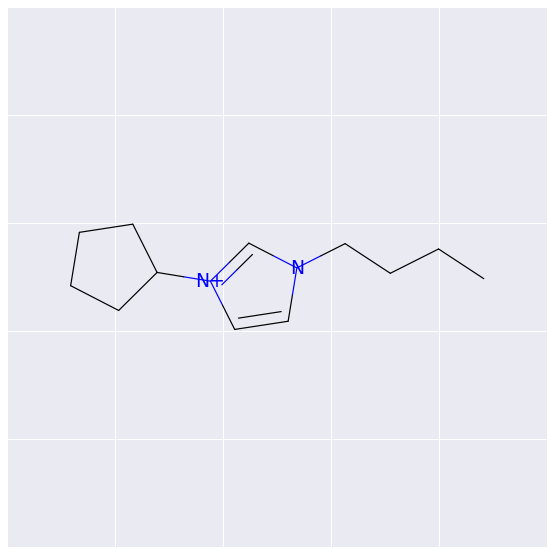

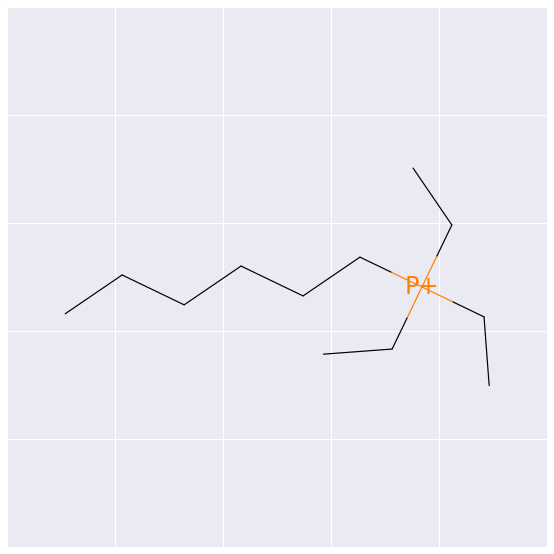

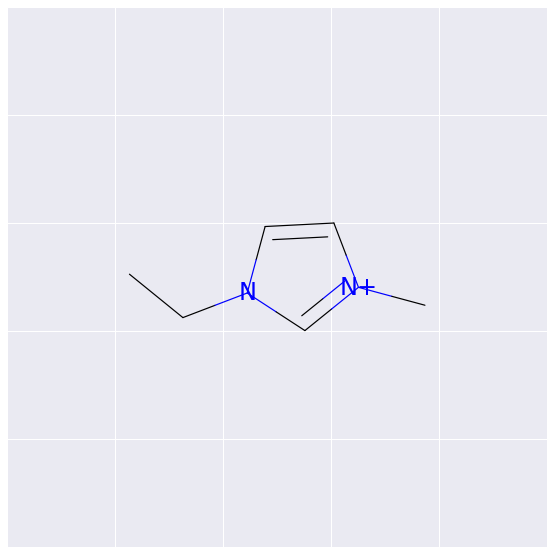

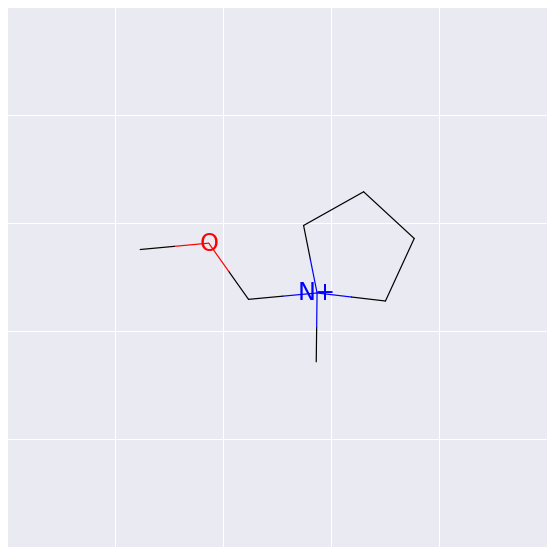

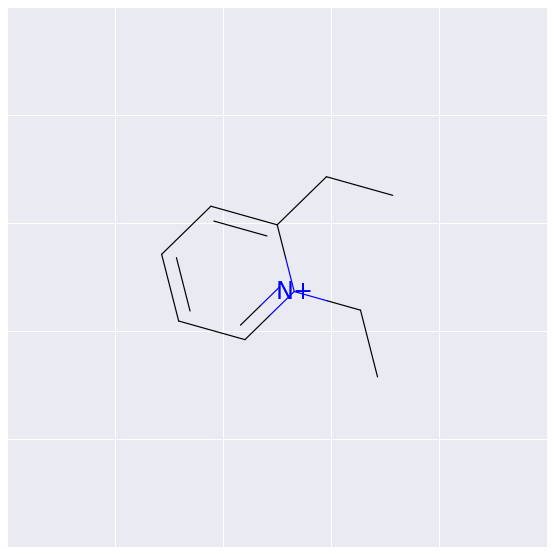

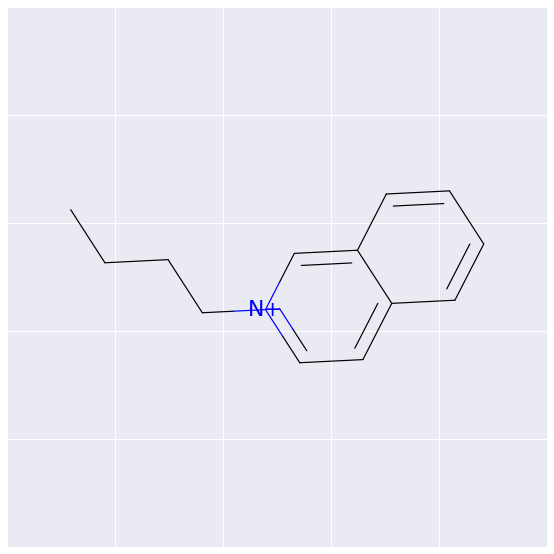

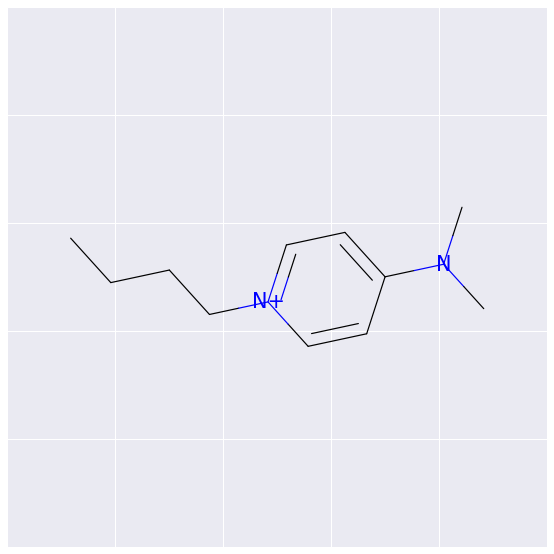

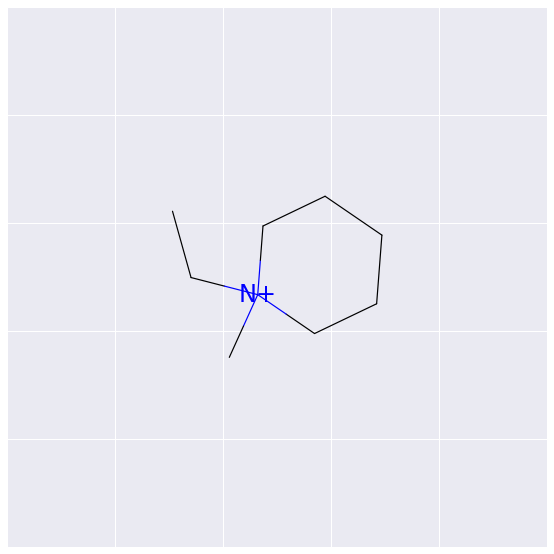

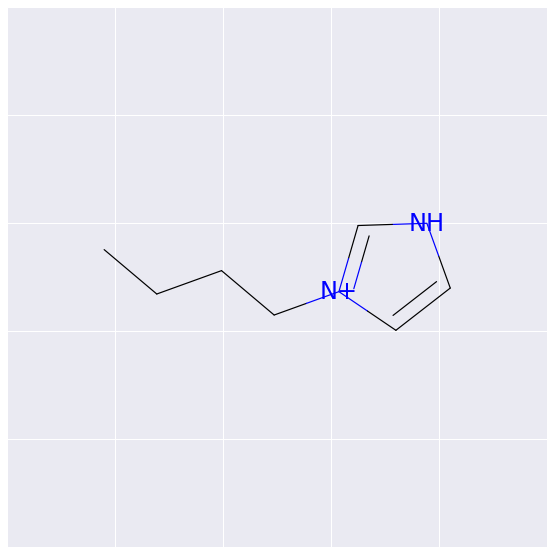

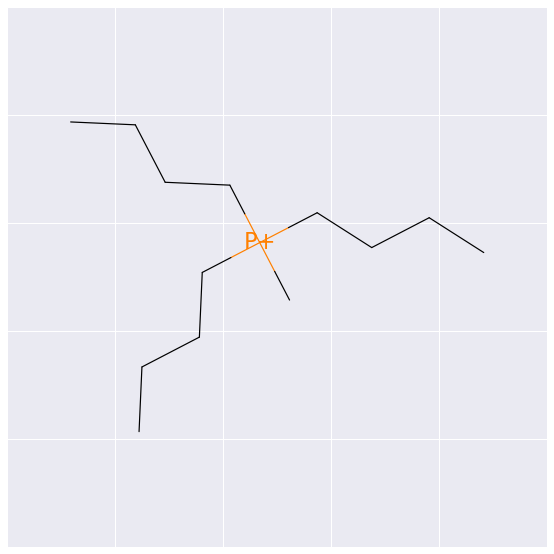

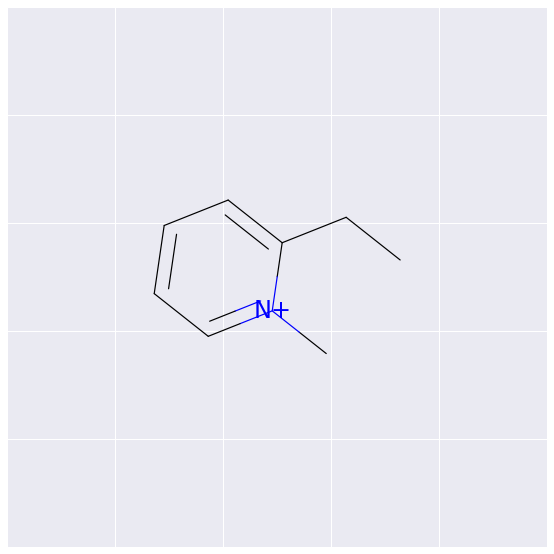

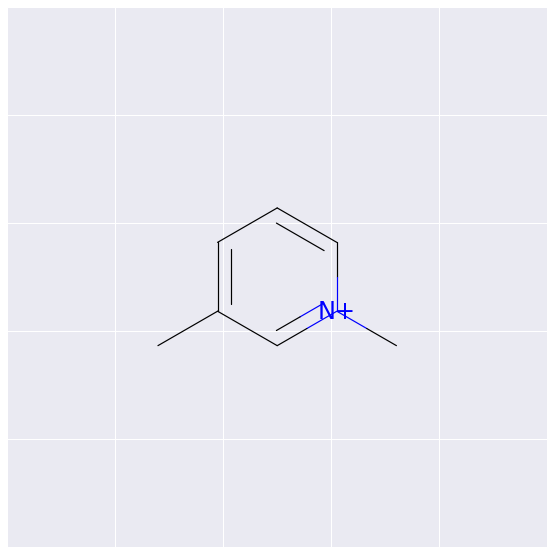

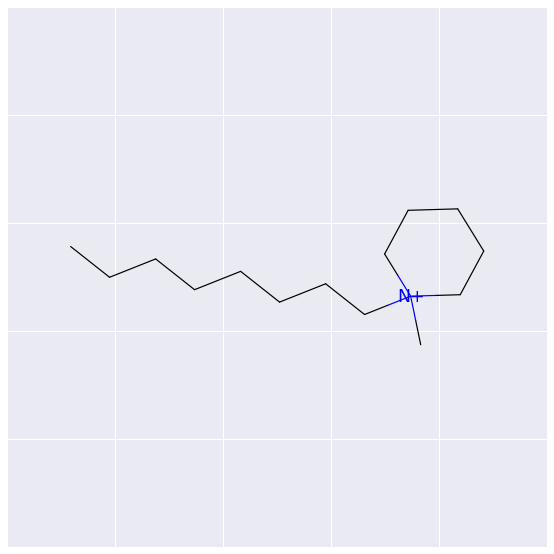

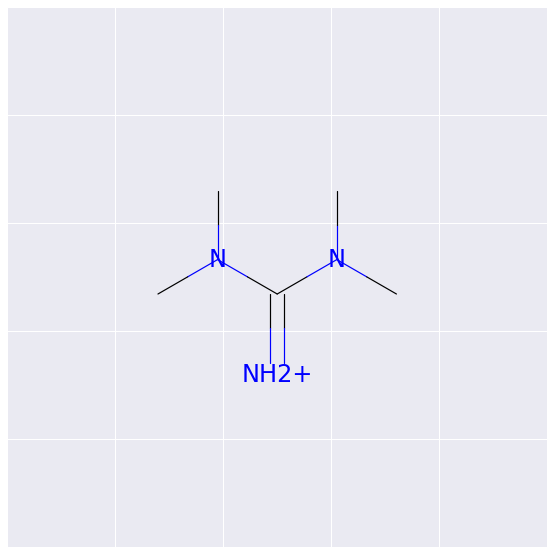

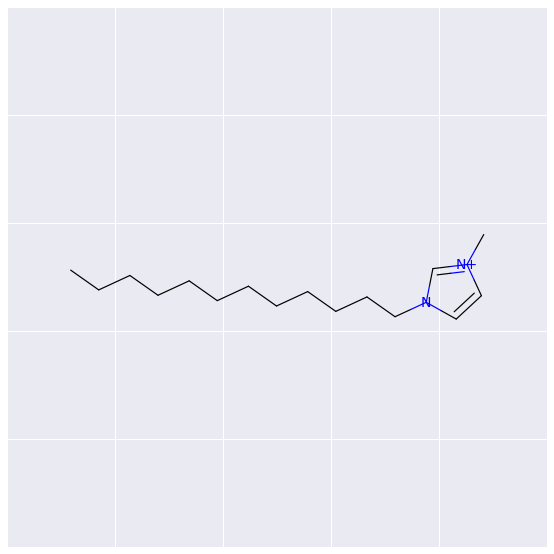

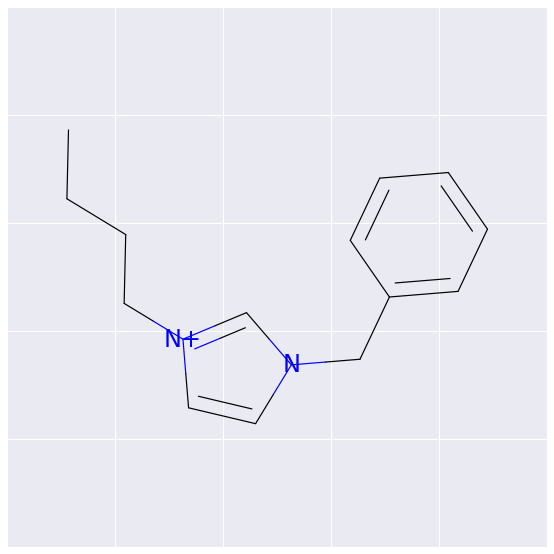

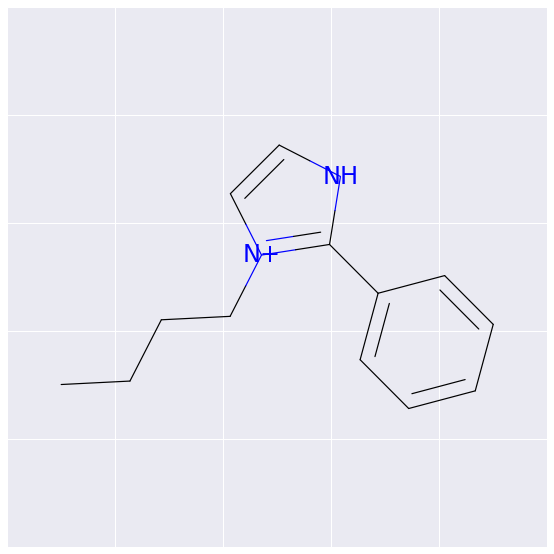

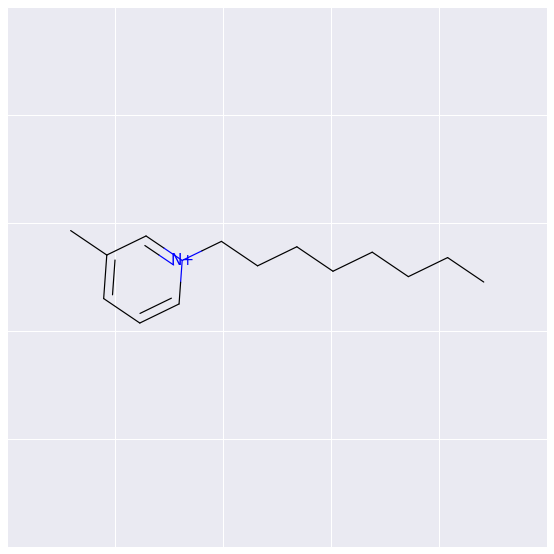

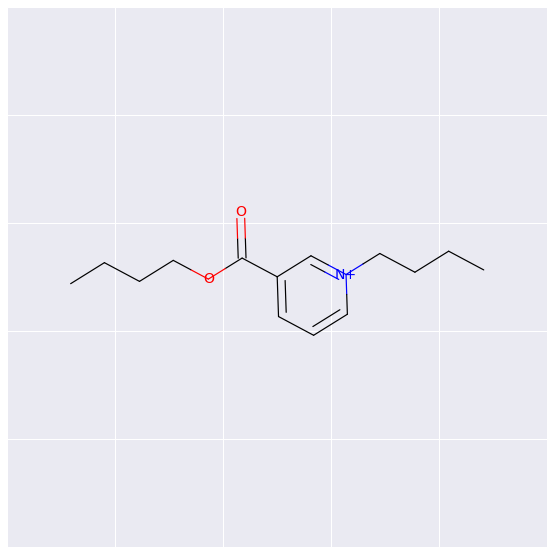

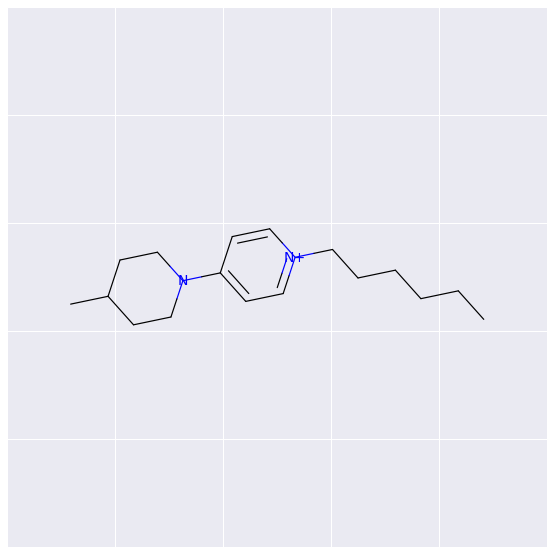

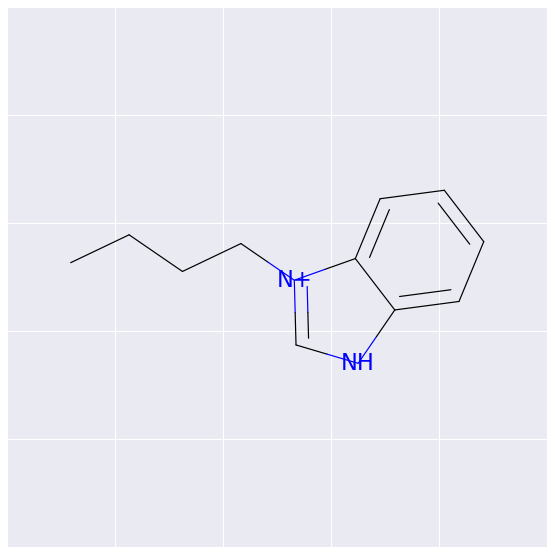

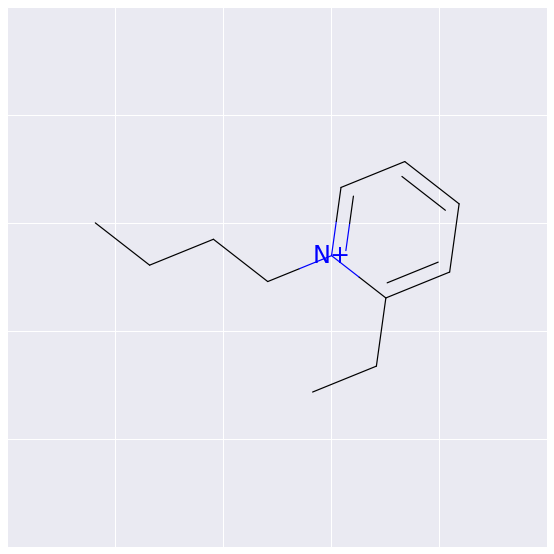

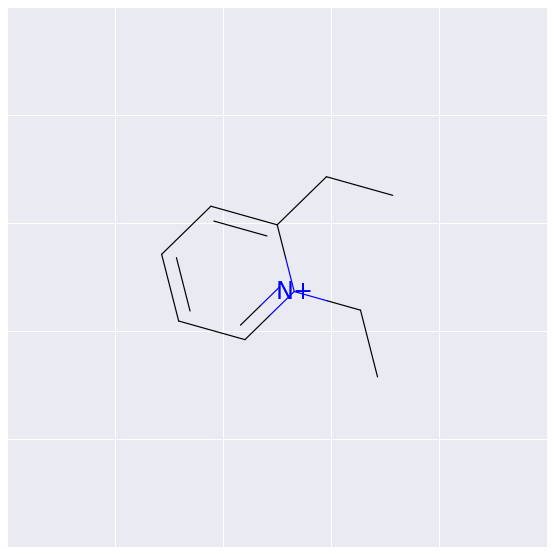

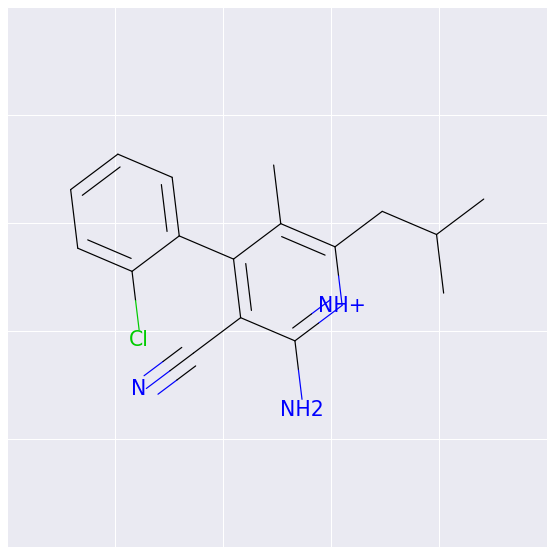

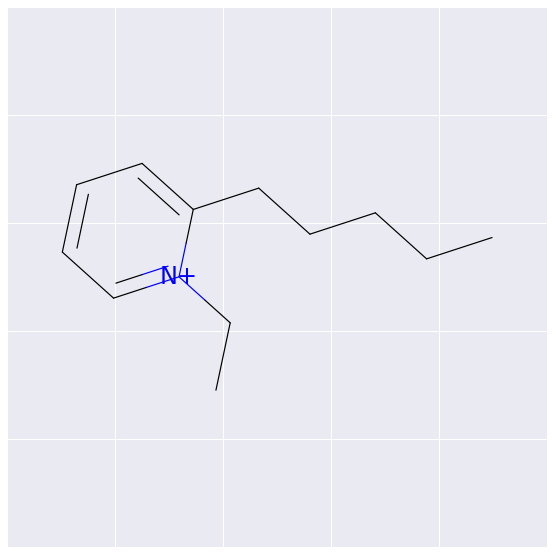

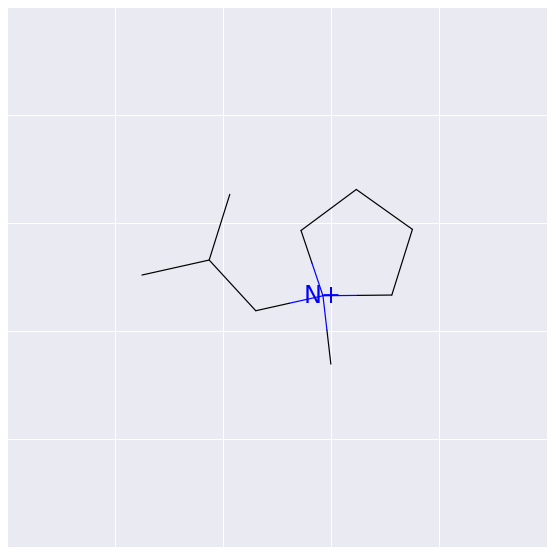

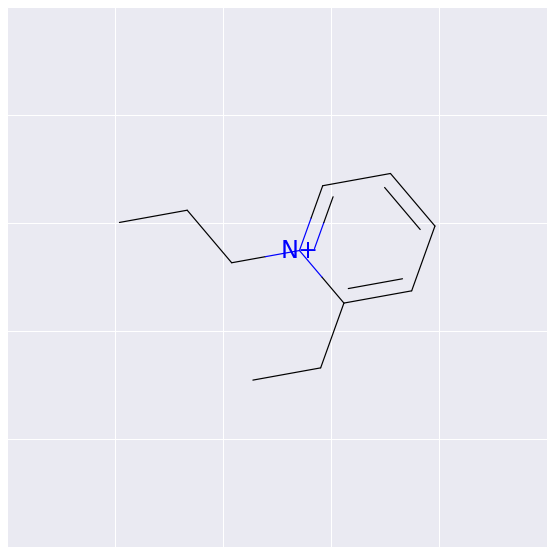

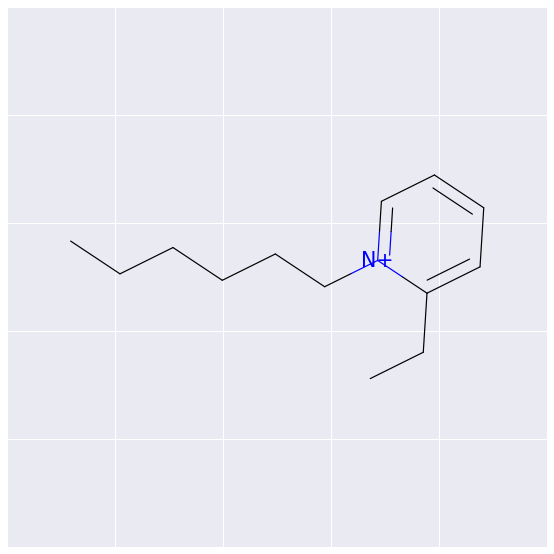

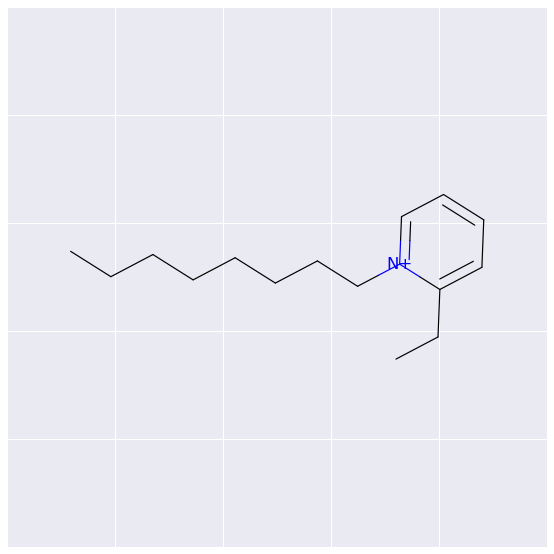

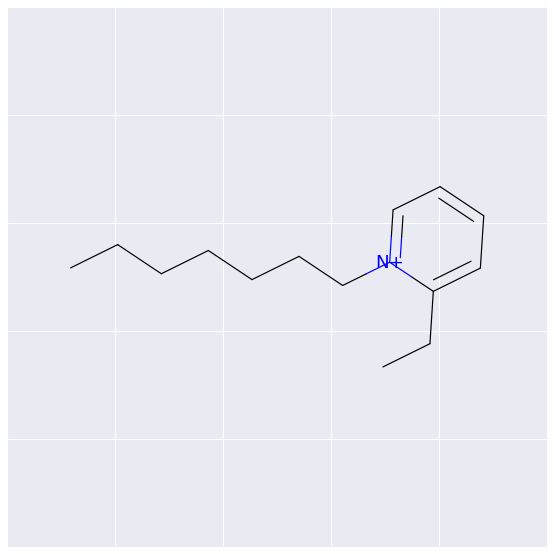

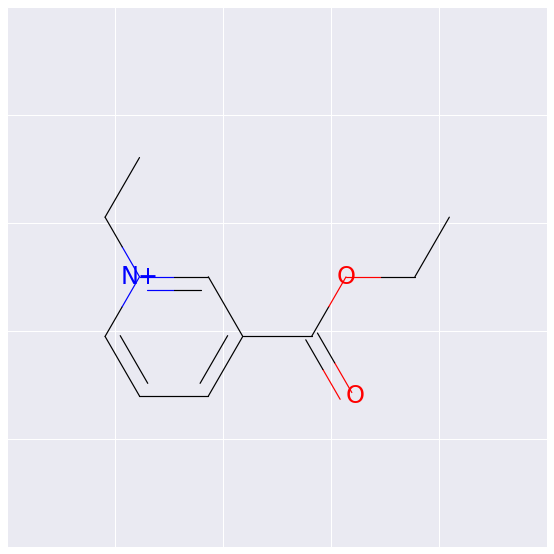

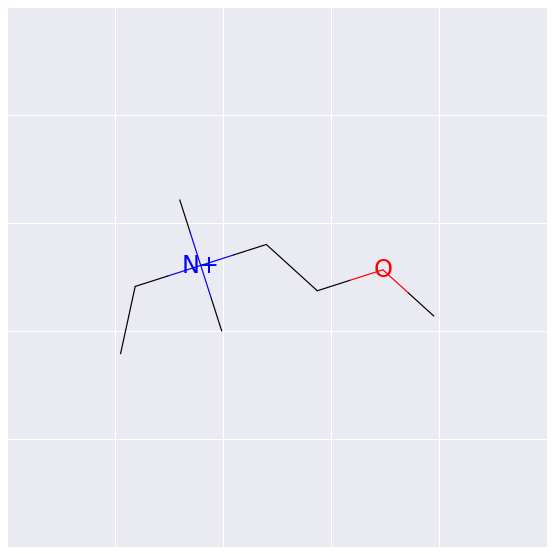

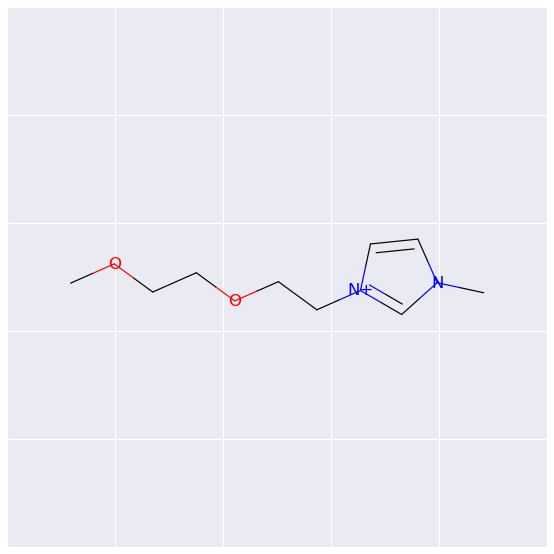

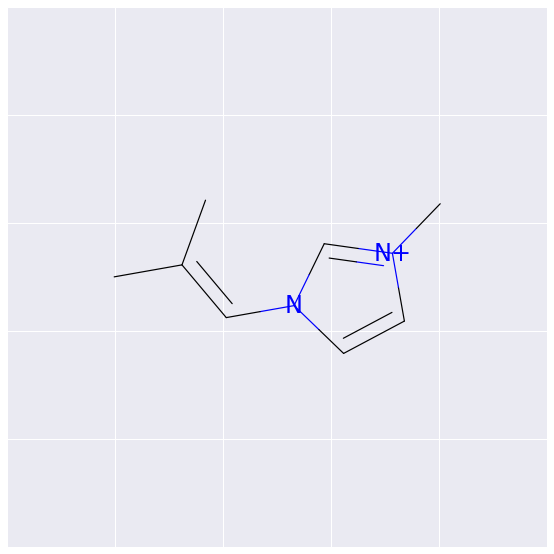

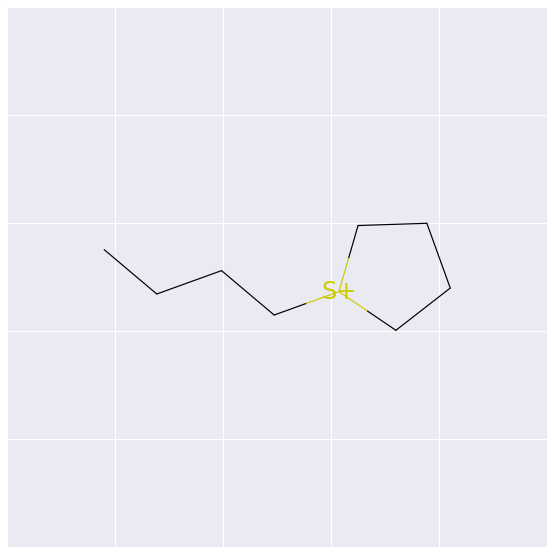

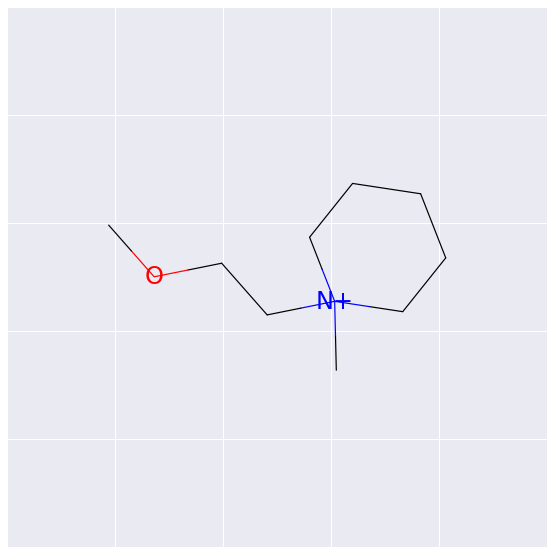

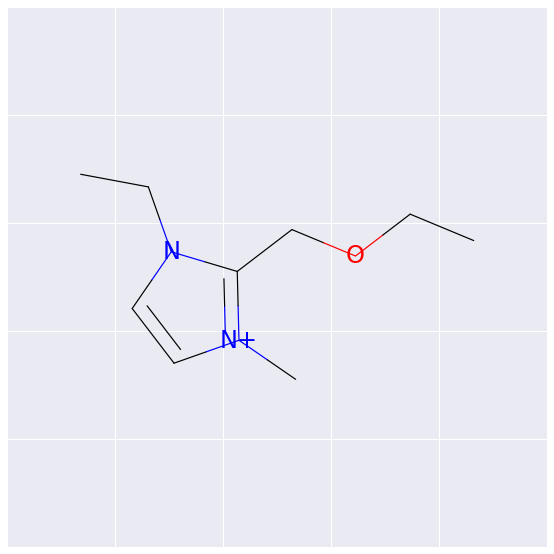

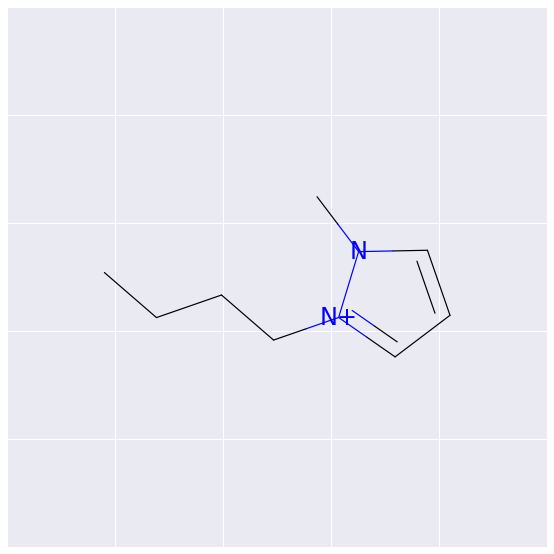

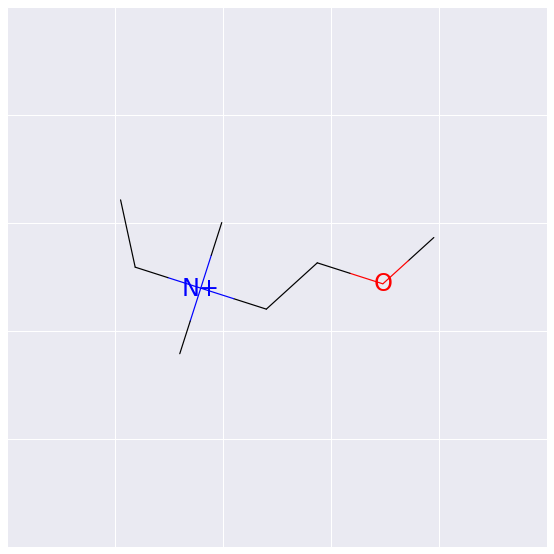

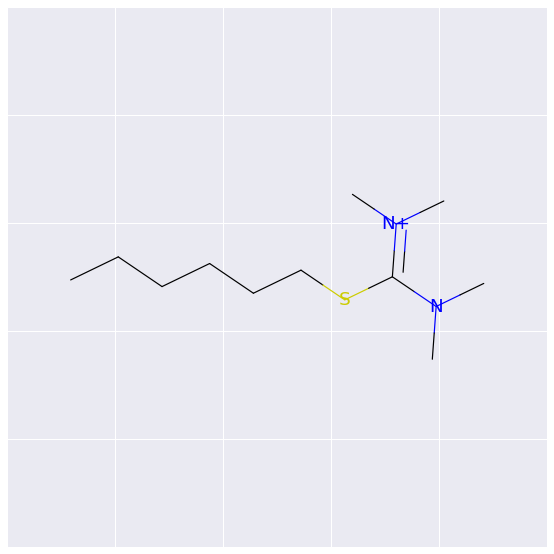

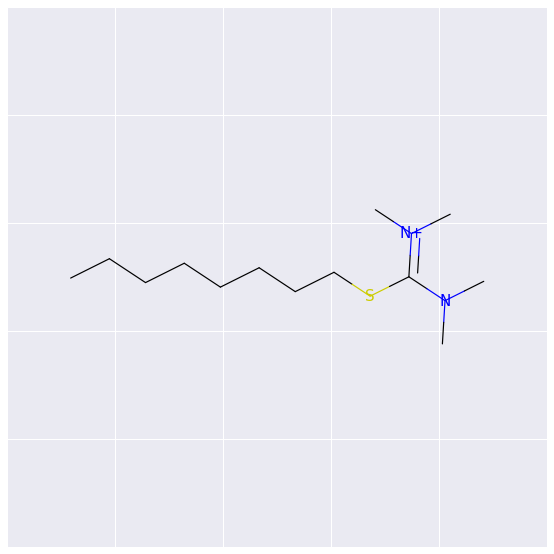

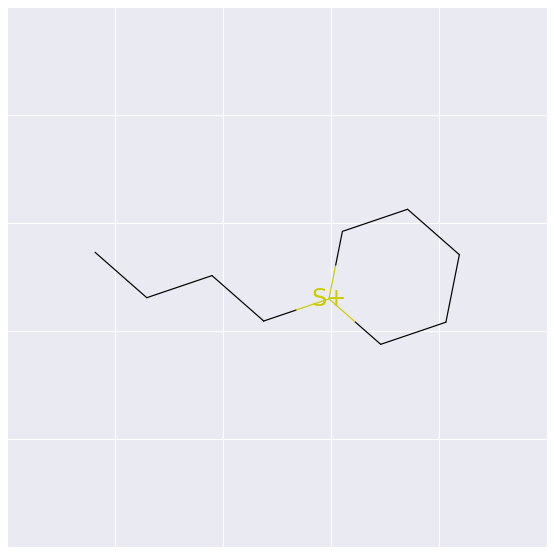

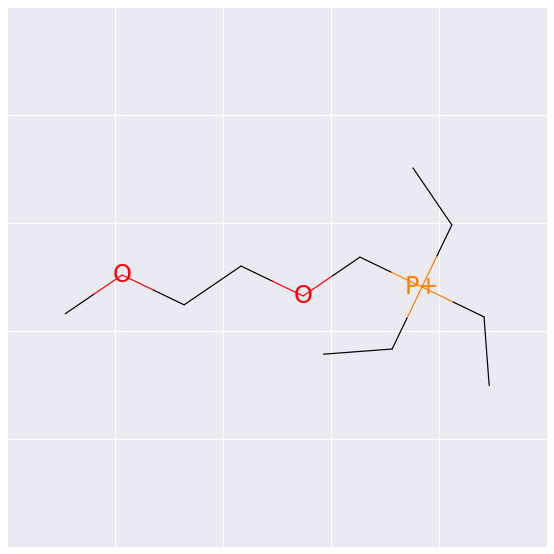

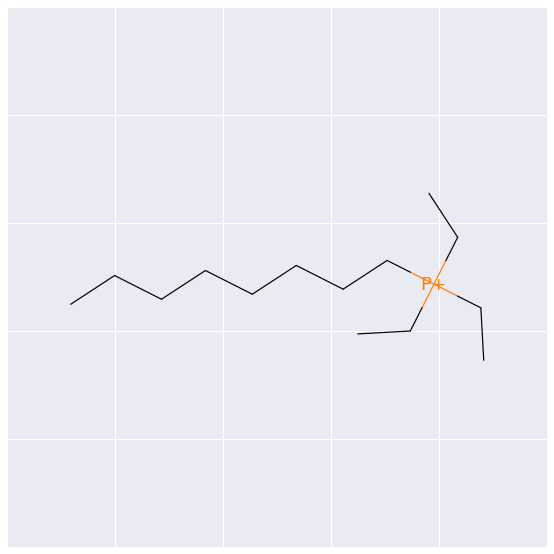

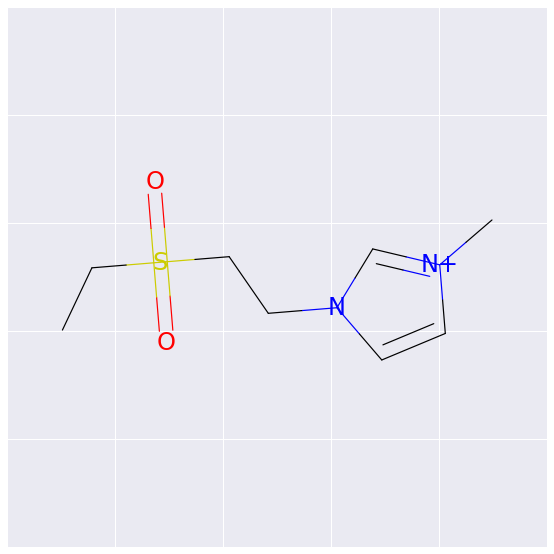

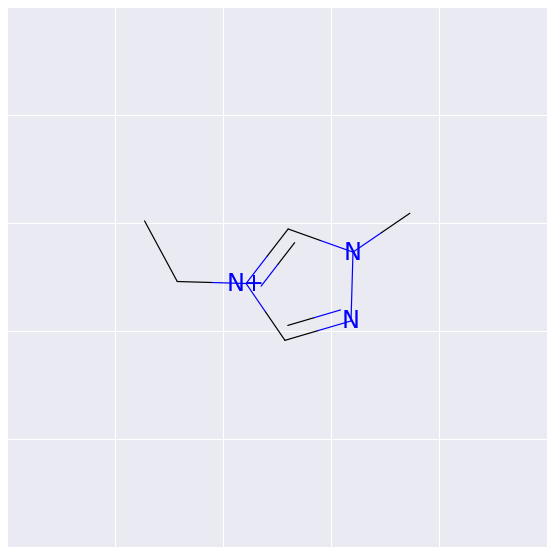

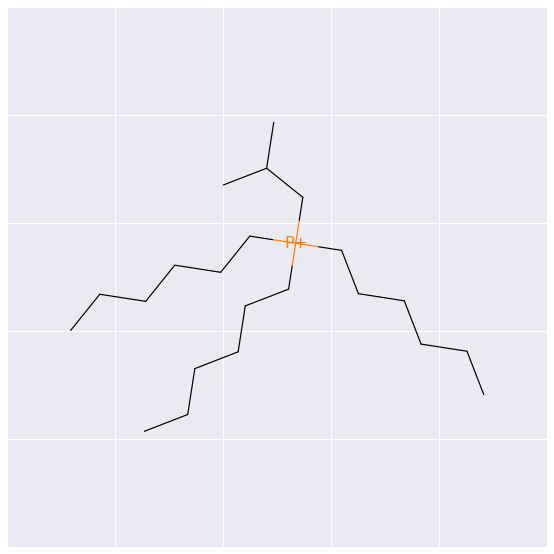

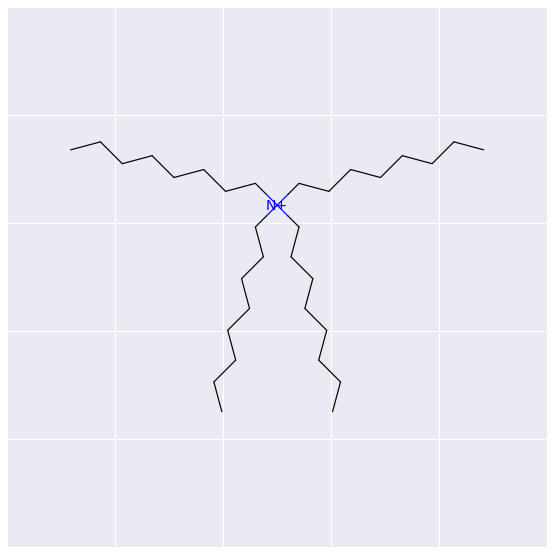

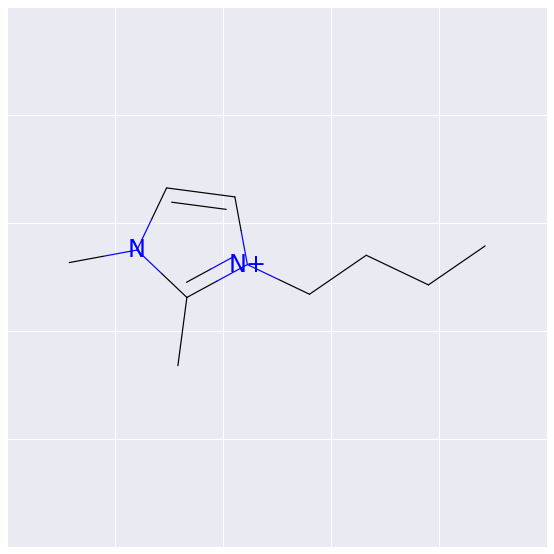

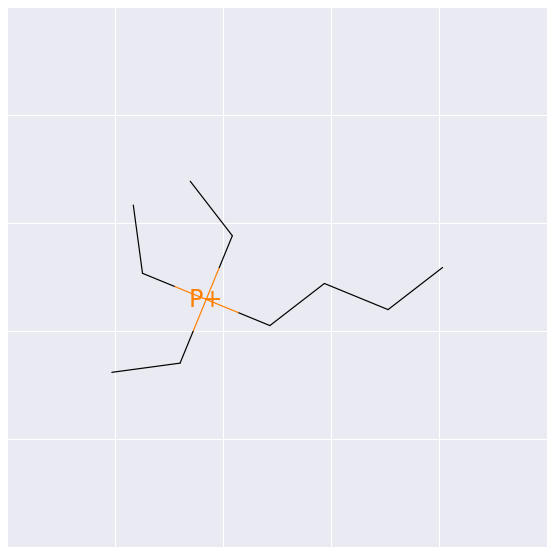

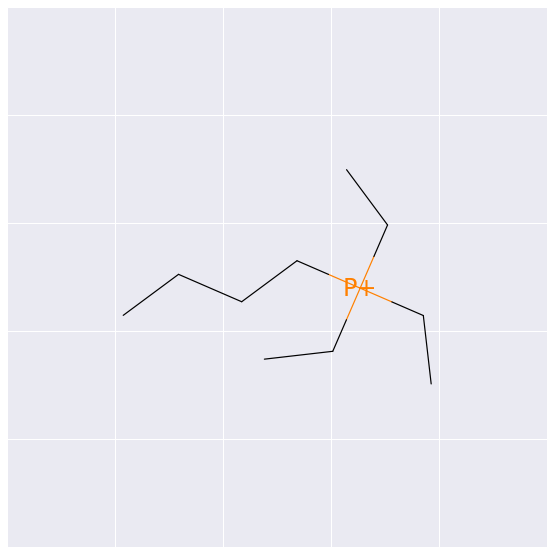

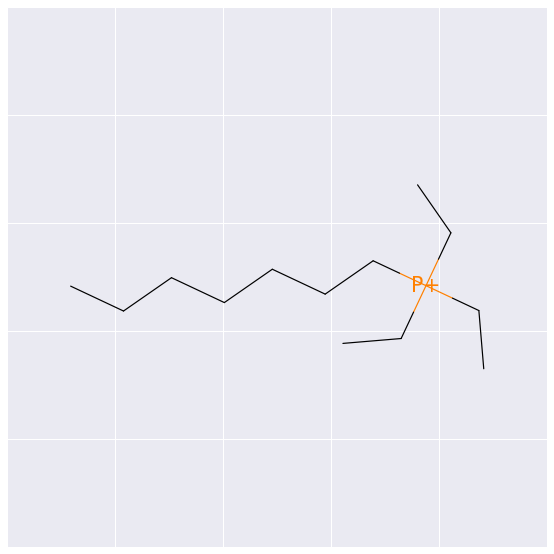

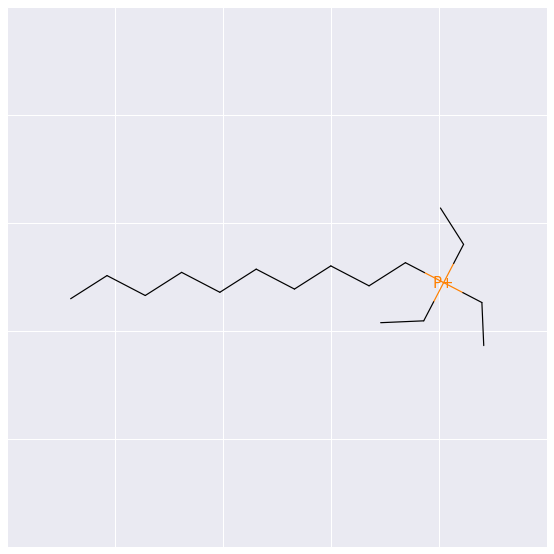

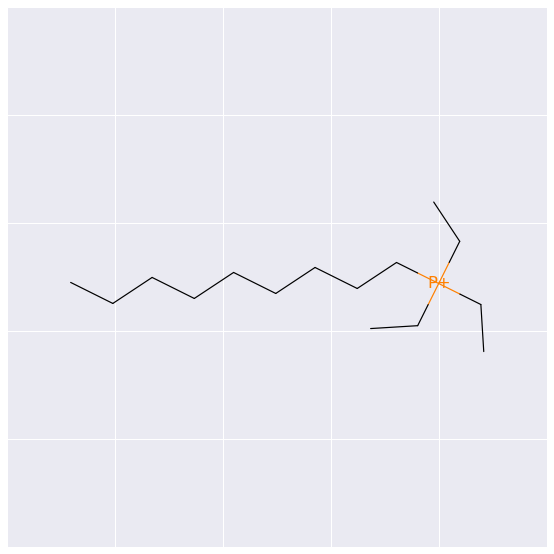

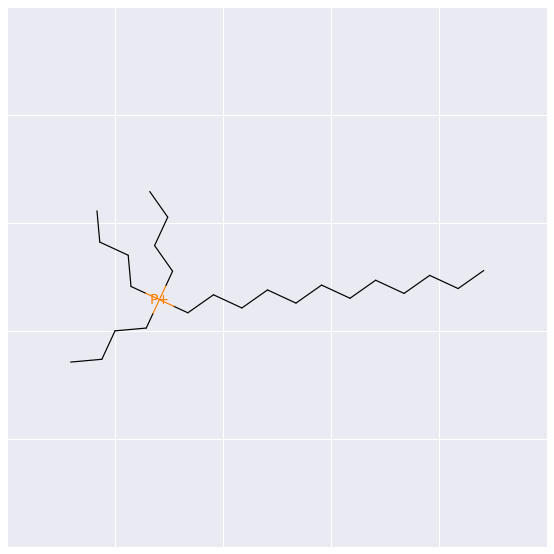

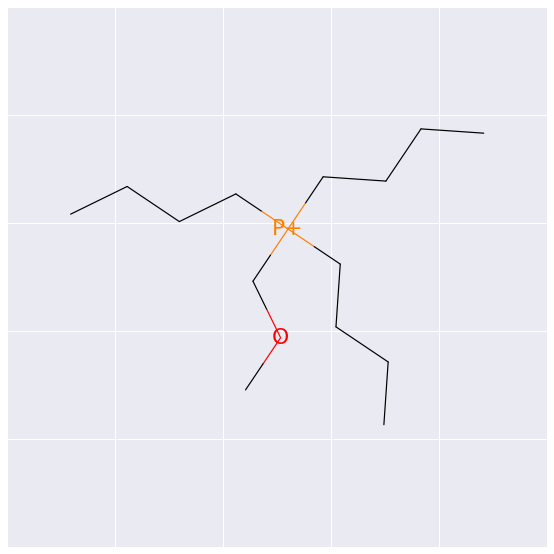

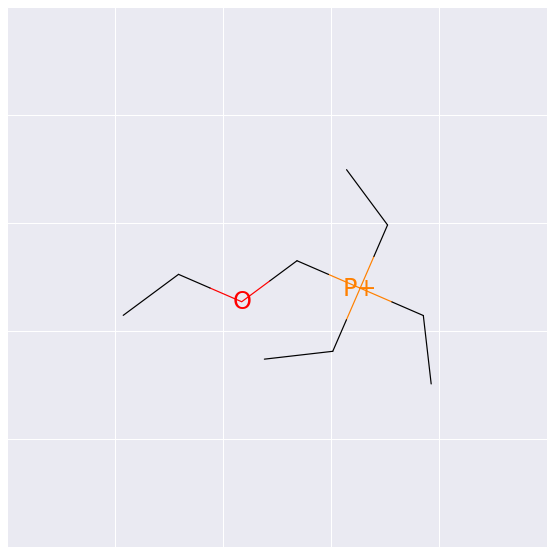

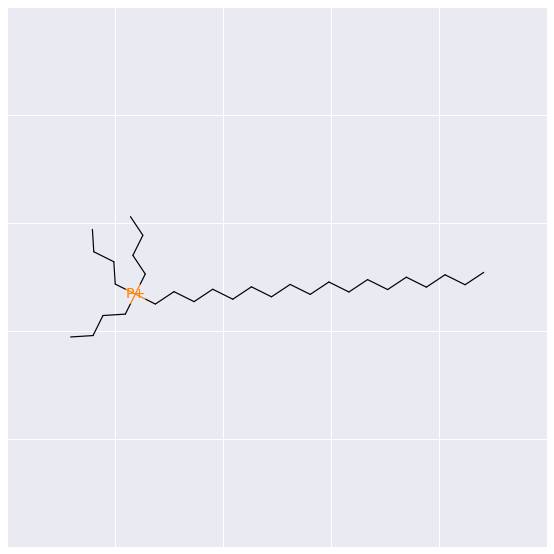

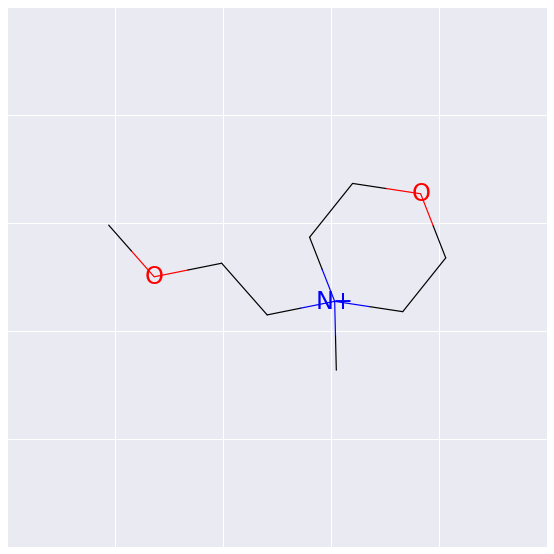

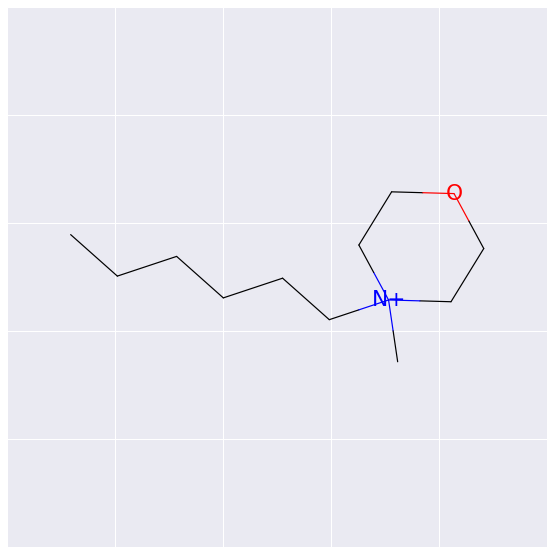

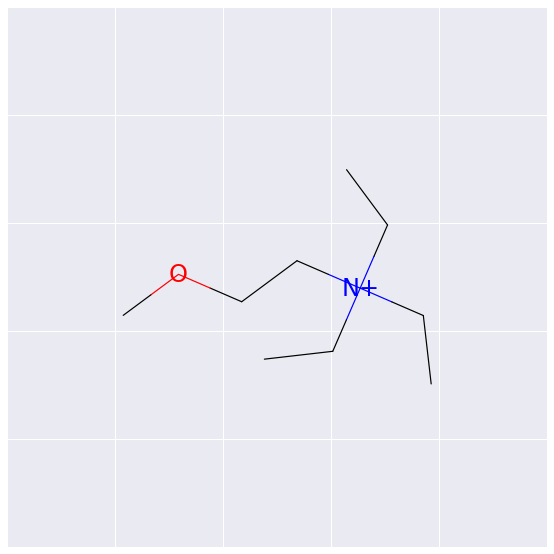

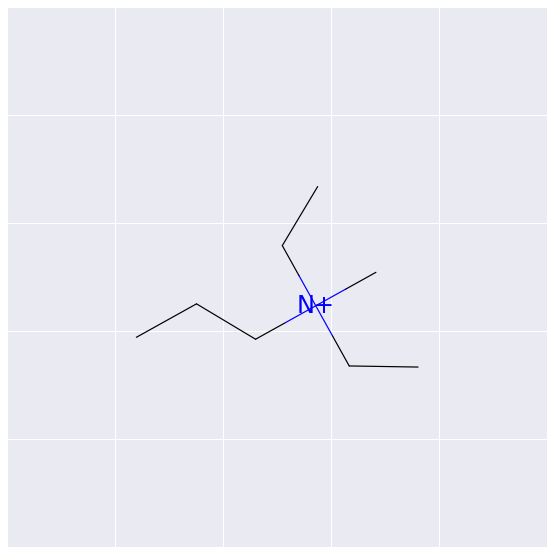

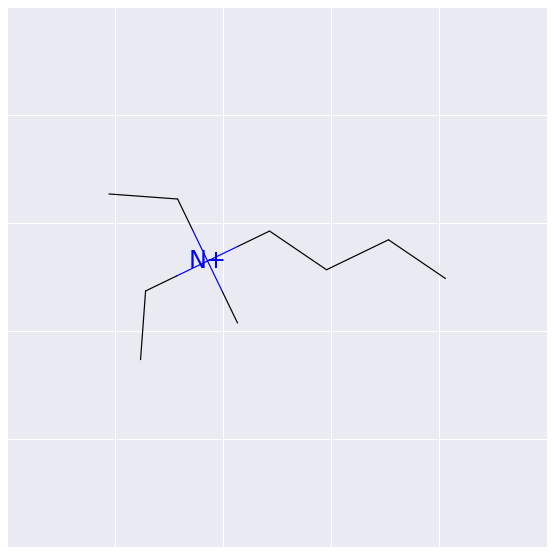

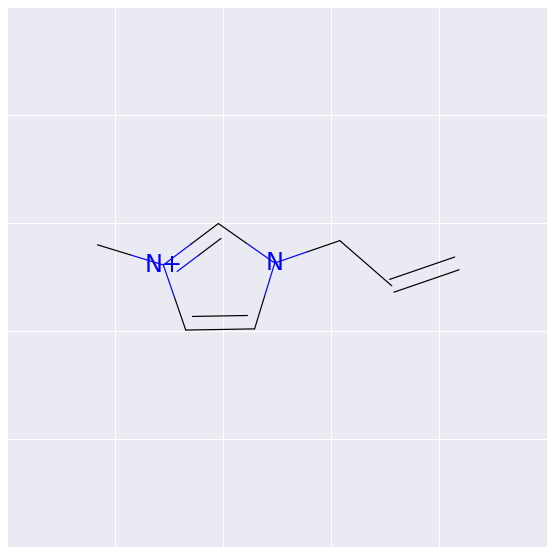

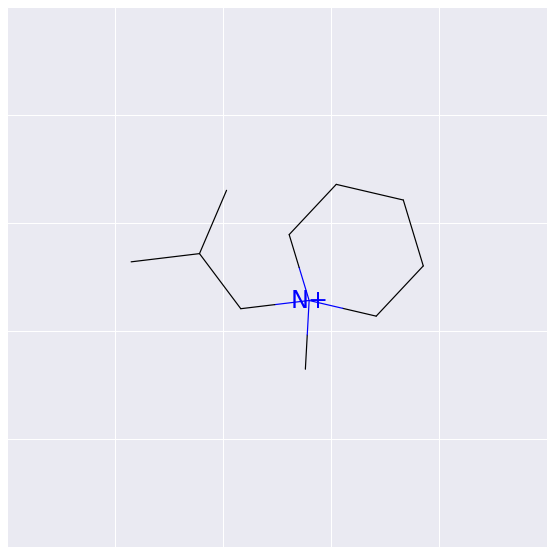

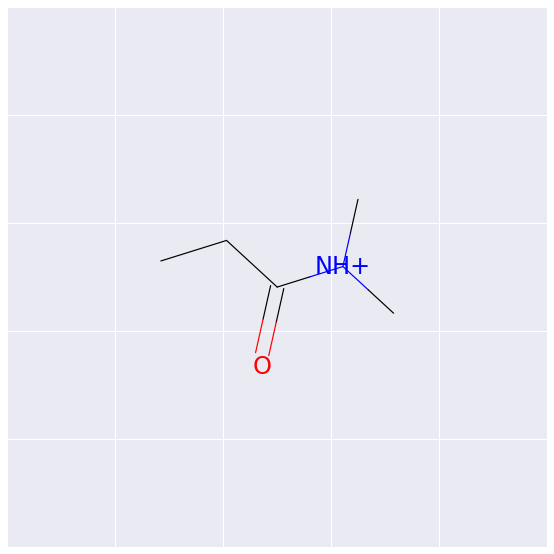

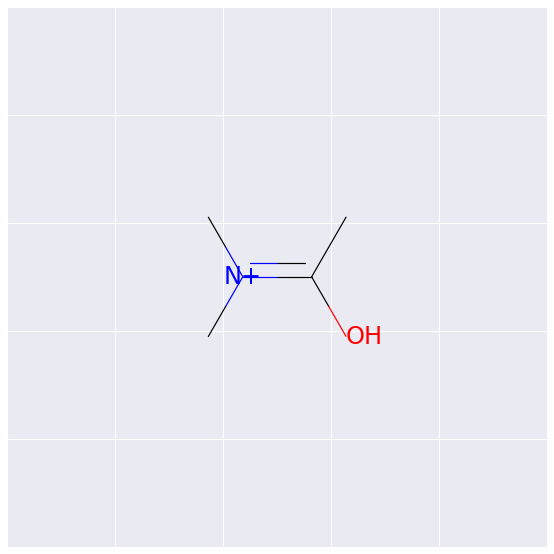

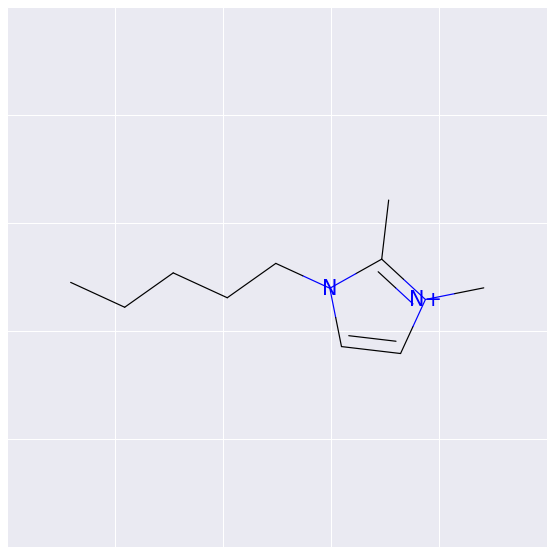

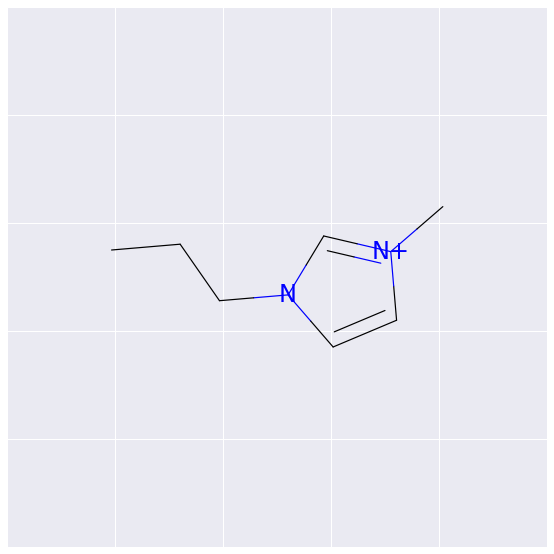

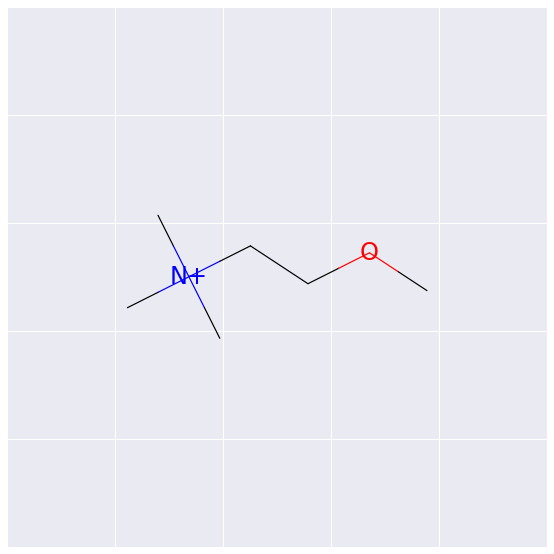

In [386]:
cation_samples = []
for smi_index, smi in enumerate(cations):
    smi = pad_smiles(smi, smile_max_length)
    Z = np.zeros((1, smile_max_length, len(char_list)), dtype=np.bool)
    for t, char in enumerate(smi):
        Z[0, t, char_to_index[char]] = 1
    string = ""
    while True:
        for i in autoencoder.predict(Z):
            for j in i:
                index = sample(j, temperature=random.random())
                string += index_to_char[index]
        try:
            Draw.MolToMPL(Chem.MolFromSmiles(string))
            cation_samples.append(string)
            break
        except:
            continue

In [387]:
print('sampled cations: {}'.format(len(cation_samples)))
print('unique samples: {}'.format(pd.DataFrame(cation_samples).drop_duplicates().shape[0]))

sampled cations: 276
unique samples: 275


In [383]:
from rdkit import Chem
from rdkit.Chem import Draw

Cn1cc[n+](c1)CCC C )+)cI#Cr#)C  )8oCC#l[s 8+ CcB)))
C1=C[N+](CCC#N)=CN1CC 8   BF#[C B#sC  -  S #1 rC\#=
Cc1cc([n+](n1c2ccccc2)C)                           
CCCCCCCC[n+]1ccc2ccccc2c1 8                        
[P+](CCCC)(CCCC)(CCCC)NCCC =rl NN]BlNrC 1roNHrN 7 I
C2=CN(C=[N+]2CCC#N)CCO       =                     
C1=C[N+](CCCCC)=CN1 C[(lB#rc= oB ]s#ncrCsBC)\sBlC7C
CCCC[n+]1ccccc1    )      s ]   I       (S        ]
CCCCCCCCSC(N(C)N)(=[N+](C)C)33 31  C37 n   n  1    
[P+](CC)(CC)(CC)CCOC#C\I (I CCB 38= l\nN[IS#C#OC[ =
CC[N+](C)(CC)CC  1HcF#2  n8 c 2) sNrs\[H1CF]2rN7)r 


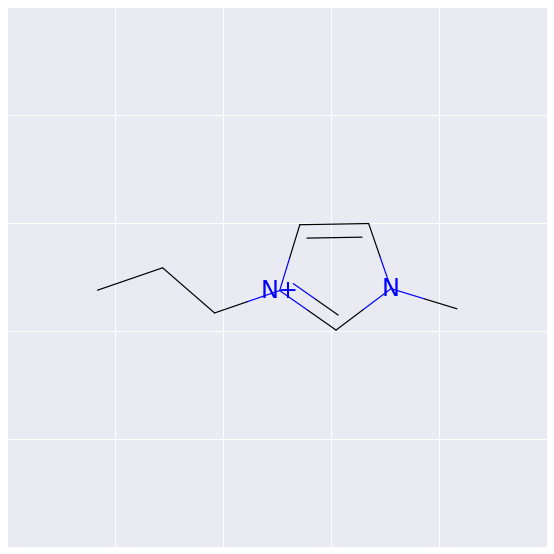

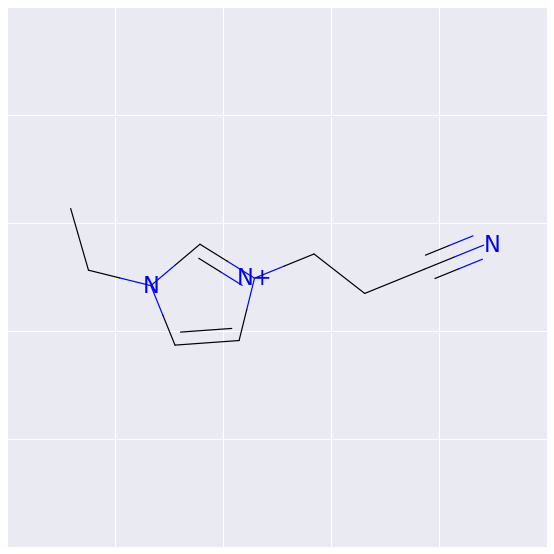

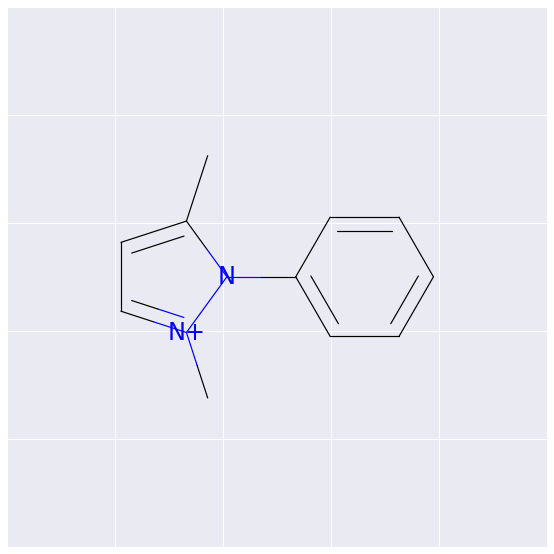

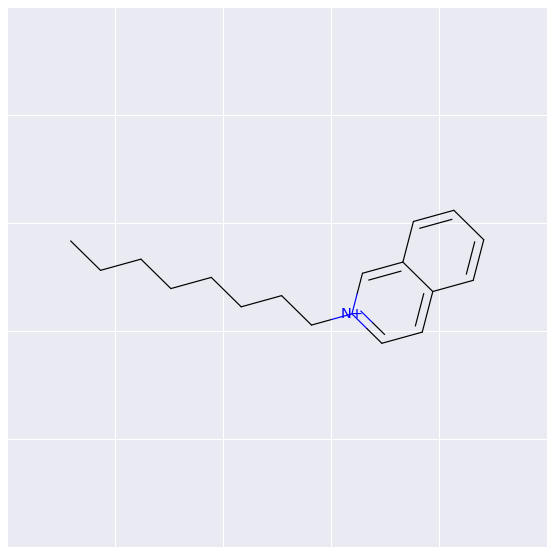

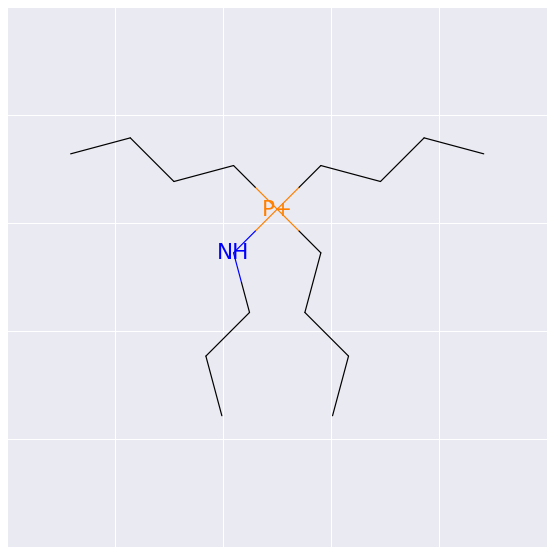

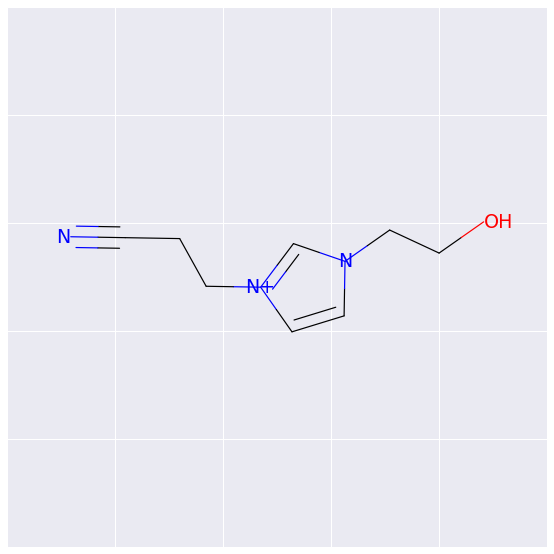

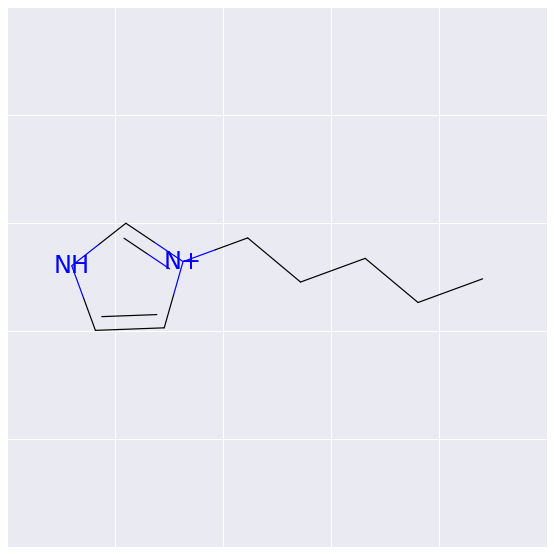

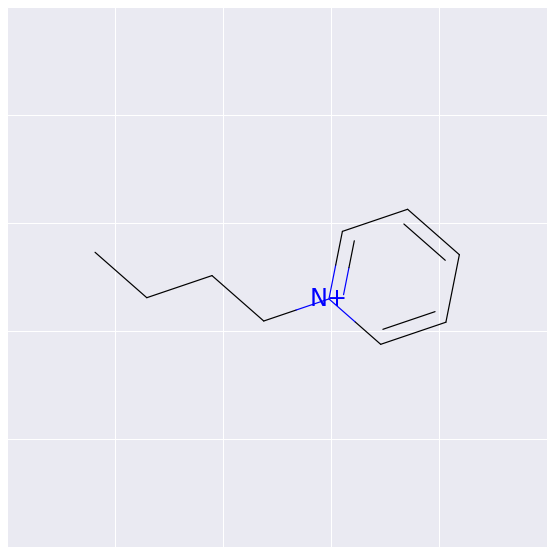

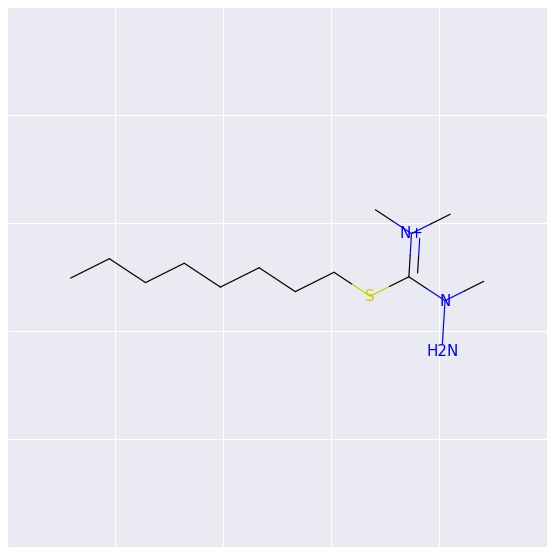

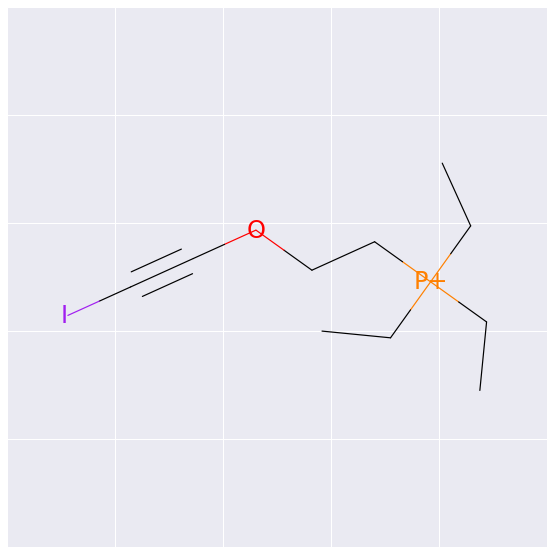

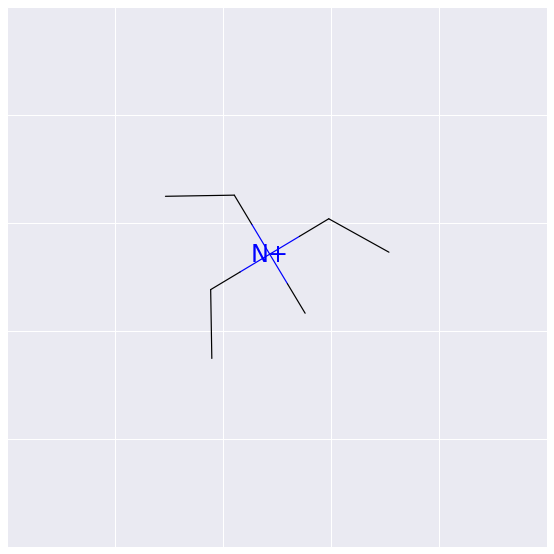

In [391]:
% matplotlib inline
for smi in cation_samples:
    
    try:
        Draw.MolToMPL(Chem.MolFromSmiles(smi))
        print(smi)
    except:
        pass

In [87]:
cation_samples

['CCNCC(CCCO=N)=CCNCC11)[N+]([O-])=O                 ',
 'CC1CCCCCCC=CCNC=2C1N1)N++]([O-])=O                 ',
 'CCC(CCCC=CC1CCNCCC1111[N+]([O-])=OO                ',
 'CCCCCCCCCNC=CNCN=C=C)[N+]([OO])=OO                 ',
 'CCCCCN=CCCCCC=NNC(1C)[N+][[O-])=O                  ',
 'CCNCCNN=CCNCCCCCC=)[N+]([O--)=OO=C                 ',
 'CCCC1CCCSC(CCCC1=N1[NN]([O-])=O))#O                ',
 'CC(CCC=CCNCN==CCCCCC11)N+]([O-)))=O                ',
 'CCCCC1NN)CCCC(CNC=CC)[++]([O-])=O                  ',
 'CCCCCCCCCCNCCCC(CCNO[NN+([O--)==O                  ',
 'CC1CC=CCN=CC=CCNCNCCC)N++([[O]]==O                 ',
 'CCC==NCCCNCCNCCC(CCC1[[++([O--])=O                 ',
 'CCCCCCNC(CCC=C=CC=CC)[N+]([O-])=OO                 ',
 'CCCCCCCC=CCCC=N=CCC1)[N+](OO-])=O                  ',
 'CCNCCCCCN)C=C)CCC(===1)[N+]([O-])=O                ',
 'CCCCCCCCNNCCCC=C(NCC11)[N+]([O-])=O                ',
 'CCNCCC=)(CNCC1CCCC12NN++([O--))=O                  ',
 'CCCCCCNNCCCNC1CONNN=1[N+]([O-])=OO            